# Cleaning Data

At this stage, it is important to clean the 100x100data. 

Several issues were highlighted throughout the process.

### # of Finishers
As part of the analysis, DUV and ITRA finishers time were downloaded to verify runner's status and, if lucky, finishing time. 

When comparing the scraped 100x100 data to DUV and ITRA, it came to light that sometimes, runners are marked as finished on 100x100trail, although they did not get a finishers status on ITRA or DUV. THis required cleaning. 

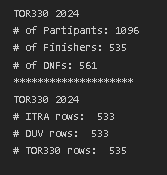

Furthermore, sometimes runners were given a status of not finished. THis was easily fixed by checking their timestamp at finish line (Courmayer). However, in that case, it was made sure that there was a timestamp for them between road Stages

### Life bases / Refugees

Several cleaning methods were deployed to clean this column. There were 'RITIRIO' in some values, so this needed to be stripped and kept in a different column 

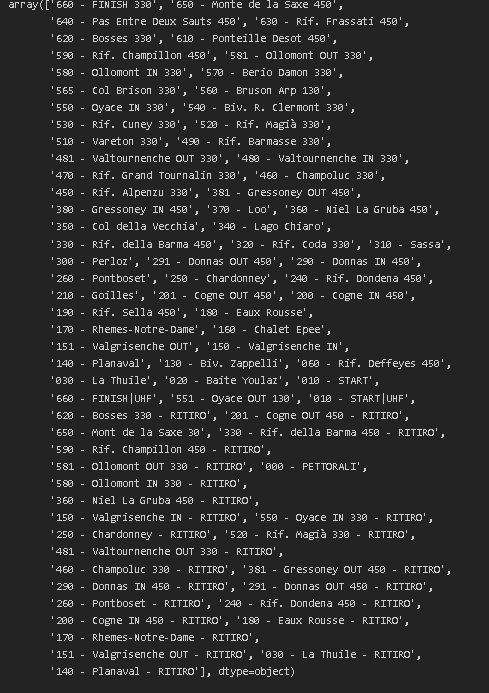


### 'Time' column
'Time' Column is one the most important columns in this process and needs to be meticulously cleaned for errors and inconsitencies!

The timesstamps had '+02:00' which was not necessary once inspected. 
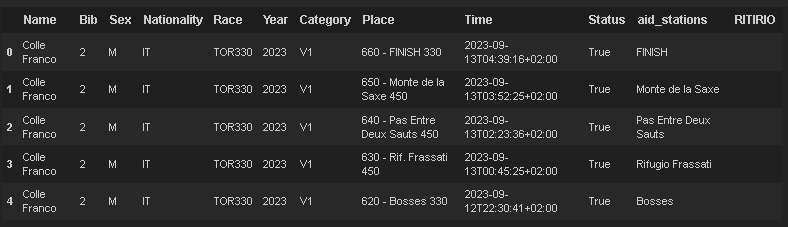


### Starting Time
Starting Times were also inaccurate. The starting time was set random times (who knows why?) but the times were changed to reflect wave start times!
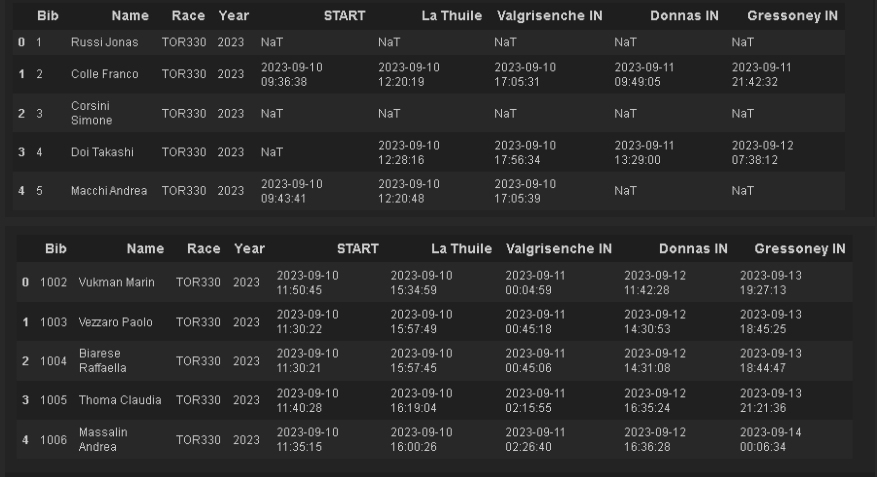

To deal with the Start Time, issue, DUV data was used to detect the start date for each year

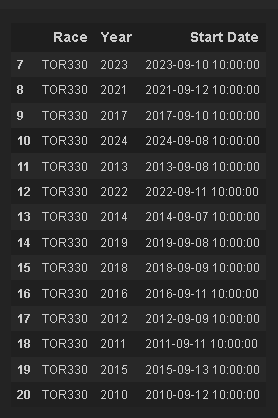

In [1]:
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### FIX BARMASSE
### FIX BARMA

In [3]:
# # Set pandas options to display all columns and rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

## Looping through scraped data from 100X100trail

In [4]:
races = ['TOR330'
#         ,'TOR450'
        ]
years = [ 
#     '2021',
#         '2022',
#          '2023', 
    '2024'
        ]

TORX_df = {}

for race in races:
    for year in years:
        df = pd.read_excel(f'{race} Data/1. 100x100trail/{race}_{year}.xlsx',
                                 dtype={'Start Date': 'string',
                                        'Year': 'string'})
        print(f'{race}_{year} {df.shape}')
        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        TORX_df[f'{race}_{year}'] = df
    print('*'*50),

TOR330_2024 (39181, 10)
**************************************************


In [5]:
TORX_df_concat = pd.concat(TORX_df)

In [6]:
TOR330 = TORX_df_concat[TORX_df_concat['Year'] == year]
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2024 0  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            1  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            2  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            3  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            4  D Haene Francois   10   M          FR  TOR330  2024      SEN   

                                        Place                       Time  \
TOR330_2024 0                660 - FINISH 330  2024-09-11T07:08:32+02:00   
            1      650 - Monte de la Saxe 450  2024-09-11T06:25:42+02:00   
            2  640 - Pas Entre Deux Sauts 450  2024-09-11T05:01:52+02:00   
            3         630 - Rif. Frassati 450  2024-09-11T03:24:39+02:00   
            4                620 - Bosses 330  2024-09-11T00:52:13+02:00   

               Status  
TOR330_2024 0    True  
            1    True  
            2    True  
            3    True  
            4    True

In [7]:
def counting_finish_DNF_dataset(df):
    for year in years :
        for race in races:

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()))
                
                
                
                # Finishers
                print('# of Finishers:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  True)].unique()))
                # DNFs
                print('# of DNFs:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  False)].unique()))
                print('*'*20)
            else:
                pass
            
counting_finish_DNF_dataset(TOR330)

TOR330 2024
# of Partipants: 1096
# of Finishers: 535
# of DNFs: 561
********************


In [8]:
def counting_groupby_dataset(df, column):
    for year in years :
        for race in races:
            
            df = df[['Name', 'Status', 'Year', 'Race']].drop_duplicates()

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()), '\n')
                
                print(df.groupby([column])[column].count())
                print('*'*20)
            else:
                pass
counting_groupby_dataset(df,  'Status')

TOR330 2024
# of Partipants: 1096 

Status
False    561
True     535
Name: Status, dtype: int64
********************


### DUV and ITRA data


#### # of Finishers
As part of the analysis, DUV and ITRA finishers time were downloaded to verify runner's status and, if lucky, finishing time. 

When comparing the scraped 100x100 data to DUV and ITRA, it came to light that sometimes, runners are marked as finished on 100x100trail, although they did not get a finishers status on ITRA or DUV. THis required cleaning. 

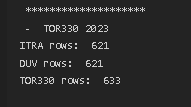


In [9]:
TORX_duv_df = pd.read_excel(f'{race} data/5. Clean Data for Data Visualisation/{race}_duv.xlsx',
                                     dtype={'Year': 'string'})

TORX_itra_no_DNF = pd.read_excel(f'{race} Data/5. Clean Data for Data Visualisation/{race}_itra_no_DNF.xlsx',
                                     dtype={'Year': 'string'})

In [10]:
def find_out_the_rows_difference_between_datasets(df):
    for year in years :
        for race in races:
            if len(df['Name'][(df['Year'] == year)]) != 0:

                print(race, year)
                print('# ITRA rows: ', TORX_itra_no_DNF[(TORX_itra_no_DNF['Year'] == year) &
                                  (TORX_itra_no_DNF['Race'] == race)].shape[0])
                print('# DUV rows: ',TORX_duv_df[(TORX_duv_df['Year'] == year) &
                                  (TORX_duv_df['Race'] == race)].shape[0])

                print('# TOR330 rows: ', len(df['Name'][(df['Year'] == year) &
                                                 (df['Race'] == race) &
                                                 (df['Status'] == True)].unique()))
                print('\n', '*'*20)
                
                if year == '2022':
                    print(' - ','TOR330','2022')
                    print(TORX_itra_no_DNF[(TORX_itra_no_DNF['Race'] == 'TOR330') &
                          (TORX_itra_no_DNF['Year'] == '2022')].groupby(['Status'])['Status'].count())
                    print('\n', '*'*20)
            else: 
                pass

In [11]:
counting_finish_DNF_dataset(TOR330)
find_out_the_rows_difference_between_datasets(TOR330)
counting_groupby_dataset(TOR330,  'Status')

TOR330 2024
# of Partipants: 1096
# of Finishers: 535
# of DNFs: 561
********************
TOR330 2024
# ITRA rows:  533
# DUV rows:  533
# TOR330 rows:  535

 ********************
TOR330 2024
# of Partipants: 1096 

Status
False    561
True     535
Name: Status, dtype: int64
********************


### Cleaning Place column

In [12]:
TOR330['Place'].unique()

array(['660 - FINISH 330', '650 - Monte de la Saxe 450',
       '640 - Pas Entre Deux Sauts 450', '630 - Rif. Frassati 450',
       '620 - Bosses 330', '610 - Ponteille Desot 450',
       '590 - Rif. Champillon 450', '581 - Ollomont OUT 330',
       '580 - Ollomont IN 330', '570 - Berio Damon 330',
       '565 - Col Brison 330', '560 - Bruson Arp 130',
       '550 - Oyace IN 330', '540 - Biv. R. Clermont 330',
       '530 - Rif. Cuney 330', '520 - Rif. Magià 330',
       '510 - Vareton 330', '490 - Rif. Barmasse 330',
       '481 - Valtournenche OUT 330', '480 - Valtournenche IN 330',
       '470 - Rif. Grand Tournalin 330', '460 - Champoluc 330',
       '450 - Rif. Alpenzu 330', '381 - Gressoney OUT 450',
       '380 - Gressoney IN 450', '370 - Loo', '360 - Niel La Gruba 450',
       '350 - Col della Vecchia', '340 - Lago Chiaro',
       '330 - Rif. della Barma 450', '320 - Rif. Coda 330', '310 - Sassa',
       '300 - Perloz', '291 - Donnas OUT 450', '290 - Donnas IN 450',
       '260

In [13]:
# 030 - La Thuile - RITIRO
TOR330['aid_stations'] = TOR330['Place'].str.split(r'^\d+ - ').str.get(-1)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Barma')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace(r'\d+', '', regex=True)
TOR330['aid_stations'] = TOR330['aid_stations'].str.split('|').str.get(0)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Niel - ','Niel ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Oyace IN','Oyace')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('  ',' ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Mont de la Saxe','Monte de la Saxe')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rifugio della Barmasse', 'Rifugio Barmasse')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Promoud','Bivacco Zappelli')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('FINISH - UHF','FINISH')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('START - MANUAL','START')
TOR330['aid_stations'] = TOR330['aid_stations'].str.strip()
TOR330['RITIRIO'] = np.where(
    TOR330['aid_stations'].str.contains('RITIRO', na=False), 
    TOR330['aid_stations'],  '')
# TOR330['RITIRIO] =TOR330['RITIRIO].str.replace('- RITIRO', '')
TOR330['aid_stations'] = TOR330['aid_stations'].str.split(' - RITIRO').str.get(0)

TOR330 = TOR330[~(TOR330['aid_stations'] == '') ]
print(', '.join(list(TOR330['aid_stations'].unique())))


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\502743564.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Barma')
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\502743564.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\502743564.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')


FINISH, Monte de la Saxe, Pas Entre Deux Sauts, Rifugio Frassati, Bosses, Ponteille Desot, Rifugio Champillon, Ollomont OUT, Ollomont IN, Berio Damon, Col Brison, Bruson Arp, Oyace, Bivacco R. Clermont, Rifugio Cuney, Rifugio Magià, Vareton, Rifugio Barmasse, Valtournenche OUT, Valtournenche IN, Rifugio Grand Tournalin, Champoluc, Rifugio Alpenzu, Gressoney OUT, Gressoney IN, Loo, Niel La Gruba, Col della Vecchia, Lago Chiaro, Rifugio della Barma, Rifugio Coda, Sassa, Perloz, Donnas OUT, Donnas IN, Pontboset, Chardonney, Rifugio Dondena, Goilles, Cogne OUT, Cogne IN, Rifugio Sella, Eaux Rousse, Rhemes-Notre-Dame, Chalet Epee, Valgrisenche OUT, Valgrisenche IN, Planaval, Bivacco Zappelli, Rifugio Deffeyes, La Thuile, Baite Youlaz, START, Oyace OUT, PETTORALI


In [14]:
# copy the column to make a new column
for i in list(TOR330['RITIRIO'].unique()):
    print(i)


Bosses - RITIRO
Cogne OUT - RITIRO
Rifugio della Barma - RITIRO
Rifugio Champillon - RITIRO
Ollomont OUT - RITIRO
Ollomont IN - RITIRO
Niel La Gruba - RITIRO
Valgrisenche IN - RITIRO
Oyace - RITIRO
Chardonney - RITIRO
Rifugio Magià - RITIRO
Valtournenche OUT - RITIRO
Champoluc - RITIRO
Gressoney OUT - RITIRO
Donnas IN - RITIRO
Donnas OUT - RITIRO
Pontboset - RITIRO
Rifugio Dondena - RITIRO
Cogne IN - RITIRO
Eaux Rousse - RITIRO
Rhemes-Notre-Dame - RITIRO
Valgrisenche OUT - RITIRO
La Thuile - RITIRO
Planaval - RITIRO


### Cleaning Time column

Column '2024-09-11T07:08:32+02:00' needs to be fixed into '2024-09-11 07:08:32' and turned into the datetime

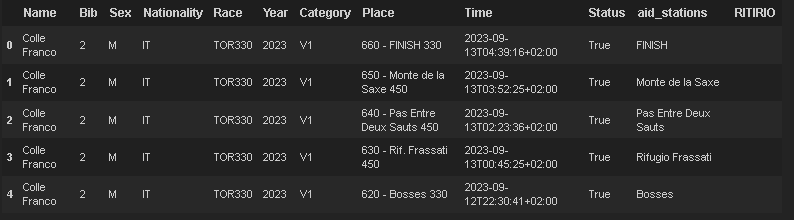

In [15]:
# 2024-09-11T07:08:32+02:00

# Split the 'Time' column to remove the timezone offset
TOR330['new_Time'] = TOR330['Time'].str.split('+').str[0]

# Convert the cleaned time string to a datetime object
TOR330['new_Time'] = pd.to_datetime(TOR330['new_Time'])

# # Add the 2-hour offset using timedelta
# # NO NEED!!!
# TOR330['new_Time'] = TOR330['new_Time'] + pd.to_timedelta('02:00:00')

# Preview the DataFrame
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2024 0  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            1  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            2  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            3  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            4  D Haene Francois   10   M          FR  TOR330  2024      SEN   

                                        Place                       Time  \
TOR330_2024 0                660 - FINISH 330  2024-09-11T07:08:32+02:00   
            1      650 - Monte de la Saxe 450  2024-09-11T06:25:42+02:00   
            2  640 - Pas Entre Deux Sauts 450  2024-09-11T05:01:52+02:00   
            3         630 - Rif. Frassati 450  2024-09-11T03:24:39+02:00   
            4                620 - Bosses 330  2024-09-11T00:52:13+02:00   

               Status          aid_stations RITIRIO            new_Time  
TOR330_2024 0    True                FINISH         2024-09-11 07:08:32  
            1    True      Monte de la Saxe         2024-09-11 06:25:42  
            2    True  Pas Entre Deux Sauts         2024-09-11 05:01:52  
            3    True      Rifugio Frassati         2024-09-11 03:24:39  
            4    True                Bosses         2024-09-11 00:52:13

In [16]:
for i in TOR330.aid_stations.unique():
    print(i)

FINISH
Monte de la Saxe
Pas Entre Deux Sauts
Rifugio Frassati
Bosses
Ponteille Desot
Rifugio Champillon
Ollomont OUT
Ollomont IN
Berio Damon
Col Brison
Bruson Arp
Oyace
Bivacco R. Clermont
Rifugio Cuney
Rifugio Magià
Vareton
Rifugio Barmasse
Valtournenche OUT
Valtournenche IN
Rifugio Grand Tournalin
Champoluc
Rifugio Alpenzu
Gressoney OUT
Gressoney IN
Loo
Niel La Gruba
Col della Vecchia
Lago Chiaro
Rifugio della Barma
Rifugio Coda
Sassa
Perloz
Donnas OUT
Donnas IN
Pontboset
Chardonney
Rifugio Dondena
Goilles
Cogne OUT
Cogne IN
Rifugio Sella
Eaux Rousse
Rhemes-Notre-Dame
Chalet Epee
Valgrisenche OUT
Valgrisenche IN
Planaval
Bivacco Zappelli
Rifugio Deffeyes
La Thuile
Baite Youlaz
START
Oyace OUT
PETTORALI


### PIVOTING the Dataset

In [17]:
# Pivot the data so that each participant has its own column
pivoted_TOR330 = TOR330.pivot_table(
    index=['Name','Bib', 'Sex', 
           'Nationality', 'Category', 'Race','Year', 'Status' , #'RITIRIO'
          ],
    columns='aid_stations',  
    values='new_Time',
    aggfunc='first'  # Ensures only the first match is kept in case of duplicates
).reset_index()


# pivoted_TOR330 = pivoted_TOR330.sort_values(by = 'Bib', ascending = True)
pivoted_TOR330.head()

aid_stations                Name   Bib Sex Nationality Category    Race  Year  \
0                    Abe Hiroshi   374   M          JP       V1  TOR330  2024   
1                    Acerbi Luca  1275   M          IT       V3  TOR330  2024   
2             Adamczyk Guillaume  1376   M          BE       V2  TOR330  2024   
3                    Ade Gregory   366   M          FR       V2  TOR330  2024   
4                   Adrian Scott  1266   M          GB       V2  TOR330  2024   

aid_stations  Status        Baite Youlaz         Berio Damon  ...  \
0              False 2024-09-08 13:03:31                 NaT  ...   
1              False 2024-09-08 15:17:04                 NaT  ...   
2              False 2024-09-08 15:52:36                 NaT  ...   
3               True 2024-09-08 13:08:04 2024-09-12 19:37:42  ...   
4              False 2024-09-08 14:24:13                 NaT  ...   

aid_stations       Rifugio Magià       Rifugio Sella Rifugio della Barma  \
0                            NaT 2024-09-09 22:34:45 2024-09-11 10:57:38   
1                            NaT                 NaT                 NaT   
2                            NaT                 NaT                 NaT   
3            2024-09-12 08:42:21 2024-09-09 14:59:54 2024-09-10 21:03:34   
4                            NaT 2024-09-09 15:59:38 2024-09-11 03:10:04   

aid_stations               START               Sassa     Valgrisenche IN  \
0            2024-09-08 09:24:25 2024-09-11 04:02:41 2024-09-09 00:43:19   
1            2024-09-08 11:37:12                 NaT 2024-09-09 04:40:58   
2            2024-09-08 11:44:44                 NaT 2024-09-09 06:50:49   
3            2024-09-08 09:21:44 2024-09-10 15:27:20 2024-09-08 22:07:34   
4            2024-09-08 11:19:38 2024-09-10 20:22:36 2024-09-08 23:55:07   

aid_stations    Valgrisenche OUT    Valtournenche IN   Valtournenche OUT  \
0            2024-09-09 04:15:35                 NaT                 NaT   
1                            NaT                 NaT                 NaT   
2            2024-09-09 08:45:53                 NaT                 NaT   
3            2024-09-09 00:04:03 2024-09-11 22:46:14 2024-09-12 02:16:37   
4            2024-09-09 00:45:48                 NaT                 NaT   

aid_stations             Vareton  
0                            NaT  
1                            NaT  
2                            NaT  
3            2024-09-12 05:27:10  
4                            NaT  

[5 rows x 63 columns]

In [18]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1095, 63)
Status
False    560
True     535
Name: Status, dtype: int64


In [19]:
pivoted_TOR330.columns

Index(['Name', 'Bib', 'Sex', 'Nationality', 'Category', 'Race', 'Year',
       'Status', 'Baite Youlaz', 'Berio Damon', 'Bivacco R. Clermont',
       'Bivacco Zappelli', 'Bosses', 'Bruson Arp', 'Chalet Epee', 'Champoluc',
       'Chardonney', 'Cogne IN', 'Cogne OUT', 'Col Brison',
       'Col della Vecchia', 'Donnas IN', 'Donnas OUT', 'Eaux Rousse', 'FINISH',
       'Goilles', 'Gressoney IN', 'Gressoney OUT', 'La Thuile', 'Lago Chiaro',
       'Loo', 'Monte de la Saxe', 'Niel La Gruba', 'Ollomont IN',
       'Ollomont OUT', 'Oyace', 'Oyace OUT', 'PETTORALI',
       'Pas Entre Deux Sauts', 'Perloz', 'Planaval', 'Pontboset',
       'Ponteille Desot', 'Rhemes-Notre-Dame', 'Rifugio Alpenzu',
       'Rifugio Barmasse', 'Rifugio Champillon', 'Rifugio Coda',
       'Rifugio Cuney', 'Rifugio Deffeyes', 'Rifugio Dondena',
       'Rifugio Frassati', 'Rifugio Grand Tournalin', 'Rifugio Magià',
       'Rifugio Sella', 'Rifugio della Barma', 'START', 'Sassa',
       'Valgrisenche IN', 'Valgrisenche

In [20]:
# reordering columns 
pivoted_TOR330 = pivoted_TOR330[[
'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status', #'RITIRIO',  
'START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    # 'Bivacco Zappelli', 'Col Brison', 'Berio Damon' # Dropping these because its not very useful anyway!
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
    'Eaux Rousse', 'Rifugio Sella', 'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 
    'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo',
    'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 
    'Oyace', 'Bruson Arp',   'Ollomont IN', 
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 
    'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH']]

pivoted_TOR330 = pivoted_TOR330.sort_values(by = 'Bib', ascending = True)
pivoted_TOR330.head()

aid_stations              Name  Bib Sex Nationality  Year    Race Category  \
218               Colle Franco    1   M          IT  2024  TOR330       V1   
1015            Verjee Sabrina    2   F          GB  2024  TOR330       V1   
829             Reynolds Galen    3   M          CA  2024  TOR330       V1   
119               Borzani Lisa    4   F          IT  2024  TOR330       V1   
353           Galeati Gianluca    5   M          IT  2024  TOR330       V1   

aid_stations  Status               START        Baite Youlaz  ...  \
218            False 2024-08-24 23:40:09                 NaT  ...   
1015            True 2024-08-24 23:41:09 2024-09-08 12:00:15  ...   
829            False 2024-09-08 09:00:00 2024-09-08 11:47:21  ...   
119             True 2024-09-08 09:00:00 2024-09-08 11:56:21  ...   
353            False 2024-09-08 09:00:00 2024-09-08 11:47:54  ...   

aid_stations          Bruson Arp         Ollomont IN        Ollomont OUT  \
218          2024-09-11 20:22:22                 NaT                 NaT   
1015         2024-09-11 07:47:36 2024-09-11 09:36:42 2024-09-11 09:41:25   
829                          NaT                 NaT                 NaT   
119          2024-09-11 11:26:56 2024-09-11 13:35:51 2024-09-11 14:01:57   
353                          NaT                 NaT                 NaT   

aid_stations  Rifugio Champillon     Ponteille Desot              Bosses  \
218                          NaT                 NaT                 NaT   
1015         2024-09-11 11:39:19 2024-09-11 13:21:27 2024-09-11 14:51:36   
829                          NaT                 NaT                 NaT   
119          2024-09-11 15:47:55 2024-09-11 17:51:55 2024-09-11 19:37:12   
353                          NaT                 NaT                 NaT   

aid_stations    Rifugio Frassati Pas Entre Deux Sauts    Monte de la Saxe  \
218                          NaT  2024-09-14 07:58:11                 NaT   
1015         2024-09-11 17:42:39  2024-09-11 19:33:31 2024-09-11 21:05:48   
829                          NaT                  NaT                 NaT   
119          2024-09-11 23:00:32  2024-09-12 02:16:14 2024-09-12 04:44:45   
353                          NaT                  NaT                 NaT   

aid_stations              FINISH  
218                          NaT  
1015         2024-09-11 22:03:21  
829                          NaT  
119          2024-09-12 06:09:34  
353                          NaT  

[5 rows x 58 columns]

In [21]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1095, 58)
Status
False    560
True     535
Name: Status, dtype: int64


### RITIRIO

Although every attempt was tried to include RITIRIO column in the dataset, it came to light that some people were twice marked retired. 

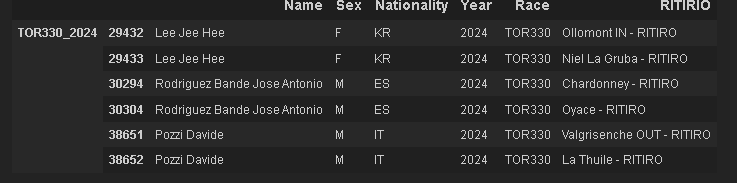

#### Solution
Do nothing. Dont reattach it to the pivoted dataset. It is useless anyway. Only 140 runners were marked as retired, very far from the DNF number.  

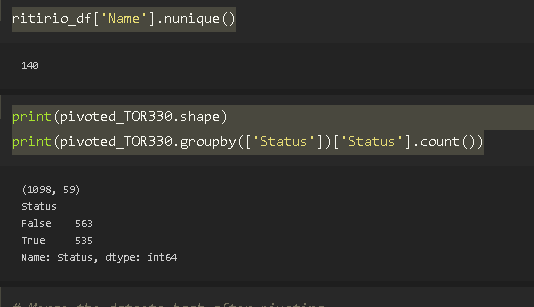

In [22]:
ritirio_df = TOR330[~(TOR330['RITIRIO'] == '')]
# ritirio_df = ritirio_df[['Bib', 'RITIRIO']]
ritirio_df.head()

Name   Bib Sex Nationality    Race  Year  \
TOR330_2024 8619   Hutchinson G Brian  1013   M          IE  TOR330  2024   
            9311         Cagna Andrea  1547   M          IT  TOR330  2024   
            28001       Park Kwangwon   150   M          KR  TOR330  2024   
            28262      Sotillo Antoni   232   M          ES  TOR330  2024   
            28556     Fioroni Massimo    62   M          IT  TOR330  2024   

                  Category                                Place  \
TOR330_2024 8619        V2            620 - Bosses 330 - RITIRO   
            9311        V1         201 - Cogne OUT 450 - RITIRO   
            28001       V1  330 - Rif. della Barma 450 - RITIRO   
            28262       V1            620 - Bosses 330 - RITIRO   
            28556       V2         201 - Cogne OUT 450 - RITIRO   

                                        Time  Status         aid_stations  \
TOR330_2024 8619   2024-09-13T06:21:34+02:00    True               Bosses   
            9311   2024-09-10T06:52:37+02:00    True            Cogne OUT   
            28001  2024-09-11T16:25:26+02:00   False  Rifugio della Barma   
            28262  2024-09-12T11:52:27+02:00   False               Bosses   
            28556  2024-09-10T01:52:27+02:00   False            Cogne OUT   

                                        RITIRIO            new_Time  
TOR330_2024 8619                Bosses - RITIRO 2024-09-13 06:21:34  
            9311             Cogne OUT - RITIRO 2024-09-10 06:52:37  
            28001  Rifugio della Barma - RITIRO 2024-09-11 16:25:26  
            28262               Bosses - RITIRO 2024-09-12 11:52:27  
            28556            Cogne OUT - RITIRO 2024-09-10 01:52:27

In [23]:
# Get a list of duplicate names
duplicate_list = ritirio_df['Name'][ritirio_df['Name'].duplicated()].unique()

# Filter the DataFrame to only rows where 'Name' is in the duplicate list
duplicates_in_dataframe = ritirio_df[ritirio_df['Name'].isin(duplicate_list)]

# Display or process the result
duplicates_in_dataframe[['Name', 'Sex', 'Nationality', 'Year', 'Race', 'RITIRIO' ]]


Name Sex Nationality  Year    Race  \
TOR330_2024 29432                   Lee Jee Hee   F          KR  2024  TOR330   
            29433                   Lee Jee Hee   F          KR  2024  TOR330   
            30294  Rodriguez Bande Jose Antonio   M          ES  2024  TOR330   
            30304  Rodriguez Bande Jose Antonio   M          ES  2024  TOR330   
            38651                  Pozzi Davide   M          IT  2024  TOR330   
            38652                  Pozzi Davide   M          IT  2024  TOR330   

                                     RITIRIO  
TOR330_2024 29432       Ollomont IN - RITIRO  
            29433     Niel La Gruba - RITIRO  
            30294        Chardonney - RITIRO  
            30304             Oyace - RITIRO  
            38651  Valgrisenche OUT - RITIRO  
            38652         La Thuile - RITIRO

In [24]:
ritirio_df['Name'].nunique()

140

In [25]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1095, 58)
Status
False    560
True     535
Name: Status, dtype: int64


In [26]:
# # Merge the datsets back after pivoting
# pivoted_TOR330 = pivoted_TOR330.merge(
#     ritirio_df[['Bib', 'RITIRIO']].drop_duplicates(),  # Ensure no duplicates in 'Bib' and 'RITIRIO'
#     on='Bib',
#     how='left'
# )

In [27]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1095, 58)
Status
False    560
True     535
Name: Status, dtype: int64


### Dealing with Anomalies

Several anomalies were spotted with the finish times. 

Some runners had a timestamp at the finish line, yet failed to be scanned Ollomont IN or OUT or any other refugee or checkpoints on the last stage. 


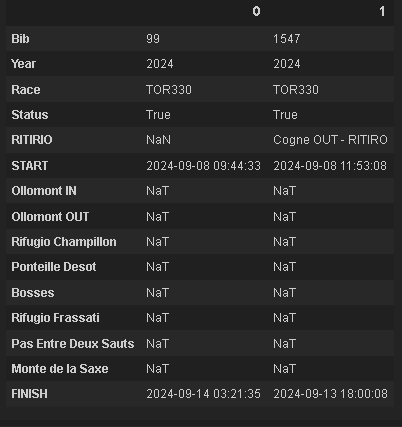

SOLUTION: change their status to FALSE and remove the timestamp

### 2023 Solution
9 participants were incorrectly labelled as finished!
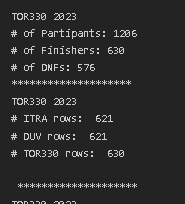

8 participants were identified as labelled finished and had a finish time but missed all stage 7 checkpoints
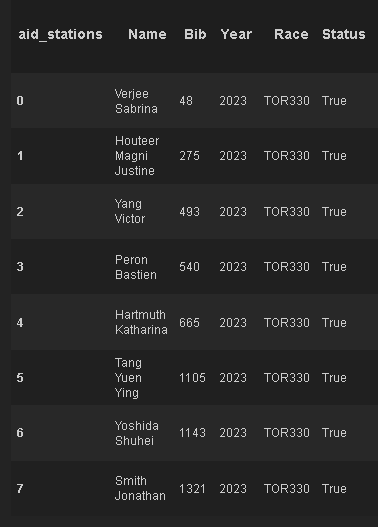



### 2024 Solution

In [28]:
# Looking for runners who have FINISHED< BUT have missing values for all last 3 checkpoints!
anomalies_df = pivoted_TOR330[(pivoted_TOR330['Status'] == True) &
               (pivoted_TOR330['Bosses'].isna()) &                
               (pivoted_TOR330['Rifugio Frassati'].isna()) & 
               (pivoted_TOR330['Pas Entre Deux Sauts'].isna()) &
               (pivoted_TOR330['Monte de la Saxe'].isna())]

anomalies_df[[ 'Name', 'Bib', 'Year', 'Race', 'Status',  'START',
    	'Ollomont IN',	'Ollomont OUT',
    'Rifugio Champillon', 'Ponteille Desot',
    'Bosses',	'Rifugio Frassati',	'Pas Entre Deux Sauts',	'Monte de la Saxe',
    'FINISH']].reset_index(drop = True)

### Conclusion: Easily visible that there are several other places that have missing values 

aid_stations                            Name   Bib  Year    Race  Status  \
0             Martinez Raya Francisco Manuel    99  2024  TOR330    True   
1                               Cagna Andrea  1547  2024  TOR330    True   

aid_stations               START Ollomont IN Ollomont OUT Rifugio Champillon  \
0            2024-09-08 09:44:33         NaT          NaT                NaT   
1            2024-09-08 11:53:08         NaT          NaT                NaT   

aid_stations Ponteille Desot Bosses Rifugio Frassati Pas Entre Deux Sauts  \
0                        NaT    NaT              NaT                  NaT   
1                        NaT    NaT              NaT                  NaT   

aid_stations Monte de la Saxe              FINISH  
0                         NaT 2024-09-14 03:21:35  
1                         NaT 2024-09-13 18:00:08

In [29]:
# EXECUTING SOLUTION
for name in anomalies_df['Name'].unique():  

    # Fixing the code with .loc[] for proper assignment
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'FINISH'] = pd.NaT
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'Status'] = False

In [30]:
# Looking for runners who have FINISHED< BUT dont haave a finish time!
anomalies_df = pivoted_TOR330[((pivoted_TOR330['Status'] == True) 
#                               &(pivoted_TOR330['FINISH'] == pd.NaT) 
                              )&
                              
                              (
                                  (pivoted_TOR330['Bosses'].isna()) |                
               (pivoted_TOR330['Rifugio Frassati'].isna()) | 
               (pivoted_TOR330['Pas Entre Deux Sauts'].isna()) |
               (pivoted_TOR330['Monte de la Saxe'].isna())
                              )]

anomalies_df[[ 'Name', 'Bib', 'Year', 'Race', 'Status',  'START',
    	'Ollomont IN',	'Ollomont OUT',
    'Rifugio Champillon', 'Ponteille Desot',
    'Bosses',	'Rifugio Frassati',	'Pas Entre Deux Sauts',	'Monte de la Saxe',
    'FINISH']]

### Conclusion: Easily visible that there are several other places that have missing values 

aid_stations               Name   Bib  Year    Race  Status  \
470               Jonkers Menno    29  2024  TOR330    True   
127               Breuer Pierre   126  2024  TOR330    True   
453            Inglezou Asimina   164  2024  TOR330    True   
696               Moulis Pascal   177  2024  TOR330    True   
16                Allen Kaitlin   196  2024  TOR330    True   
29                Aquila Davide   425  2024  TOR330    True   
85               Bersoult Lucas   474  2024  TOR330    True   
206           Christophe Naudin  1113  2024  TOR330    True   
523                  Kuusi Sami  1190  2024  TOR330    True   
45                  Baggio Eros  1213  2024  TOR330    True   
482             Karppinen Kimmo  1246  2024  TOR330    True   
158                 Capps Geoff  1391  2024  TOR330    True   
400           Grisone Benedetta  1423  2024  TOR330    True   
1051                 Wu Weixing  1534  2024  TOR330    True   

aid_stations               START         Ollomont IN        Ollomont OUT  \
470          2024-09-08 09:16:26 2024-09-13 04:00:33 2024-09-13 08:50:12   
127          2024-09-08 09:19:01 2024-09-12 07:24:52 2024-09-12 09:17:44   
453          2024-09-08 09:21:02 2024-09-12 18:08:44 2024-09-12 19:18:43   
696          2024-09-08 09:39:25 2024-09-12 16:28:29 2024-09-12 19:12:42   
16           2024-09-08 09:27:00 2024-09-12 04:23:08 2024-09-12 05:11:44   
29           2024-09-08 09:31:27 2024-09-13 13:17:06 2024-09-13 15:33:20   
85           2024-09-08 09:43:15 2024-09-12 19:19:38 2024-09-12 22:40:30   
206          2024-09-08 11:29:50 2024-09-13 16:31:36 2024-09-13 19:43:58   
523          2024-09-08 11:46:27 2024-09-13 17:44:08 2024-09-13 19:59:15   
45           2024-09-08 11:36:59 2024-09-13 17:52:11 2024-09-13 20:29:24   
482          2024-09-08 11:38:32 2024-09-13 15:15:02 2024-09-13 17:28:54   
158          2024-09-08 11:52:29 2024-09-13 01:09:37 2024-09-13 03:35:43   
400          2024-09-08 11:19:59 2024-09-13 16:55:19 2024-09-13 19:12:00   
1051         2024-09-08 11:53:10 2024-09-13 06:24:13 2024-09-13 10:11:11   

aid_stations  Rifugio Champillon     Ponteille Desot              Bosses  \
470                          NaT 2024-09-13 13:24:49 2024-09-13 15:37:06   
127          2024-09-12 10:35:06 2024-09-12 12:02:23 2024-09-12 13:20:35   
453          2024-09-12 21:28:32 2024-09-13 00:05:07 2024-09-13 02:13:34   
696          2024-09-12 21:45:39 2024-09-13 00:09:21 2024-09-13 02:37:56   
16           2024-09-12 06:54:45 2024-09-12 08:54:31 2024-09-12 10:44:13   
29           2024-09-13 17:29:27 2024-09-13 19:58:40 2024-09-13 22:42:28   
85           2024-09-13 00:36:21 2024-09-13 02:35:44 2024-09-13 05:02:42   
206          2024-09-13 22:09:24 2024-09-14 01:50:09 2024-09-14 05:09:54   
523          2024-09-13 22:42:55 2024-09-14 02:23:40 2024-09-14 06:33:11   
45           2024-09-13 22:24:36 2024-09-14 01:55:28 2024-09-14 04:52:08   
482          2024-09-13 19:37:56 2024-09-13 22:19:59                 NaT   
158          2024-09-13 06:15:12 2024-09-13 08:47:39 2024-09-13 11:06:54   
400          2024-09-13 21:42:49 2024-09-14 01:45:16 2024-09-14 04:58:14   
1051                         NaT 2024-09-13 15:21:10 2024-09-13 17:58:03   

aid_stations    Rifugio Frassati Pas Entre Deux Sauts    Monte de la Saxe  \
470          2024-09-13 19:33:56                  NaT 2024-09-14 02:23:00   
127          2024-09-12 15:39:19                  NaT 2024-09-12 18:30:52   
453          2024-09-13 05:47:17                  NaT 2024-09-13 13:01:49   
696          2024-09-13 08:51:09                  NaT 2024-09-13 12:29:19   
16           2024-09-12 13:31:14                  NaT 2024-09-12 16:50:36   
29           2024-09-14 03:22:26                  NaT 2024-09-14 12:17:00   
85           2024-09-13 08:30:30                  NaT 2024-09-13 12:24:41   
206          2024-09-14 09:50:40  2024-09-14 13:04:23                 NaT   
523                          NaT  2024-09-14 12:10:28 2024-09-14 14:43:09   
45

In [31]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2024
# of Partipants: 1095
# of Finishers: 533
# of DNFs: 562
********************
TOR330 2024
# ITRA rows:  533
# DUV rows:  533
# TOR330 rows:  533

 ********************
TOR330 2024
# of Partipants: 1095 

Status
False    562
True     533
Name: Status, dtype: int64
********************


### Start Line Issues

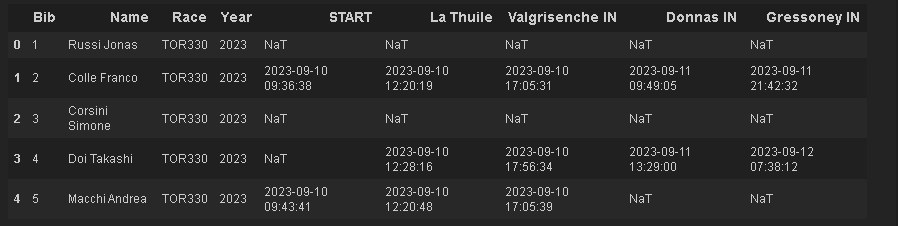

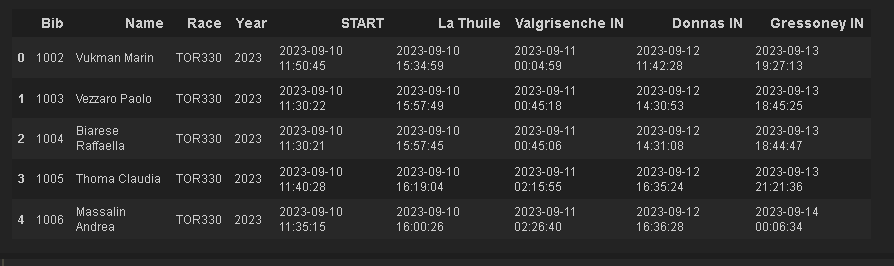

START times are all over the place and this is a MAJOR issue! 
It is important because if the start is not cleaned, it will affet the race finishing time and all the durations in between. 


#### SOLUTION
1) Made a new TIME column from DUV dates

2) added start times based on the wave (based on the bib)

##### Reading in TORX dates extracted from DUV

In [32]:
file = f'TORX DUV dates/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])    
dates_duv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Race        26 non-null     object        
 1   Year        26 non-null     int64         
 2   Start Date  26 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 752.0+ bytes


In [33]:
dates_duv_df[dates_duv_df['Race'] =='TOR330']

Race  Year          Start Date
7   TOR330  2023 2023-09-10 10:00:00
8   TOR330  2021 2021-09-12 10:00:00
9   TOR330  2017 2017-09-10 10:00:00
10  TOR330  2024 2024-09-08 10:00:00
11  TOR330  2013 2013-09-08 10:00:00
12  TOR330  2022 2022-09-11 10:00:00
13  TOR330  2014 2014-09-07 10:00:00
14  TOR330  2019 2019-09-08 10:00:00
15  TOR330  2018 2018-09-09 10:00:00
16  TOR330  2016 2016-09-11 10:00:00
17  TOR330  2012 2012-09-09 10:00:00
18  TOR330  2011 2011-09-11 10:00:00
19  TOR330  2015 2015-09-13 10:00:00
20  TOR330  2010 2010-09-12 10:00:00

### Adding dates into TOR330

In [34]:
# making sure both columns are years!
pivoted_TOR330['Year'] = pivoted_TOR330['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# have I dropped any rows?
print(pivoted_TOR330.shape)

# Merging on two columns: 'Race' and 'Year'
pivoted_TOR330_dates = pd.merge(pivoted_TOR330, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(pivoted_TOR330_dates.shape)



(1095, 58)
(1095, 59)


In [35]:
# Following the assumption that every bib prior to 1001 starts at 10:00:00
pivoted_TOR330_dates['new_Start Date'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        pivoted_TOR330_dates['Start Date'], 
        pivoted_TOR330_dates['Start Date'] + pd.to_timedelta('02:00:00'))

# Following the assumption that every bib from 1001 onwards starts at 12:00:00
pivoted_TOR330_dates['Wave'] = np.where(
    pivoted_TOR330_dates['Bib'] <= 1001, 
        'Wave1', 
        'Wave2')

In [36]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']< 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

Bib              Name    Race  Year      new_Start Date  \
0    1      Colle Franco  TOR330  2024 2024-09-08 10:00:00   
1    2    Verjee Sabrina  TOR330  2024 2024-09-08 10:00:00   
2    3    Reynolds Galen  TOR330  2024 2024-09-08 10:00:00   
3    4      Borzani Lisa  TOR330  2024 2024-09-08 10:00:00   
4    5  Galeati Gianluca  TOR330  2024 2024-09-08 10:00:00   

            La Thuile     Valgrisenche IN           Donnas IN  \
0                 NaT                 NaT                 NaT   
1 2024-09-08 12:36:14 2024-09-08 18:06:48 2024-09-09 14:13:09   
2 2024-09-08 12:18:28 2024-09-08 17:12:09                 NaT   
3 2024-09-08 12:31:35 2024-09-08 18:06:56 2024-09-09 14:42:32   
4 2024-09-08 12:20:05 2024-09-08 17:28:38                 NaT   

         Gressoney IN  
0                 NaT  
1 2024-09-10 08:06:44  
2                 NaT  
3 2024-09-10 11:32:56  
4                 NaT

In [37]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']> 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

Bib               Name    Race  Year      new_Start Date  \
0  1002     Rana Francesco  TOR330  2024 2024-09-08 12:00:00   
1  1003    Del Re Domenico  TOR330  2024 2024-09-08 12:00:00   
2  1004    Bellini Roberto  TOR330  2024 2024-09-08 12:00:00   
3  1005  Spagarino Stefano  TOR330  2024 2024-09-08 12:00:00   
4  1006  Pizzutti Riccardo  TOR330  2024 2024-09-08 12:00:00   

            La Thuile     Valgrisenche IN           Donnas IN  \
0 2024-09-08 16:13:08 2024-09-09 02:11:42 2024-09-10 18:25:37   
1 2024-09-08 16:09:10 2024-09-09 02:23:04                 NaT   
2 2024-09-08 15:10:33 2024-09-08 22:44:21 2024-09-10 04:51:31   
3 2024-09-08 16:09:08 2024-09-09 02:11:38 2024-09-10 20:02:44   
4                 NaT 2024-09-09 00:12:34 2024-09-10 11:35:15   

         Gressoney IN  
0 2024-09-11 22:24:03  
1                 NaT  
2 2024-09-11 08:49:09  
3 2024-09-12 00:27:15  
4 2024-09-11 12:18:11

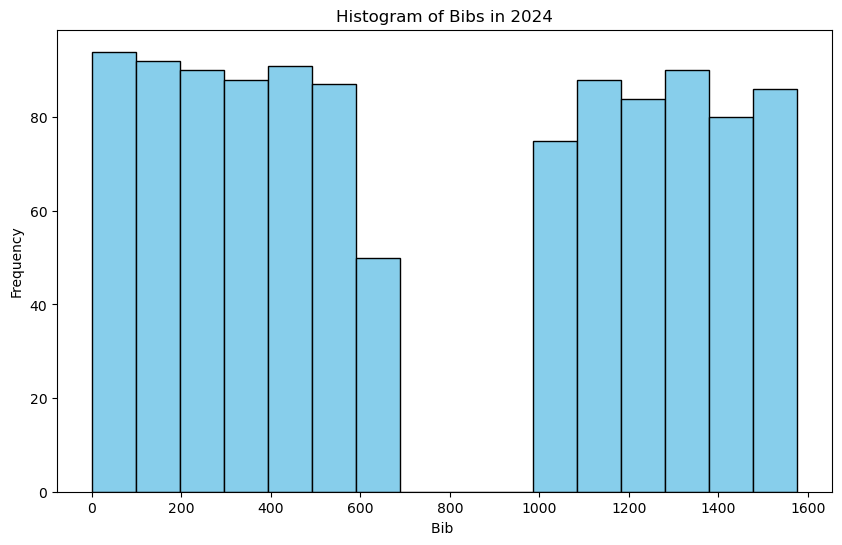

In [38]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(pivoted_TOR330_dates['Bib'], bins=16, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Bibs in {year}')
plt.xlabel('Bib ')
plt.ylabel('Frequency')
plt.show()

In [39]:
### WHich wave is more likely to finish? 
### Wave 1 seems to have way more finishers - they do have a higher ITRA score, meaning that they are more
### experienced and stronger than Wave 2..
pivoted_TOR330_dates.groupby(['Wave', 'Status'])['Status'].size()

Wave   Status
Wave1  False     227
       True      366
Wave2  False     335
       True      167
Name: Status, dtype: int64

### Calculating Duration - THE MOST IMPORTANT!

In [40]:
# Calculate Duration
pivoted_TOR330_dates['Duration'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['new_Start Date'] 

# Sort the DataFrame by the 'Duration' column
pivoted_TOR330_dates = pivoted_TOR330_dates.sort_values(by='Duration')


Processing column: Duration
9    2 days 21:08:32
22   3 days 01:10:18
6    3 days 03:35:59
18   3 days 04:43:09
13   3 days 04:49:20
Name: Duration, dtype: timedelta64[ns]


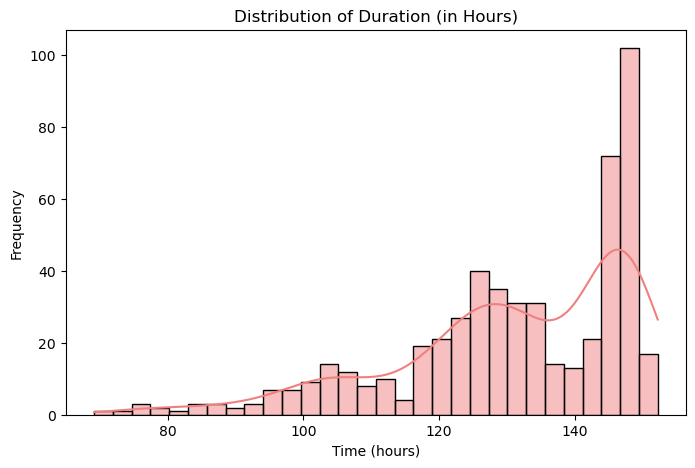

In [41]:
print(f"Processing column: Duration")
print(pivoted_TOR330_dates['Duration'].head())


pivoted_TOR330_dates['Duration']
# Convert to timedelta and get total hours (handling NaT)
pivoted_TOR330_dates['Duration_hours'] = pd.to_timedelta(
    pivoted_TOR330_dates['Duration'], errors='coerce'
).dt.total_seconds() / 3600  # Convert seconds to hours

# Drop NaN values for histogram visualization
data_to_plot = pivoted_TOR330_dates['Duration_hours'].dropna()

# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_to_plot, kde=True, bins=30, color="lightcoral")
plt.ticklabel_format(style='plain', axis='x')
plt.title(f"Distribution of Duration (in Hours)")
plt.xlabel("Time (hours)")
plt.ylabel("Frequency")
plt.show()


In [42]:
# Reorder the columns in the correct order
pivoted_TOR330_dates = pivoted_TOR330_dates[[
        'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 
        'Category', 'Status','Wave', 'Duration', # MOVING DURATION CLOSER TO THE START SO I CAN SEE IT!
        
        'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes',
         'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
        'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
        'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
        'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
        'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
        'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
        'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
        'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
        'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney',
        'Bivacco R. Clermont', 'Oyace', 'Bruson Arp', 
         'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon',
        'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts',
        'Monte de la Saxe', 'FINISH'
]]

### Checking accuracy of the Duration calculation

Because of issues with Start Date, it was thought that it would be a good idea to try and compare the DUV and ITRA duration time to establish accuracy of the calculation...

There are issues with the names, so some will be not be successfully merged.

In [43]:
# print(pivoted_TOR330_dates['Duration'][pivoted_TOR330_dates['Name'].str.contains('Jonina')])
# # print(TORX_duv_df['Performance'][TORX_duv_df['Name'].str.contains('Jonina')])
# # Finished in 144:46:43 hours and 

In [44]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2024
# of Partipants: 1095
# of Finishers: 533
# of DNFs: 562
********************
TOR330 2024
# ITRA rows:  533
# DUV rows:  533
# TOR330 rows:  533

 ********************
TOR330 2024
# of Partipants: 1095 

Status
False    562
True     533
Name: Status, dtype: int64
********************


## extracting DNF and FInisher's for more cleaning!

In [45]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[
                        # extracting runners whose status is True (Finished)
                        (pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())].reset_index()


In [46]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[
                    # selecting all rows that DNFed
                    (pivoted_TOR330_dates['Status'] == False) & # AND
                    # selecting all rows where FINISH does not have a time
                    (pivoted_TOR330_dates['FINISH'].isna())]

In [47]:
print(pivoted_TOR330_dates_noDNF.shape)
print(pivoted_TOR330_dates_DNF.shape)
print('MUST ADD UP TO:')
print(pivoted_TOR330_dates.shape)

(533, 61)
(562, 60)
MUST ADD UP TO:
(1095, 60)


### FINISHER'S Missing Timestamps
From time to time, timestamps are missing, even for finishers. Here is the missing values count for all finishers. 

THis is could be for several issues:
1) Participant's Fatigue - they forget to ask to be scanned

2) Volunteer's Fatigue - they forget to scan participants /  they thought they had already scanned the runer

3) Technology Failure - something goes wrong... ?
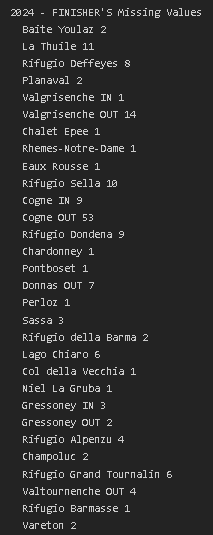

This is just a screenshot, more can be seen below!

### DNFs 

In [48]:
#### What missing values are there? 
### Some missing value is okay due to the fact that they DNFed so they wont have a timestamp
pivoted_TOR330_dates_DNF.isna().sum()

Name                         0
Bib                          0
Sex                          0
Nationality                  0
Year                         0
Race                         0
Category                     0
Status                       0
Wave                         0
Duration                   562
new_Start Date               0
Baite Youlaz                12
La Thuile                   21
Rifugio Deffeyes            30
Planaval                    37
Valgrisenche IN             59
Valgrisenche OUT            99
Chalet Epee                100
Rhemes-Notre-Dame          115
Eaux Rousse                157
Rifugio Sella              232
Cogne IN                   248
Cogne OUT                  261
Goilles                    278
Rifugio Dondena            288
Chardonney                 283
Pontboset                  290
Donnas IN                  291
Donnas OUT                 305
Perloz                     311
Sassa                      310
Rifugio Coda               315
Rifugio 

### What is the last place that DNFers reached?

In [49]:
# Function to find the last non-blank column
def get_last_non_blank(row):
    for col in reversed(row.index):
        if pd.notna(row[col]):  # Check if the value is not NaN
#             print(col)
            return col
#     return None  # In case all columns are blank

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)


In [50]:
pivoted_TOR330_dates = pivoted_TOR330_dates[['Name', 'Bib',
                                                     'Sex', 'Nationality',
                                                     'Year', 'Race', 
                                                     'Category', 'Status', 'Wave', 'Duration', 
                                                      'Retired', # putting retired at the from and not the back
                                                     'new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
       'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
       'Bruson Arp',   'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
       'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
       'FINISH']]

In [51]:
# creating a dataset to examine DNFs in the excel
pivoted_TOR330_dates_DNF_for_excel = pivoted_TOR330_dates_DNF.copy().drop(columns=['Sex', 'Nationality',
                                                          'Category', 'Status', 
                                                          'Wave', 'Duration'])    

# pivoted_TOR330_dates_DNF_for_excel.to_excel(f'{race} Data/5. Clean Data for Data Visualisation/{race}_{year}_DNF_df.xlsx', index = False)


In [52]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == True].head(1)

Name  Bib Sex Nationality  Year    Race Category  Status  \
9  D Haene Francois   10   M          FR  2024  TOR330      SEN    True   

    Wave        Duration  ...          Bruson Arp         Ollomont IN  \
9  Wave1 2 days 21:08:32  ... 2024-09-10 18:48:52 2024-09-10 20:14:49   

         Ollomont OUT  Rifugio Champillon     Ponteille Desot  \
9 2024-09-10 20:33:07 2024-09-10 21:51:36 2024-09-10 23:27:47   

               Bosses    Rifugio Frassati Pas Entre Deux Sauts  \
9 2024-09-11 00:52:13 2024-09-11 03:24:39  2024-09-11 05:01:52   

     Monte de la Saxe              FINISH  
9 2024-09-11 06:25:42 2024-09-11 07:08:32  

[1 rows x 61 columns]

### Issues with Last location Detected
Some people who too far of a distance between last lifebase /  refuge / checkpoint for it to be an accurate representation of their last location.

2021
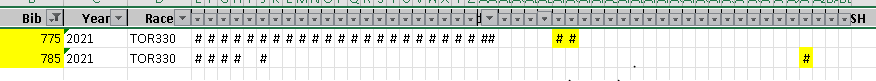

2023
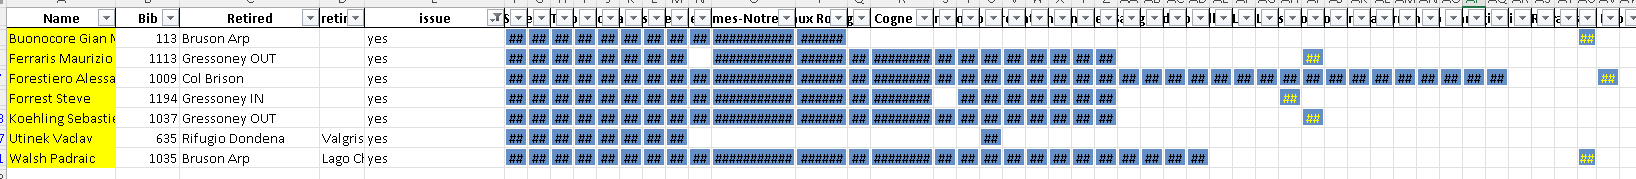

2024

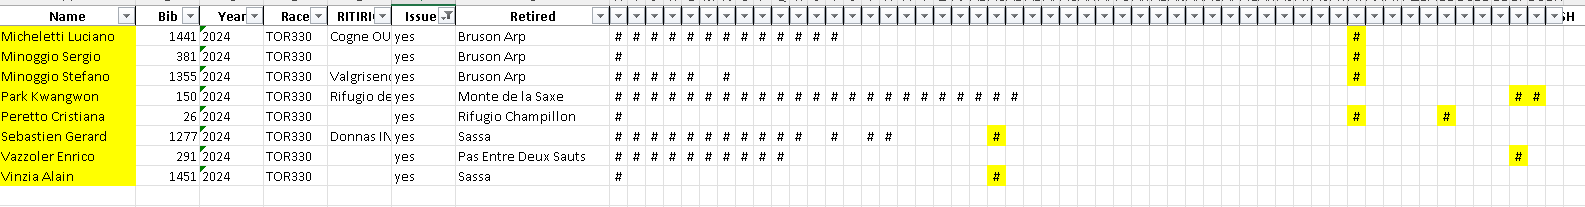

##### Solution
Create a loop that would clean those timestamps.

In [53]:
try:
    if year == '2023':

        names_that_DNFed_and_then_popped_up_miles_away =['Utinek Vaclav', 'Walsh Padraic',
                                                        'Ferraris Maurizio', 
    # 'Buonocore Gian Mario', 'Forestiero Alessandro', ## Have 2 timestamps of time travel
                                                         'Forrest Steve','Koehling Sebastien'
                                                        ]
        retired_list = list(pivoted_TOR330_dates['Retired'][
            pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())
        print(retired_list)

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            retired_column = row['Retired']  # Get the column name in 'Retired'


            if retired_column in retired_list:
                pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        # Prepending 'Name' and 'Bib' to the list
        retired_list = ['Name', 'Bib'] + retired_list  + ['Retired']
        print(retired_list)

    elif year == '2024':
        names_that_DNFed_and_then_popped_up_miles_away =['Micheletti Luciano', 'Minoggio Sergio','Minoggio Stefano', 
                                                        'Park Kwangwon',  ## Has 2 time teleportation 
                                                        'Peretto Cristiana', ## Has 2 time teleportation 
                                                        'Sebastien Gerard', 'Vazzoler Enrico', 'Vinzia Alain']

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            # Get the column name in 'Retired'
            retired_column = row['Retired']

            retired_list = list(pivoted_TOR330_dates['Retired'][
                pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())

            if row['Name'] == 'Park Kwangwon':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Pas Entre Deux Sauts'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Monte de la Saxe'] = pd.NaT

            elif row['Name'] == 'Peretto Cristiana':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Rifugio Champillon'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Bruson Arp'] = pd.NaT

            else:

                if retired_column in retired_list:
                    pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        retired_list = ['Name', 'Bib'] + retired_list + ['Retired']
        print(retired_list)
    elif year == '2021':

        names_that_DNFed_and_then_popped_up_miles_away =['Guillaume Adamczyk', 
                                                         'Andreu Casademont Roger']
        retired_list = list(pivoted_TOR330_dates['Retired'][
            pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())
        
        if row['Name'] == 'Guillaume Adamczyk':
                # Has 2 cases of teletransportation
            pivoted_TOR330_dates.at[index, 'Gressoney IN'] = pd.NaT
            pivoted_TOR330_dates.at[index, 'Gressoney OUT'] = pd.NaT
        
        elif row['Name'] == 'Andreu Casademont Roger':
                # Has 2 cases of teletransportation
            pivoted_TOR330_dates.at[index, 'Rifugio Frassati'] = pd.NaT

        # Prepending 'Name' and 'Bib' to the list
        retired_list = ['Name', 'Bib'] + retired_list  + ['Retired']
        print(retired_list)

     # Display the updated DataFrame
    pivoted_TOR330_dates[retired_list][pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)]

except:
    pass

['Name', 'Bib', 'Rifugio Champillon', 'Monte de la Saxe', 'Pas Entre Deux Sauts', 'Bruson Arp', 'Sassa', 'Retired']


In [54]:
# Dropping the column retired otherwise it is going to think that RETIRED is the last column
pivoted_TOR330_dates = pivoted_TOR330_dates.drop(columns=['Retired'])    

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)

In [55]:
pivoted_TOR330_dates.head()

Name  Bib Sex Nationality  Year    Race Category  Status  \
9    D Haene Francois   10   M          FR  2024  TOR330      SEN    True   
22  Marmissolle Benat   25   M          FR  2024  TOR330       V1    True   
6      Perrier Martin    7   M          CH  2024  TOR330      SEN    True   
18      Macchi Andrea   20   M          IT  2024  TOR330      SEN    True   
13        Hall Damian   15   M          GB  2024  TOR330       V1    True   

     Wave        Duration  ...         Ollomont IN        Ollomont OUT  \
9   Wave1 2 days 21:08:32  ... 2024-09-10 20:14:49 2024-09-10 20:33:07   
22  Wave1 3 days 01:10:18  ... 2024-09-10 23:02:43 2024-09-10 23:20:59   
6   Wave1 3 days 03:35:59  ... 2024-09-11 01:54:10 2024-09-11 02:02:45   
18  Wave1 3 days 04:43:09  ... 2024-09-11 02:42:57 2024-09-11 02:51:44   
13  Wave1 3 days 04:49:20  ... 2024-09-11 02:04:11 2024-09-11 02:29:34   

    Rifugio Champillon     Ponteille Desot              Bosses  \
9  2024-09-10 21:51:36 2024-09-10 23:27:47 2024-09-11 00:52:13   
22                 NaT 2024-09-11 02:57:39 2024-09-11 04:36:19   
6  2024-09-11 03:41:57 2024-09-11 05:19:30 2024-09-11 07:12:37   
18 2024-09-11 04:42:22 2024-09-11 06:32:27 2024-09-11 08:22:14   
13 2024-09-11 04:27:34 2024-09-11 06:32:06 2024-09-11 08:22:19   

      Rifugio Frassati Pas Entre Deux Sauts    Monte de la Saxe  \
9  2024-09-11 03:24:39  2024-09-11 05:01:52 2024-09-11 06:25:42   
22 2024-09-11 07:06:42  2024-09-11 08:45:41 2024-09-11 10:19:44   
6  2024-09-11 09:39:33  2024-09-11 11:26:28 2024-09-11 12:52:46   
18 2024-09-11 10:48:23  2024-09-11 12:25:23 2024-09-11 13:59:46   
13 2024-09-11 10:48:27  2024-09-11 12:25:38 2024-09-11 13:59:27   

                FINISH Retired  
9  2024-09-11 07:08:32     NaN  
22 2024-09-11 11:10:18     NaN  
6  2024-09-11 13:35:59     NaN  
18 2024-09-11 14:43:09     NaN  
13 2024-09-11 14:49:20     NaN  

[5 rows x 61 columns]

###  Unpredictable Weather of 2022 
In 2022, due to the weather,  the race directors decided to stop the race at Bosses and Refuge Frassati.  

In [56]:
pivoted_TOR330_dates['Status1'] = pivoted_TOR330_dates['Status'].astype('str')
# print(pivoted_TOR330_dates['Status1'].unique())

for year in years:
    if year == '2022':
        # Update 'Status1' for year 2022
        pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ] = pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ].str.replace('True', 'Finished')

        # For finishers at Bosses
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ].str.replace('False', 'Finished at Bosses')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Finished at Rifugio Frassati')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Finished at Rifugio Frassati')

        
        
        # All other DNFs
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ].str.replace('False', 'DNF')
        
        
        
        
        
    else:
        
        print(year)
        # Update 'Status1' for years other than 2022
        pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Year'] == year, 'Status1'] = (
            pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Year'] == year, 'Status1']
            .str.replace('True', 'Finished')
            .str.replace('False', 'DNF')
        )
        print(pivoted_TOR330_dates['Status1'].unique())


2024
['Finished' 'DNF']


In [57]:
pivoted_TOR330_dates['Status1'].unique()

array(['Finished', 'DNF'], dtype=object)

In [58]:
counting_finish_DNF_dataset(pivoted_TOR330_dates)
find_out_the_rows_difference_between_datasets(pivoted_TOR330_dates)
pivoted_TOR330_dates.groupby('Status1')['Status1'].count()

TOR330 2024
# of Partipants: 1095
# of Finishers: 533
# of DNFs: 562
********************
TOR330 2024
# ITRA rows:  533
# DUV rows:  533
# TOR330 rows:  533

 ********************


Status1
DNF         562
Finished    533
Name: Status1, dtype: int64

In [59]:
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

### Where did the DNFs occur?

In [60]:
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' IN', '')
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' OUT', '')

In [61]:
Stage1 = ['Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
             'Planaval', 'Valgrisenche']
Stage2 = [ 'Chalet Epee', 'Rhemes-Notre-Dame',
            'Eaux Rousse', 'Rifugio Sella', 'Cogne']

Stage3 = [ 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset', 'Donnas']
Stage4  = ['Perloz', 'Sassa', 'Rifugio Coda',
            'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
            'Niel La Gruba', 'Loo', 'Gressoney']

Stage5 = ['Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 'Valtournenche'] 

Stage6 = [ 'Vareton', 'Rifugio Barmasse',
            'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
            'Bruson Arp',   'Ollomont']
        
Stage7 = [ 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
            'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
            'FINISH']

# finding the low / high season by date
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage1), 'Retired_Stage'] = 'Stage 1'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage2), 'Retired_Stage'] = 'Stage 2'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage3), 'Retired_Stage'] = 'Stage 3'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage4), 'Retired_Stage'] = 'Stage 4'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage5), 'Retired_Stage'] = 'Stage 5'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage6), 'Retired_Stage'] = 'Stage 6'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(Stage7), 'Retired_Stage'] = 'Stage 7'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Retired_Stage'] = 'DNS'
pivoted_TOR330_dates[(pivoted_TOR330_dates['Retired'].isnull())]

Name   Bib Sex Nationality  Year    Race Category  \
9          D Haene Francois    10   M          FR  2024  TOR330      SEN   
22        Marmissolle Benat    25   M          FR  2024  TOR330       V1   
6            Perrier Martin     7   M          CH  2024  TOR330      SEN   
18            Macchi Andrea    20   M          IT  2024  TOR330      SEN   
13              Hall Damian    15   M          GB  2024  TOR330       V1   
...                     ...   ...  ..         ...   ...     ...      ...   
1001            Xi Hongpeng  1468   M          CN  2024  TOR330       V1   
990         Billi Francesca  1456   F          IT  2024  TOR330       V1   
826              Lu Sheming  1265   M          CN  2024  TOR330       V1   
805            Zhang Bochao  1242   M          CN  2024  TOR330       V1   
1049  Forestiero Alessandro  1524   M          IT  2024  TOR330       V1   

      Status   Wave        Duration  ...  Rifugio Champillon  \
9       True  Wave1 2 days 21:08:32  ... 2024-09-10 21:51:36   
22      True  Wave1 3 days 01:10:18  ...                 NaT   
6       True  Wave1 3 days 03:35:59  ... 2024-09-11 03:41:57   
18      True  Wave1 3 days 04:43:09  ... 2024-09-11 04:42:22   
13      True  Wave1 3 days 04:49:20  ... 2024-09-11 04:27:34   
...      ...    ...             ...  ...                 ...   
1001    True  Wave2 6 days 06:21:09  ... 2024-09-13 22:10:23   
990     True  Wave2 6 days 06:53:20  ... 2024-09-13 23:18:36   
826     True  Wave2 6 days 06:57:12  ... 2024-09-13 22:18:14   
805     True  Wave2 6 days 06:59:52  ...                 NaT   
1049    True  Wave2 6 days 08:14:00  ... 2024-09-13 23:25:33   

         Ponteille Desot              Bosses    Rifugio Frassati  \
9    2024-09-10 23:27:47 2024-09-11 00:52:13 2024-09-11 03:24:39   
22   2024-09-11 02:57:39 2024-09-11 04:36:19 2024-09-11 07:06:42   
6    2024-09-11 05:19:30 2024-09-11 07:12:37 2024-09-11 09:39:33   
18   2024-09-11 06:32:27 2024-09-11 08:22:14 2024-09-11 10:48:23   
13   2024-09-11 06:32:06 2024-09-11 08:22:19 2024-09-11 10:48:27   
...                  ...                 ...                 ...   
1001 2024-09-14 02:22:32 2024-09-14 05:34:53 2024-09-14 10:12:50   
990  2024-09-14 02:36:29 2024-09-14 06:28:02 2024-09-14 10:08:25   
826  2024-09-14 02:21:51 2024-09-14 06:24:49 2024-09-14 10:10:34   
805  2024-09-14 02:32:52 2024-09-14 06:28:25 2024-09-14 09:23:48   
1049 2024-09-14 04:04:56 2024-09-14 06:50:13 2024-09-14 11:03:02   

     Pas Entre Deux Sauts    Monte de la Saxe              FINISH Retired  \
9     2024-09-11 05:01:52 2024-09-11 06:25:42 2024-09-11 07:08:32     NaN   
22    2024-09-11 08:45:41 2024-09-11 10:19:44 2024-09-11 11:10:18     NaN   
6     2024-09-11 11:26:28 2024-09-11 12:52:46 2024-09-11 13:35:59     NaN   
18    2024-09-11 12:25:23 2024-09-11 13:59:46 2024-09-11 14:43:09     NaN   
13    2024-09-11 12:25:38 2024-09-11 13:59:27 2024-09-11 14:49:20     NaN   
...                   ...                 ...                 ...     ...   
1001  2024-09-14 13:47:22 2024-09-14 16:56:11 2024-09-14 18:21:09     NaN   
990   2024-09-14 13:46:28 2024-09-14 17:04:20 2024-09-14 18:53:20     NaN   
826   2024-09-14 13:43:47 2024-09-14 17:03:47 2024-09-14 18:57:12     NaN   
805   2024-09-14 13:53:26 2024-09-14 17:03:24 2024-09-14 18:59:52     NaN   
1049  2024-09-14 16:18:41 2024-09-14 19:06:03 2024-09-14 20:14:00     NaN   

       Status1 Retired_Stage  
9     Finished           NaN  
22    Finished           NaN  
6     Finished           NaN  
18    Finished           NaN  
13    Finished           NaN  
...        ...           ...  
1001  Finished           NaN  
990   Finished           NaN  
826   Finished           NaN  
805   Finished           NaN  
1049  Finished           NaN  

[533 rows x 63 columns]

In [62]:
# making sure that I caught all aid stations!!!!
pivoted_TOR330_dates[
    (pivoted_TOR330_dates['Status'] == False) &
    
    (pivoted_TOR330_dates['Retired_Stage'].isnull())
                    ]

Empty DataFrame
Columns: [Name, Bib, Sex, Nationality, Year, Race, Category, Status, Wave, Duration, new_Start Date, Baite Youlaz, La Thuile, Rifugio Deffeyes, Planaval, Valgrisenche IN, Valgrisenche OUT, Chalet Epee, Rhemes-Notre-Dame, Eaux Rousse, Rifugio Sella, Cogne IN, Cogne OUT, Goilles, Rifugio Dondena, Chardonney, Pontboset, Donnas IN, Donnas OUT, Perloz, Sassa, Rifugio Coda, Rifugio della Barma, Lago Chiaro, Col della Vecchia, Niel La Gruba, Loo, Gressoney IN, Gressoney OUT, Rifugio Alpenzu, Champoluc, Rifugio Grand Tournalin, Valtournenche IN, Valtournenche OUT, Rifugio Barmasse, Vareton, Rifugio Magià, Rifugio Cuney, Bivacco R. Clermont, Oyace, Bruson Arp, Ollomont IN, Ollomont OUT, Rifugio Champillon, Ponteille Desot, Bosses, Rifugio Frassati, Pas Entre Deux Sauts, Monte de la Saxe, FINISH, Retired, Status1, Retired_Stage]
Index: []

[0 rows x 63 columns]

In [63]:
pivoted_TOR330_dates['Retired_Stage'].unique()

array([nan, 'Stage 7', 'Stage 2', 'Stage 3', 'Stage 1', 'DNS', 'Stage 5',
       'Stage 4', 'Stage 6'], dtype=object)

In [64]:
# finding the pre-post Gressoney
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 1' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 2' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 3' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 4' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 5' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 6' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Stage'] == 'Stage 7' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Pre-Post Gressoney'] = 'Pre Gressoney'


In [65]:
pivoted_TOR330_dates.groupby('Pre-Post Gressoney')['Pre-Post Gressoney'].count()

Pre-Post Gressoney
Post Gressoney    124
Pre Gressoney     438
Name: Pre-Post Gressoney, dtype: int64

In [66]:
pivoted_TOR330_dates.groupby('Retired_Stage')['Retired_Stage'].count()

Retired_Stage
DNS          7
Stage 1     89
Stage 2    168
Stage 3     33
Stage 4    141
Stage 5     28
Stage 6     80
Stage 7     16
Name: Retired_Stage, dtype: int64

In [67]:
counting_retired_Stage_and_wave = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False].groupby(['Retired_Stage', 'Wave'] ).size().to_frame()

# Reset the index to make it more readable
counting_retired_Stage_and_wave.index = pd.MultiIndex.from_tuples(counting_retired_Stage_and_wave.index, 
                                            names=["Retired_Stage", "Wave"])

# Unstack the Wave level to create columns for Wave1 and Wave2
counting_retired_Stage_and_wave = counting_retired_Stage_and_wave.unstack(level="Wave")
counting_retired_Stage_and_wave.reset_index(drop =  False)
counting_retired_Stage_and_wave.columns = counting_retired_Stage_and_wave.columns.droplevel(0)

try:
    # counting_retired_Stage_and_wave.columns = counting_retired_Stage_and_wave.columns.droplevel(0)
    counting_retired_Stage_and_wave['Total'] = counting_retired_Stage_and_wave['Wave1'] +counting_retired_Stage_and_wave['Wave2']

    counting_retired_Stage_and_wave['Wave1_%'] = counting_retired_Stage_and_wave['Wave1']/counting_retired_Stage_and_wave['Total']
    counting_retired_Stage_and_wave['Wave2_%'] = counting_retired_Stage_and_wave['Wave2']/counting_retired_Stage_and_wave['Total']

    counting_retired_Stage_and_wave['Wave1_%'] = round(counting_retired_Stage_and_wave['Wave1_%']*100, 1)
    counting_retired_Stage_and_wave['Wave2_%']= round(counting_retired_Stage_and_wave['Wave2_%']*100, 2)

    counting_retired_Stage_and_wave
except:
    pass

In [68]:
# DNS
pivoted_TOR330_dates[pivoted_TOR330_dates['Retired'] == 'new_Start Date']

Name   Bib Sex Nationality  Year    Race Category  Status  \
10   Mcconaughy Joseph    11   M          US  2024  TOR330      SEN   False   
23   Peretto Cristiana    26   F          IT  2024  TOR330       V2   False   
207     Locci Philippe   221   M          FR  2024  TOR330       V2   False   
351    Minoggio Sergio   381   M          IT  2024  TOR330       V2   False   
427     Doutte Antoine   463   M          RE  2024  TOR330       V1   False   
542      Lehmann Anita   592   F          CH  2024  TOR330       V1   False   
985       Vinzia Alain  1451   M          CH  2024  TOR330       V2   False   

      Wave Duration  ... Ponteille Desot Bosses Rifugio Frassati  \
10   Wave1      NaT  ...             NaT    NaT              NaT   
23   Wave1      NaT  ...             NaT    NaT              NaT   
207  Wave1      NaT  ...             NaT    NaT              NaT   
351  Wave1      NaT  ...             NaT    NaT              NaT   
427  Wave1      NaT  ...             NaT    NaT              NaT   
542  Wave1      NaT  ...             NaT    NaT              NaT   
985  Wave2      NaT  ...             NaT    NaT              NaT   

    Pas Entre Deux Sauts Monte de la Saxe FINISH         Retired Status1  \
10                   NaT              NaT    NaT  new_Start Date     DNF   
23                   NaT              NaT    NaT  new_Start Date     DNF   
207                  NaT              NaT    NaT  new_Start Date     DNF   
351                  NaT              NaT    NaT  new_Start Date     DNF   
427                  NaT              NaT    NaT  new_Start Date     DNF   
542                  NaT              NaT    NaT  new_Start Date     DNF   
985                  NaT              NaT    NaT  new_Start Date     DNF   

    Retired_Stage Pre-Post Gressoney  
10            DNS      Pre Gressoney  
23            DNS      Pre Gressoney  
207           DNS      Pre Gressoney  
351           DNS      Pre Gressoney  
427           DNS      Pre Gressoney  
542           DNS      Pre Gressoney  
985           DNS      Pre Gressoney  

[7 rows x 64 columns]

In [69]:
pivoted_TOR330_dates = pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 'Duration',  
    'Retired', 'Retired_Stage', 
    'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
    'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
    'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
    'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
    'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
    'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
    'Bruson Arp',   'Ollomont IN',
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
    'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
    'FINISH']]

### Calculating the Times for each Stage

In [70]:
pivoted_TOR330_dates['Stage 1 Time'] = pivoted_TOR330_dates['Valgrisenche IN'] - pivoted_TOR330_dates['new_Start Date']

pivoted_TOR330_dates['Time Spent in Valgrisenche'] = pivoted_TOR330_dates['Valgrisenche OUT'] - pivoted_TOR330_dates['Valgrisenche IN']

pivoted_TOR330_dates['Stage 2 Time'] = pivoted_TOR330_dates['Cogne IN'] - pivoted_TOR330_dates['Valgrisenche OUT']
pivoted_TOR330_dates['Time Spent in Cogne'] = pivoted_TOR330_dates['Cogne OUT'] - pivoted_TOR330_dates['Cogne IN']


pivoted_TOR330_dates['Stage 3 Time'] = pivoted_TOR330_dates['Donnas IN'] - pivoted_TOR330_dates['Cogne OUT']
pivoted_TOR330_dates['Time Spent in Donnas'] = pivoted_TOR330_dates['Donnas OUT'] - pivoted_TOR330_dates['Donnas IN']


pivoted_TOR330_dates['Stage 4 Time'] = pivoted_TOR330_dates['Gressoney IN'] - pivoted_TOR330_dates['Donnas OUT']
pivoted_TOR330_dates['Time Spent in Gressoney'] = pivoted_TOR330_dates['Gressoney OUT'] - pivoted_TOR330_dates['Gressoney IN']

pivoted_TOR330_dates['Stage 5 Time'] = pivoted_TOR330_dates['Valtournenche IN'] - pivoted_TOR330_dates['Gressoney OUT']
pivoted_TOR330_dates['Time Spent in Valtournenche'] = pivoted_TOR330_dates['Valtournenche OUT'] - pivoted_TOR330_dates['Valtournenche IN']

pivoted_TOR330_dates['Stage 6 Time'] = pivoted_TOR330_dates['Ollomont IN'] - pivoted_TOR330_dates['Valtournenche OUT']
pivoted_TOR330_dates['Time Spent in Ollomont'] = pivoted_TOR330_dates['Ollomont OUT'] - pivoted_TOR330_dates['Ollomont IN']

pivoted_TOR330_dates['Stage 7 Time'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['Ollomont OUT']

In [71]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[
                        # extracting runners whose status is True (Finished)
                        (pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())].reset_index()
pivoted_TOR330_dates_noDNF.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      index   Name    Bib    Sex  Nationality   Year   Race  Category  Status  \
0    False  False  False  False        False  False  False     False   False   
1    False  False  False  False        False  False  False     False   False   
2    False  False  False  False        False  False  False     False   False   
3    False  False  False  False        False  False  False     False   False   
4    False  False  False  False        False  False  False     False   False   
..     ...    ...    ...    ...          ...    ...    ...       ...     ...   
528  False  False  False  False        False  False  False     False   False   
529  False  False  False  False        False  False  False     False   False   
530  False  False  False  False        False  False  False     False   False   
531  False  False  False  False        False  False  False     False   False   
532  False  False  False  False        False  False  False

### Converting to seconds for Tableau Analysis

In [72]:
tableau_pivoted_TOR330_dates = pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave',
    'Retired', 'Retired_Stage', 
    'new_Start Date',
    'Stage 1 Time', 'Time Spent in Valgrisenche', 
    'Stage 2 Time', 'Time Spent in Cogne',
    'Stage 3 Time', 'Time Spent in Donnas',
    'Stage 4 Time', 'Time Spent in Gressoney',
    'Stage 5 Time', 'Time Spent in Valtournenche',
    'Stage 6 Time', 'Time Spent in Ollomont',
    'Stage 7 Time',  'Duration']].copy()

In [73]:
pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 
    'Retired', 'Retired_Stage', 
    'new_Start Date',
    'Stage 1 Time', 'Time Spent in Valgrisenche', 
    'Stage 2 Time', 'Time Spent in Cogne', 'Cogne OUT',
    'Stage 3 Time', 'Time Spent in Donnas',
    'Stage 4 Time', 'Time Spent in Gressoney',
    'Stage 5 Time', 'Time Spent in Valtournenche',
    'Stage 6 Time', 'Time Spent in Ollomont',
    'Stage 7 Time',  'Duration']][pivoted_TOR330_dates['Name'].str.contains('Williams John')].transpose()

488
Name                               Williams John
Bib                                          529
Sex                                            M
Nationality                                   IE
Year                                        2024
Race                                      TOR330
Category                                      V1
Status                                      True
Status1                                 Finished
Wave                                       Wave1
Retired                                      NaN
Retired_Stage                                NaN
new_Start Date               2024-09-08 10:00:00
Stage 1 Time                     0 days 10:14:47
Time Spent in Valgrisenche       0 days 01:09:12
Stage 2 Time                     0 days 16:39:20
Time Spent in Cogne                          NaT
Cogne OUT                                    NaT
Stage 3 Time                                 NaT
Time Spent in Donnas             0 days 02:27:34
Stage 4 Time                     0 days 20:40:10
Time Spent in Gressoney          0 days 03:58:35
Stage 5 Time                     0 days 11:36:37
Time Spent in Valtournenche      0 days 02:01:53
Stage 6 Time                     0 days 22:15:20
Time Spent in Ollomont                       NaT
Stage 7 Time                                 NaT
Duration                         5 days 04:53:42

In [74]:
pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 'Duration',  
    'Retired', 'Retired_Stage', 
    'new_Start Date',
    'Stage 1 Time', 'Time Spent in Valgrisenche', 
    'Stage 2 Time', 'Time Spent in Cogne', 'Cogne OUT',
    'Stage 3 Time', 'Time Spent in Donnas',
    'Stage 4 Time', 'Time Spent in Gressoney',
    'Stage 5 Time', 'Time Spent in Valtournenche',
    'Stage 6 Time', 'Time Spent in Ollomont',
    'Stage 7 Time',  'Duration']].isnull().sum()

Name                             0
Bib                              0
Sex                              0
Nationality                      0
Year                             0
Race                             0
Category                         0
Status                           0
Status1                          0
Wave                             0
Duration                       562
Retired                        533
Retired_Stage                  533
new_Start Date                   0
Stage 1 Time                    60
Time Spent in Valgrisenche     125
Stage 2 Time                   278
Time Spent in Cogne            339
Cogne OUT                      314
Stage 3 Time                   367
Time Spent in Donnas           313
Stage 4 Time                   436
Time Spent in Gressoney        432
Stage 5 Time                   479
Time Spent in Valtournenche    482
Stage 6 Time                   547
Time Spent in Ollomont         570
Stage 7 Time                   586
Duration            

In [75]:
for i in tableau_pivoted_TOR330_dates.columns:
    print(i)

Name
Bib
Sex
Nationality
Year
Race
Category
Status
Status1
Wave
Retired
Retired_Stage
new_Start Date
Stage 1 Time
Time Spent in Valgrisenche
Stage 2 Time
Time Spent in Cogne
Stage 3 Time
Time Spent in Donnas
Stage 4 Time
Time Spent in Gressoney
Stage 5 Time
Time Spent in Valtournenche
Stage 6 Time
Time Spent in Ollomont
Stage 7 Time
Duration


Processing column: Stage 1 Time
count                         1035
mean     0 days 12:29:39.413526570
std      0 days 02:14:46.131064416
min                0 days 07:01:56
25%                0 days 11:02:21
50%                0 days 12:34:38
75%         0 days 14:10:13.500000
max                0 days 19:03:51
Name: Stage 1 Time, dtype: object


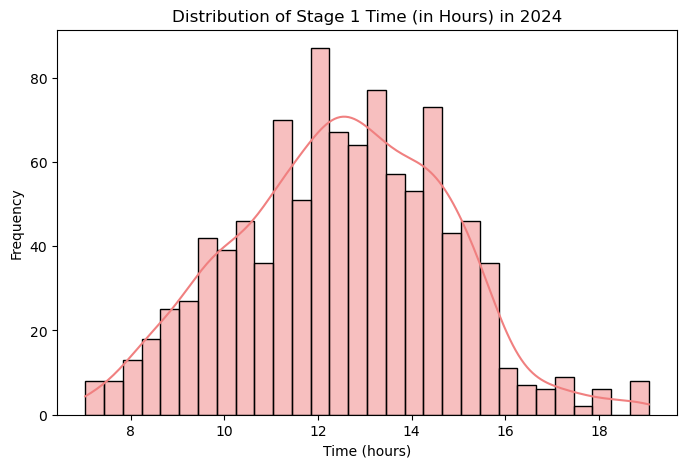

********************************************************************************
Processing column: Time Spent in Valgrisenche
count                          970
mean     0 days 01:27:33.135051546
std      0 days 01:01:54.282218361
min                0 days 00:00:37
25%         0 days 00:43:36.250000
50%                0 days 01:10:39
75%         0 days 01:56:22.750000
max                0 days 07:08:27
Name: Time Spent in Valgrisenche, dtype: object


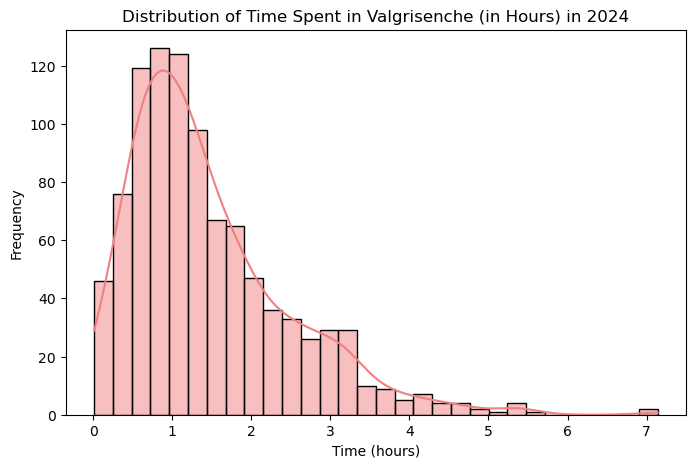

********************************************************************************
Processing column: Stage 2 Time
count                          817
mean     0 days 18:26:04.940024479
std      0 days 02:55:02.205204360
min                0 days 09:39:02
25%                0 days 16:25:18
50%                0 days 18:34:05
75%                0 days 20:31:14
max                1 days 01:48:08
Name: Stage 2 Time, dtype: object


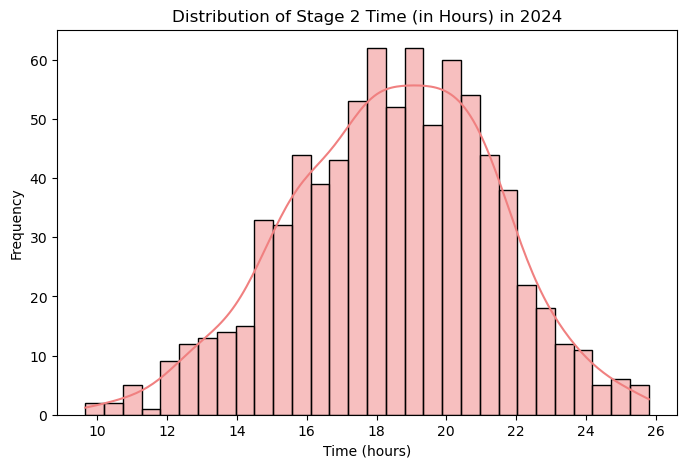

********************************************************************************
Processing column: Time Spent in Cogne
count                          756
mean     0 days 02:43:06.449735449
std      0 days 01:35:54.006579593
min              -1 days +23:59:29
25%         0 days 01:30:23.500000
50%         0 days 02:38:09.500000
75%         0 days 03:43:21.750000
max                0 days 13:23:24
Name: Time Spent in Cogne, dtype: object


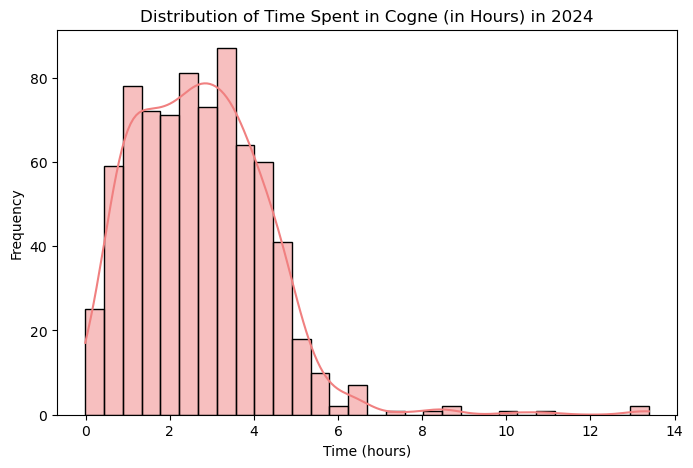

********************************************************************************
Processing column: Stage 3 Time
count                          728
mean     0 days 12:36:27.416208791
std      0 days 01:59:04.850777392
min                0 days 07:06:23
25%         0 days 11:25:33.500000
50%         0 days 12:46:25.500000
75%                0 days 13:56:26
max                0 days 20:04:17
Name: Stage 3 Time, dtype: object


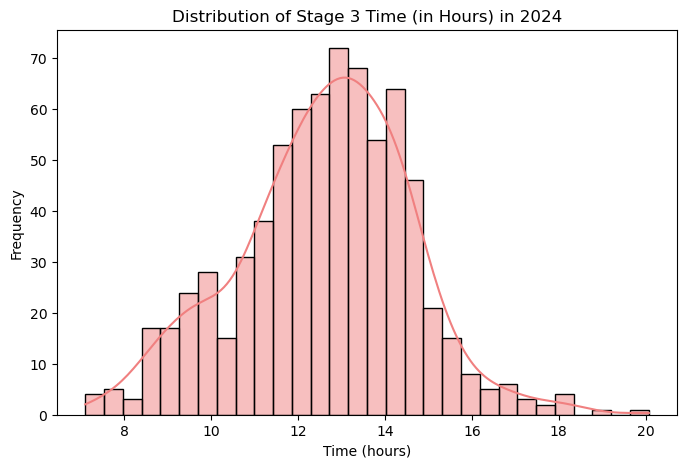

********************************************************************************
Processing column: Time Spent in Donnas
count                          782
mean     0 days 02:52:12.177749360
std      0 days 01:22:55.808115257
min                0 days 00:00:22
25%                0 days 01:50:15
50%                0 days 02:44:56
75%         0 days 03:44:14.750000
max                0 days 11:33:53
Name: Time Spent in Donnas, dtype: object


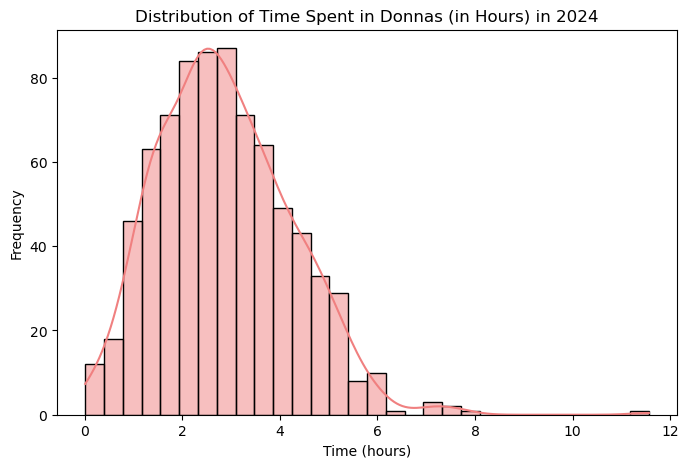

********************************************************************************
Processing column: Stage 4 Time
count                          659
mean     0 days 23:18:29.626707132
std      0 days 03:28:00.151580343
min                0 days 11:32:44
25%         0 days 20:58:13.500000
50%                0 days 23:44:14
75%                1 days 01:40:47
max                1 days 08:09:44
Name: Stage 4 Time, dtype: object


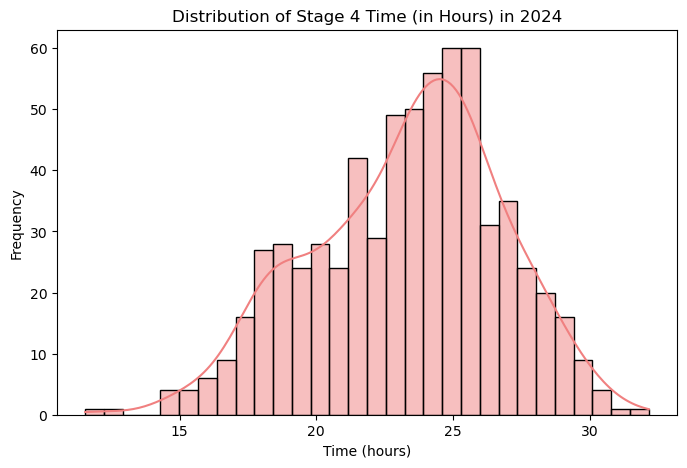

********************************************************************************
Processing column: Time Spent in Gressoney
count                          663
mean     0 days 03:12:19.707390648
std      0 days 01:25:14.619182847
min                0 days 00:01:42
25%         0 days 02:16:47.500000
50%                0 days 03:08:45
75%                0 days 04:07:25
max                0 days 10:05:30
Name: Time Spent in Gressoney, dtype: object


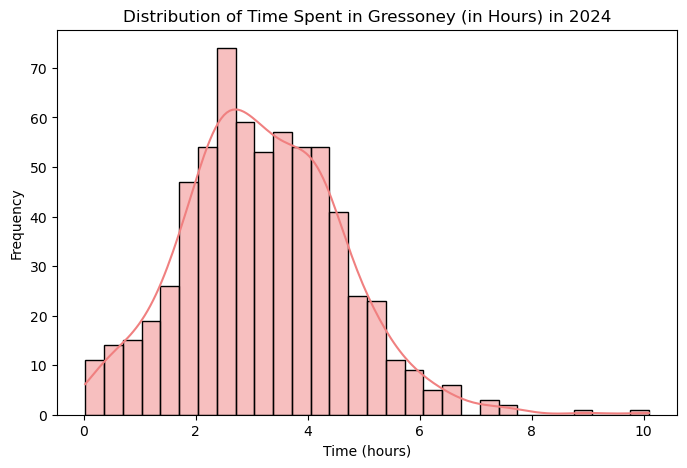

********************************************************************************
Processing column: Stage 5 Time
count                          616
mean     0 days 12:54:09.871753246
std      0 days 02:18:22.880605119
min                0 days 06:34:18
25%                0 days 11:10:17
50%         0 days 12:57:06.500000
75%         0 days 14:37:35.250000
max                0 days 20:02:12
Name: Stage 5 Time, dtype: object


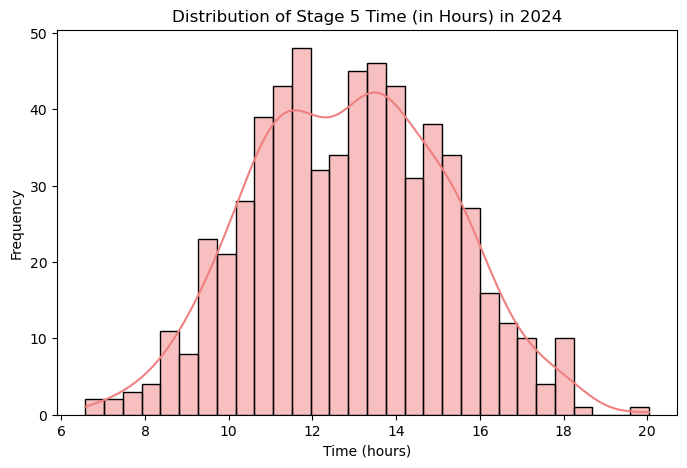

********************************************************************************
Processing column: Time Spent in Valtournenche
count                          613
mean     0 days 02:52:52.169657422
std      0 days 01:38:34.064758514
min              -1 days +23:49:09
25%                0 days 01:41:50
50%                0 days 02:49:09
75%                0 days 03:43:28
max                0 days 11:44:26
Name: Time Spent in Valtournenche, dtype: object


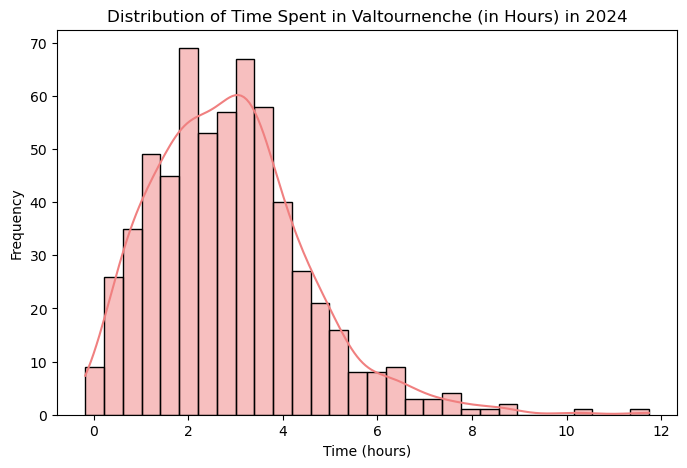

********************************************************************************
Processing column: Stage 6 Time
count                          548
mean     0 days 20:22:28.361313868
std      0 days 02:50:49.863281601
min                0 days 11:20:03
25%         0 days 18:36:51.250000
50%                0 days 20:29:23
75%         0 days 22:15:27.500000
max                1 days 05:06:09
Name: Stage 6 Time, dtype: object


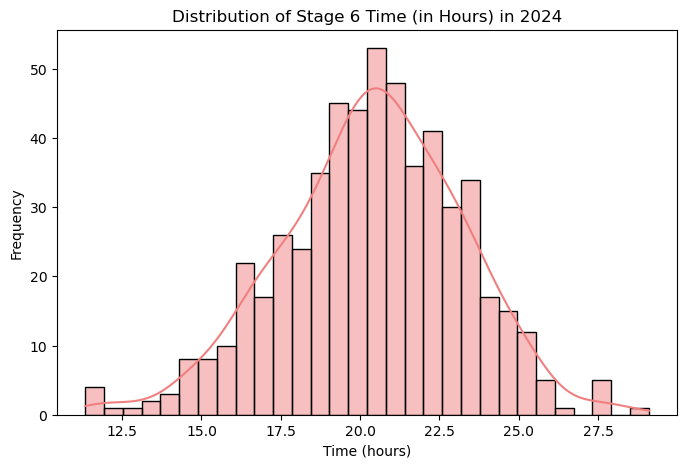

********************************************************************************
Processing column: Time Spent in Ollomont
count                          525
mean     0 days 02:36:02.245714285
std      0 days 01:29:37.876753919
min                0 days 00:00:21
25%                0 days 01:37:07
50%                0 days 02:26:50
75%                0 days 03:17:49
max                0 days 10:45:24
Name: Time Spent in Ollomont, dtype: object


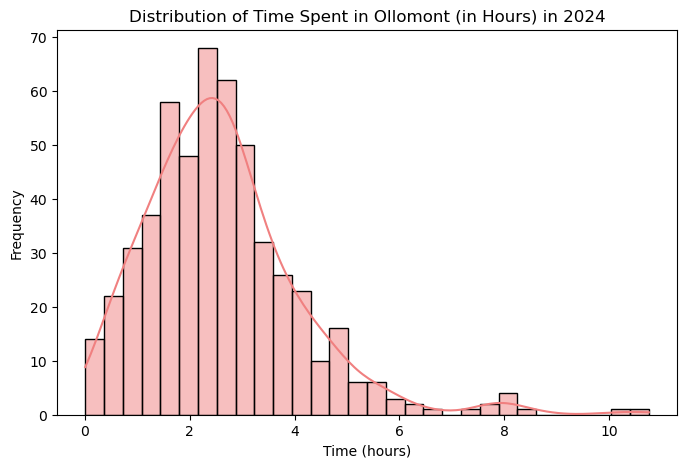

********************************************************************************
Processing column: Stage 7 Time
count                          509
mean     0 days 18:13:23.047151277
std      0 days 03:32:23.473737075
min                0 days 08:35:58
25%                0 days 15:37:29
50%                0 days 18:23:05
75%                0 days 20:44:41
max                1 days 09:25:17
Name: Stage 7 Time, dtype: object


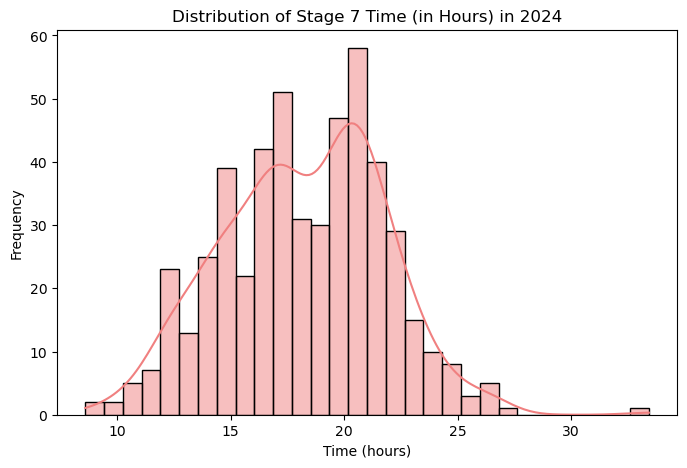

********************************************************************************
Processing column: Duration
count                          533
mean     5 days 10:53:50.005628517
std      0 days 17:18:09.411316227
min                2 days 21:08:32
25%                5 days 02:27:41
50%                5 days 13:18:29
75%                6 days 02:05:30
max                6 days 08:14:00
Name: Duration, dtype: object


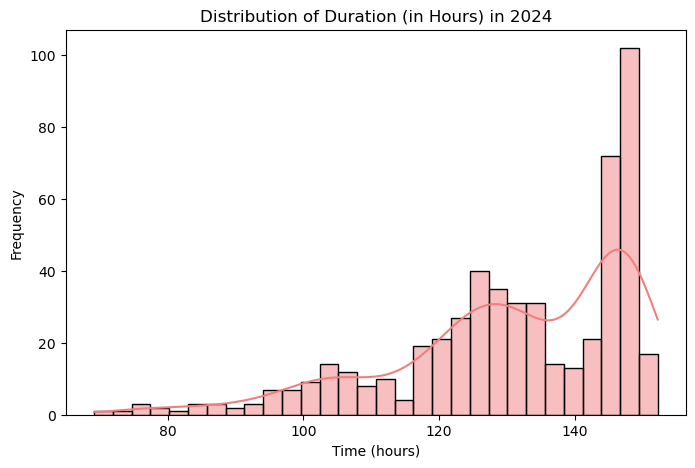

********************************************************************************


In [76]:
# Define the columns to process
time_columns = ['Stage 1 Time', 'Time Spent in Valgrisenche', 
                'Stage 2 Time', 'Time Spent in Cogne',
                'Stage 3 Time', 'Time Spent in Donnas',
                'Stage 4 Time', 'Time Spent in Gressoney',
                'Stage 5 Time', 'Time Spent in Valtournenche',
                'Stage 6 Time', 'Time Spent in Ollomont',
                'Stage 7 Time', 'Duration']

# Loop through the columns
for column in time_columns:
    print(f"Processing column: {column}")
    print(tableau_pivoted_TOR330_dates[column].describe())
    
    
    
    
    # Convert to timedelta and get total hours (handling NaT)
    tableau_pivoted_TOR330_dates[f'{column}_hours'] = pd.to_timedelta(
        tableau_pivoted_TOR330_dates[f'{column}'], errors='coerce'
    ).dt.total_seconds() / 3600  # Convert seconds to hours

    # Drop NaN values for histogram visualization
    data_to_plot = tableau_pivoted_TOR330_dates[f'{column}_hours'].dropna()

    # Plot the histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data_to_plot, kde=True, bins=30, color="lightcoral")
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f"Distribution of {column} (in Hours) in {year}")
    plt.xlabel("Time (hours)")
    plt.ylabel("Frequency")
    plt.show()
    
    print('*'*80)


### Sub-Finish Category

I labelled the Finisher's Sub-130 Finish times
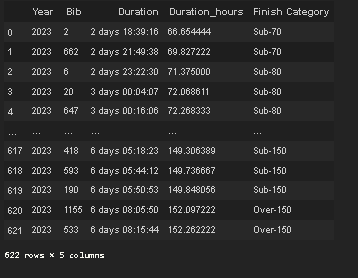

In [77]:
# Convert to timedelta and get total hours (handling NaT)
pivoted_TOR330_dates['Duration_hours'] = pd.to_timedelta(
    pivoted_TOR330_dates['Duration'], errors='coerce').dt.total_seconds() / 3600  # Convert seconds to hours
# Create a new column 'Finish Category'
def categorize_duration(hours):
    if pd.isna(hours):
        return 'DNF'  # Handle NaT values
    elif hours < 50:
        return 'Sub-50'
    elif hours <= 150:
        return f'Sub-{int(hours // 10) * 10 + 10}'  # Round to nearest 10 up to 150
    else:
        return 'Over-150'

pivoted_TOR330_dates['Finish Category'] = pivoted_TOR330_dates['Duration_hours'].apply(categorize_duration)


# Define the desired order of categories
category_order = [
    'Sub-50','Sub-60',
    'Sub-70','Sub-80','Sub-90', 'Sub-100', 'Sub-110', 'Sub-120',
    'Sub-130', 'Sub-140', 'Sub-150', 'Over-150', 'DNF'
]

# Set 'Finish Category' as a categorical column with the defined order
pivoted_TOR330_dates['Finish Category'] = pd.Categorical(
    pivoted_TOR330_dates['Finish Category'],
    categories=category_order,
    ordered=True
)


# Display the DataFrame
pivoted_TOR330_dates[['Year','Bib', 'Duration', 'Duration_hours', 'Finish Category']]

    

Year   Bib        Duration  Duration_hours Finish Category
9     2024    10 2 days 21:08:32       69.142222          Sub-70
22    2024    25 3 days 01:10:18       73.171667          Sub-80
6     2024     7 3 days 03:35:59       75.599722          Sub-80
18    2024    20 3 days 04:43:09       76.719167          Sub-80
13    2024    15 3 days 04:49:20       76.822222          Sub-80
...    ...   ...             ...             ...             ...
1088  2024  1568             NaT             NaN             DNF
1089  2024  1569             NaT             NaN             DNF
1090  2024  1570             NaT             NaN             DNF
1092  2024  1573             NaT             NaN             DNF
1094  2024  1575             NaT             NaN             DNF

[1095 rows x 5 columns]

In [78]:
pivoted_TOR330_dates.groupby(['Finish Category'])['Finish Category'].count()

Finish Category
Sub-50        0
Sub-60        0
Sub-70        1
Sub-80        6
Sub-90        8
Sub-100      21
Sub-110      38
Sub-120      44
Sub-130     113
Sub-140      85
Sub-150     212
Over-150      5
DNF         562
Name: Finish Category, dtype: int64

In [79]:

stages = [
    'Stage 1 Time', 'Time Spent in Valgrisenche',
    'Stage 2 Time', 'Time Spent in Cogne',
    'Stage 3 Time', 'Time Spent in Donnas',
    'Stage 4 Time', 'Time Spent in Gressoney',
    'Stage 5 Time', 'Time Spent in Valtournenche',
    'Stage 6 Time', 'Time Spent in Ollomont',
    'Stage 7 Time'
]


# Group by 'Finish Category' and calculate the mean for specified columns
result = (
    pivoted_TOR330_dates.groupby(['Year', 'Finish Category'])[stages].mean()
    
).reset_index(drop = False)

# Add a 'Total' column with the sum of all time columns
# result['Total'] = result.sum(axis=1)
# # Convert to timedelta and get total hours (handling NaT)
# result['Total'] = pd.to_timedelta(
#     result['Total'], errors='coerce').dt.total_seconds() / 3600  # Convert seconds to hours
# # Create a new column 'Finish Category'

for column in stages:
    # Convert the column to timedelta and strip milliseconds
    result[f'{column}'] = pd.to_timedelta(result[f'{column}']).dt.floor('s')


result.sort_values(by='Finish Category', ascending=True)


# Display the final table
# result[(result['Finish Category'] == 'Sub-130') |
#       (result['Finish Category'] == 'Sub-150')]

Year Finish Category    Stage 1 Time Time Spent in Valgrisenche  \
0   2024          Sub-50             NaT                        NaT   
1   2024          Sub-60             NaT                        NaT   
2   2024          Sub-70 0 days 07:04:36            0 days 00:00:37   
3   2024          Sub-80 0 days 07:23:50            0 days 00:02:43   
4   2024          Sub-90 0 days 08:14:59            0 days 00:09:37   
5   2024         Sub-100 0 days 08:48:03            0 days 00:18:38   
6   2024         Sub-110 0 days 09:25:25            0 days 00:40:54   
7   2024         Sub-120 0 days 10:16:44            0 days 00:48:53   
8   2024         Sub-130 0 days 11:08:34            0 days 01:04:19   
9   2024         Sub-140 0 days 11:49:35            0 days 01:23:08   
10  2024         Sub-150 0 days 13:13:36            0 days 01:41:09   
11  2024        Over-150 0 days 14:33:46            0 days 01:01:18   
12  2024             DNF 0 days 13:17:52            0 days 01:40:38   

      Stage 2 Time Time Spent in Cogne    Stage 3 Time Time Spent in Donnas  \
0              NaT                 NaT             NaT                  NaT   
1              NaT                 NaT             NaT                  NaT   
2  0 days 09:39:02     0 days 00:01:15 0 days 07:50:20      0 days 00:00:41   
3  0 days 10:12:38     0 days 00:17:03 0 days 07:37:50      0 days 00:07:30   
4  0 days 12:09:30     0 days 00:41:18 0 days 08:22:50      0 days 00:50:01   
5  0 days 13:31:53     0 days 00:51:38 0 days 09:07:15      0 days 01:22:48   
6  0 days 14:07:08     0 days 01:11:37 0 days 09:31:23      0 days 02:49:32   
7  0 days 15:55:21     0 days 01:52:43 0 days 11:03:13      0 days 02:35:18   
8  0 days 16:52:41     0 days 02:15:24 0 days 12:09:32      0 days 02:52:41   
9  0 days 17:51:37     0 days 02:50:37 0 days 12:41:39      0 days 02:42:32   
10 0 days 19:49:55     0 days 03:26:50 0 days 13:13:28      0 days 02:57:24   
11 0 days 21:00:25     0 days 02:09:23 0 days 14:15:03      0 days 02:16:27   
12 0 days 19:34:45     0 days 02:53:12 0 days 13:26:16      0 days 03:10:32   

      Stage 4 Time Time Spent in Gressoney    Stage 5 Time  \
0              NaT                     NaT             NaT   
1              NaT                     NaT             NaT   
2  0 days 12:38:48         0 days 01:52:28 0 days 07:36:52   
3  0 days 15:01:51         0 days 01:10:21 0 days 07:29:20   
4  0 days 16:57:55         0 days 00:46:31 0 days 08:33:02   
5  0 days 17:59:42         0 days 01:12:43 0 days 09:56:21   
6  0 days 18:17:27         0 days 02:35:35 0 days 11:06:35   
7  0 days 19:19:26         0 days 03:41:15 0 days 10:52:21   
8  0 days 21:53:17         0 days 03:26:37 0 days 11:18:50   
9  0 days 23:55:08         0 days 03:19:01 0 days 12:50:54   
10 1 days 01:27:16         0 days 03:27:38 0 days 14:32:53   
11 1 days 02:26:49         0 days 03:53:16 0 days 15:12:56   
12 1 days 00:55:18         0 days 03:03:55 0 days 14:18:21   

   Time Spent in Valtournenche    Stage 6 Time Time Spent in Ollomont  \
0                          NaT             NaT                    NaT   
1                          NaT             NaT                    NaT   
2              0 days 00:10:07 0 days 11:20:03        0 days 00:18:18   
3              0 days 00:17:29 0 days 13:33:13        0 days 00:38:49   
4              0 days 00:36:19 0 days 15:54:26        0 days 00:34:34   
5              0 days 01:33:49 0 days 16:26:04        0 days 01:51:45   
6              0 days 01:33:31 0 days 18:20:03        0 days 02:12:39   
7              0 days 02:04:01 0 days 19:30:02        0 days 02:02:54   
8              0 days 03:25:54 0 days 19:01:09        0 days 03:04:20   
9              0 days 03:37:28 0 days 20:03:39        0 days 03:38:30   
10             0 days 03:00:57 0 days 22:22:43        0 days 02:22:24   
11             0 days 01:50:00 0 days 22:50:24        0 days 01:57:08   
12             0 days 02:53:26 0 days 21:37:46        0 days 02:26:30   

      Stag

In [80]:
pivoted_TOR330_dates[[
    'Name', 'Bib', # 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status', 'Status1', 'Wave', 'Duration', 'Retired','Retired_Stage', 
    'Stage 1 Time', 'Time Spent in Valgrisenche', 
    'Stage 2 Time', 'Time Spent in Cogne',
    'Stage 3 Time', 'Time Spent in Donnas',
    'Stage 4 Time', 'Time Spent in Gressoney',
    'Stage 5 Time', 'Time Spent in Valtournenche',
    'Stage 6 Time', 'Time Spent in Ollomont',
    'Stage 7 Time', 'Duration','Duration_hours', 'Finish Category'
]]

Name   Bib    Stage 1 Time Time Spent in Valgrisenche  \
9       D Haene Francois    10 0 days 07:04:36            0 days 00:00:37   
22     Marmissolle Benat    25 0 days 07:03:40            0 days 00:00:52   
6         Perrier Martin     7 0 days 07:20:07            0 days 00:00:41   
18         Macchi Andrea    20 0 days 07:27:10                        NaT   
13           Hall Damian    15 0 days 07:06:05            0 days 00:06:38   
...                  ...   ...             ...                        ...   
1088        Baik Myungki  1568 0 days 15:59:09            0 days 04:40:03   
1089            Kim Juae  1569             NaT                        NaT   
1090       Choi Changhyu  1570 0 days 17:00:37            0 days 02:00:31   
1092  Zhang Zhang Wenjun  1573 0 days 14:33:37            0 days 00:36:24   
1094     Calgaro Gaetano  1575 0 days 12:44:07            0 days 00:49:43   

        Stage 2 Time Time Spent in Cogne    Stage 3 Time Time Spent in Donnas  \
9    0 days 09:39:02     0 days 00:01:15 0 days 07:50:20      0 days 00:00:41   
22   0 days 09:39:39     0 days 00:01:14 0 days 07:27:00      0 days 00:00:47   
6                NaT                 NaT 0 days 07:15:47      0 days 00:00:34   
18               NaT     0 days 00:03:03 0 days 07:57:59      0 days 00:00:22   
13   0 days 10:45:38     0 days 00:30:02 0 days 07:47:42      0 days 00:15:54   
...              ...                 ...             ...                  ...   
1088             NaT                 NaT             NaT                  NaT   
1089             NaT                 NaT             NaT                  NaT   
1090             NaT                 NaT             NaT                  NaT   
1092 1 days 00:53:37     0 days 01:00:15 0 days 14:05:20      0 days 02:29:46   
1094 0 days 19:31:59     0 days 04:03:48 0 days 15:34:52      0 days 03:13:05   

        Stage 4 Time Time Spent in Gressoney    Stage 5 Time  \
9    0 days 12:38:48         0 days 01:52:28 0 days 07:36:52   
22   0 days 18:17:42         0 days 00:08:20 0 days 06:34:18   
6    0 days 15:05:50         0 days 05:21:12 0 days 06:51:17   
18   0 days 14:33:03         0 days 00:10:58 0 days 08:28:19   
13   0 days 15:08:54         0 days 00:15:04 0 days 07:29:44   
...              ...                     ...             ...   
1088             NaT                     NaT             NaT   
1089             NaT                     NaT             NaT   
1090             NaT                     NaT             NaT   
1092             NaT                     NaT             NaT   
1094 1 days 03:40:43         0 days 02:14:03 0 days 17:02:45   

     Time Spent in Valtournenche    Stage 6 Time Time Spent in Ollomont  \
9                0 days 00:10:07 0 days 11:20:03        0 days 00:18:18   
22               0 days 00:08:43 0 days 11:40:28        0 days 00:18:16   
6                0 days 00:00:05 0 days 11:50:13        0 days 00:08:35   
18               0 days 00:00:06 0 days 14:59:56        0 days 00:08:47   
13               0 days 00:04:14 0 days 14:34:16        0 days 00:25:23   
...                          ...             ...                    ...   
1088                         NaT             NaT                    NaT   
1089                         NaT             NaT                    NaT   
1090                         NaT             NaT                    NaT   
1092                         NaT             NaT                    NaT   
1094             0 days 02:10:17             NaT                    NaT   

        Stage 7 Time        Duration  Duration_hours Finish Category  
9    0 days 10:35:25 2 days 21:08:32       69.142222          Sub-70  
22   0 days 11:49:19 3 days 01:10:18       73.171667          Sub-80  
6    0 days 11:33:14 3 days 03:35:59       75.599722          Sub-80  
18   0 days 11:51:25 3 days 04:43:09       76.719167          Sub-80  
13   0 days 12:19:46 3 days 04:49:20       76.822222          Sub-80  
...              ...      

In [81]:
# Filter rows for 'Sub-130' finish category
sub_130_df = pivoted_TOR330_dates[pivoted_TOR330_dates['Finish Category'] == 'Sub-130']

# Group by 'Year' and 'Finish Category', then calculate descriptive statistics for the specified columns
result = (
    sub_130_df.groupby(['Year', 'Finish Category'])[stages]
    .describe()  # Get descriptive statistics
    .stack()  # Reshape for easier manipulation
    .unstack(0)  # Bring 'Year' to columns
    .reset_index()  # Flatten the index
)


# Ensure all time columns are converted to timedelta, strip milliseconds
for column in stages:
    sub_130_df[column] = pd.to_timedelta(sub_130_df[column], errors='coerce').dt.floor('s')

result



C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\88173512.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_130_df[column] = pd.to_timedelta(sub_130_df[column], errors='coerce').dt.floor('s')


Finish Category level_1               Stage 1 Time  \
Year                                               2024   
0            Sub-130   count                        112   
1            Sub-130    mean  0 days 11:08:34.205357142   
2            Sub-130     std  0 days 01:10:39.828366699   
3            Sub-130     min            0 days 08:50:02   
4            Sub-130     25%            0 days 10:18:01   
5            Sub-130     50%            0 days 11:02:51   
6            Sub-130     75%            0 days 11:54:15   
7            Sub-130     max            0 days 15:28:56   

     Time Spent in Valgrisenche               Stage 2 Time  \
Year                       2024                       2024   
0                           109                        106   
1     0 days 01:04:19.990825688  0 days 16:52:41.490566037   
2     0 days 00:40:44.265816056  0 days 01:19:58.710757902   
3               0 days 00:16:30            0 days 13:55:24   
4               0 days 00:37:28     0 days 15:55:55.500000   
5               0 days 00:53:52            0 days 16:41:26   
6               0 days 01:14:15     0 days 17:35:07.750000   
7               0 days 03:43:23            0 days 20:50:41   

            Time Spent in Cogne               Stage 3 Time  \
Year                       2024                       2024   
0                            96                         99   
1     0 days 02:15:24.854166666  0 days 12:09:32.828282828   
2     0 days 01:11:15.157668940  0 days 01:17:00.175367818   
3               0 days 00:28:50            0 days 09:15:08   
4        0 days 01:15:12.500000            0 days 11:14:20   
5        0 days 02:11:44.500000            0 days 12:02:35   
6               0 days 02:50:33            0 days 13:02:01   
7               0 days 05:38:34            0 days 15:26:22   

           Time Spent in Donnas               Stage 4 Time  \
Year                       2024                       2024   
0                           112                        112   
1     0 days 02:52:41.910714285  0 days 21:53:17.741071428   
2     0 days 01:20:52.576738287  0 days 01:52:40.386172595   
3               0 days 00:46:21            0 days 17:12:46   
4        0 days 01:44:29.750000            0 days 20:43:19   
5               0 days 02:40:41     0 days 21:59:06.500000   
6        0 days 03:51:55.750000     0 days 23:06:51.750000   
7               0 days 07:00:44            1 days 02:46:27   

        Time Spent in Gressoney               Stage 5 Time  \
Year                       2024                       2024   
0                           113                        113   
1     0 days 03:26:37.548672566  0 days 11:18:50.946902654   
2     0 days 01:21:34.641258908  0 days 01:24:17.086297324   
3               0 days 00:34:07            0 days 08:48:14   
4               0 days 02:32:33            0 days 10:30:45   
5               0 days 03:29:28            0 days 10:58:43   
6               0 days 04:06:31            0 days 11:58:26   
7               0 days 07:42:03            0 days 17:33:03   

     Time Spent in Valtournenche               Stage 6 Time  \
Year                        2024                       2024   
0                            113                        112   
1      0 days 03:25:54.398230088  0 days 19:01:09.455357142   
2      0 days 02:08:38.614217475  0 days 02:15:31.211403036   
3              -1 days +23:49:09            0 days 14:50:22   
4                0 days 02:03:20     0 days 17:17:36.750000   
5                0 days 03:15:57     0 days 18:55:20.500000   
6                0 days 04:32:49     0 days 20:18:27.250000   
7                0 days 11:44:26            1 days 03:51:10   

         Time Spent in Ollomont               Stage 7 Time  
Year                       2024                       2024  
0                           106                        107  
1     0 days 03:04:20.877358490  0 days 17:14:34.112149532  
2     0 days 01:40:58.372572144  0 days 02:47:52.051136

### Time Travel Issues
While playing with min/max/ mean for the time spent on each stage, I spotted a negative number for Stage 3 TIme.

This means that the individual was scanned 'Donnas IN' prior to 'Cogne OUT'
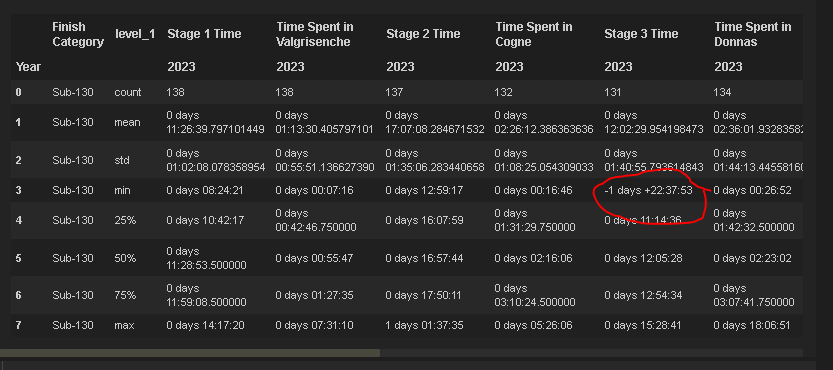

So I pulled the individual out to examine in more detail.

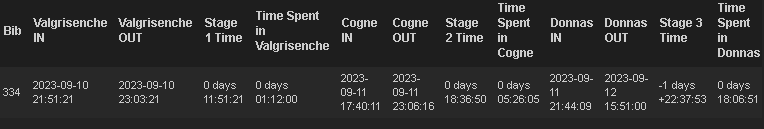

Looking at the raw data, it looks like it would make sense Bib# 334 to have been scanned 'DOnnas OUT' on the way in and 'Donnas IN' on the way out

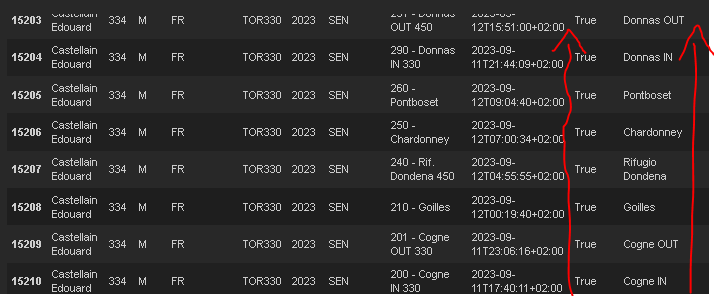

Code was written to detect more time travelling
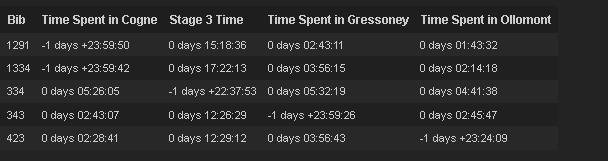


In [82]:
pivoted_TOR330_dates[[ 'Bib',  'Valgrisenche IN', 'Valgrisenche OUT', 'Stage 1 Time','Time Spent in Valgrisenche',  'Cogne IN', 'Cogne OUT', 'Stage 2 Time','Time Spent in Cogne', 'Donnas IN', 'Donnas OUT', 'Stage 3 Time', 'Time Spent in Donnas', 'Gressoney IN','Gressoney OUT', 'Stage 4 Time', 'Time Spent in Gressoney']][pivoted_TOR330_dates['Stage 3 Time'] == pd.to_timedelta('-1 days +22:37:53')]

Empty DataFrame
Columns: [Bib, Valgrisenche IN, Valgrisenche OUT, Stage 1 Time, Time Spent in Valgrisenche, Cogne IN, Cogne OUT, Stage 2 Time, Time Spent in Cogne, Donnas IN, Donnas OUT, Stage 3 Time, Time Spent in Donnas, Gressoney IN, Gressoney OUT, Stage 4 Time, Time Spent in Gressoney]
Index: []

In [83]:
bib334_places = ['Valgrisenche IN', 'Valgrisenche OUT'
                      'Cogne IN', 'Cogne OUT', 
                      'Donnas IN', 'Donnas OUT', 
                      'Gressoney IN','Gressoney OUT']

TOR330[(TOR330['Bib'] == 334) 
#       &(TOR330['aid_stations']).isin(bib334_places)
      ]

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2024 28706  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28707  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28708  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28709  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28710  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28711  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28712  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28713  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28714  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28715  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28716  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28717  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28718  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28719  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28720  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28721  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28722  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28723  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28724  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28725  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28726  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28727  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28728  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28729  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28730  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28731  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28732  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28733  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28734  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28735  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28736  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28737  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28738  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28739  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28740  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28741  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28742  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28743  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28744  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28745  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28746  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28747  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28748  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28749  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28750  Pilzer Mattia  334   M          IT  TOR330  2024       V1   
            28751  Pilzer Mattia  334   M          IT  TOR330  2024       V1   

                                             Place                       Time  \
TOR330_2024 28706            580 - Ollomont IN 330  2024-09-13T14:14:45+02:00   
            28707            570 - Berio Damon 330  2024-09-13T13:02:20+02:00   
            28708       

In [84]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Stage 3 Time'] == pd.to_timedelta('-1 days +22:37:53')]

Empty DataFrame
Columns: [Name, Bib, Sex, Nationality, Year, Race, Category, Status, Status1, Wave, Duration, Retired, Retired_Stage, new_Start Date, Baite Youlaz, La Thuile, Rifugio Deffeyes, Planaval, Valgrisenche IN, Valgrisenche OUT, Chalet Epee, Rhemes-Notre-Dame, Eaux Rousse, Rifugio Sella, Cogne IN, Cogne OUT, Goilles, Rifugio Dondena, Chardonney, Pontboset, Donnas IN, Donnas OUT, Perloz, Sassa, Rifugio Coda, Rifugio della Barma, Lago Chiaro, Col della Vecchia, Niel La Gruba, Loo, Gressoney IN, Gressoney OUT, Rifugio Alpenzu, Champoluc, Rifugio Grand Tournalin, Valtournenche IN, Valtournenche OUT, Rifugio Barmasse, Vareton, Rifugio Magià, Rifugio Cuney, Bivacco R. Clermont, Oyace, Bruson Arp, Ollomont IN, Ollomont OUT, Rifugio Champillon, Ponteille Desot, Bosses, Rifugio Frassati, Pas Entre Deux Sauts, Monte de la Saxe, FINISH, Stage 1 Time, Time Spent in Valgrisenche, Stage 2 Time, Time Spent in Cogne, Stage 3 Time, Time Spent in Donnas, Stage 4 Time, Time Spent in Gressoney, Stage 5 Time, Time Spent in Valtournenche, Stage 6 Time, Time Spent in Ollomont, Stage 7 Time, Duration_hours, Finish Category]
Index: []

[0 rows x 78 columns]

In [85]:
time_travel_issue = []

# Iterate through each stage
for stage in stages:
    # Find rows with negative time values in the current stage
    negative = pivoted_TOR330_dates[pivoted_TOR330_dates[stage] < pd.to_timedelta('00:00:00')]
    
    # Append the DataFrame with issues to the list if not empty
    if not negative.empty:
        time_travel_issue.append(negative)
        print('*'*20,'\n', pivoted_TOR330_dates[['Bib', stage]][pivoted_TOR330_dates[stage] < pd.to_timedelta('00:00:00')])

# Combine all detected issues into a single DataFrame
time_travel_issues_df = pd.concat(time_travel_issue).reset_index(drop=True)

# Save the result to a file (optional)
time_travel_issues_df.to_csv('time_travel_issues.csv', index=False)

# Display the resulting DataFrame
time_travel_issues_df


******************** 
       Bib Time Spent in Cogne
918  1367   -1 days +23:59:29
******************** 
      Bib Time Spent in Valtournenche
372  404           -1 days +23:49:09


Name   Bib Sex Nationality  Year    Race Category  Status  \
0  Delesalle Ludovic  1367   M          FR  2024  TOR330       V2   False   
1       Fuzzi Andrea   404   M          IT  2024  TOR330       V1    True   

    Status1   Wave  ... Time Spent in Donnas    Stage 4 Time  \
0       DNF  Wave2  ...                  NaT             NaT   
1  Finished  Wave1  ...      0 days 04:55:28 0 days 19:08:36   

  Time Spent in Gressoney    Stage 5 Time Time Spent in Valtournenche  \
0                     NaT             NaT                         NaT   
1         0 days 07:20:48 0 days 10:35:15           -1 days +23:49:09   

     Stage 6 Time Time Spent in Ollomont    Stage 7 Time Duration_hours  \
0             NaT                    NaT             NaT            NaN   
1 1 days 00:00:47        0 days 08:08:56 0 days 16:54:56     129.739167   

  Finish Category  
0             DNF  
1         Sub-130  

[2 rows x 78 columns]

In [86]:
time_travel_issues_df[['Bib', 'Duration',
                      'Time Spent in Cogne',
                      'Stage 3 Time',
                       'Time Spent in Gressoney',
                       'Time Spent in Ollomont',
                      ]]

Bib        Duration Time Spent in Cogne    Stage 3 Time  \
0  1367             NaT   -1 days +23:59:29             NaT   
1   404 5 days 09:44:21     0 days 02:15:28 0 days 11:05:55   

  Time Spent in Gressoney Time Spent in Ollomont  
0                     NaT                    NaT  
1         0 days 07:20:48        0 days 08:08:56

In [87]:
time_travel_issues_df[['Bib', 'Duration',
                       'Valgrisenche IN','Valgrisenche OUT',
                       'Chalet Epee','Rhemes-Notre-Dame',  'Eaux Rousse', 'Stage 2 Time',
                       'Cogne IN','Cogne OUT',
                       'Goilles',
                       'Time Spent in Cogne',
                      'Stage 3 Time']][(time_travel_issues_df['Bib'] == 1291) |
                                      (time_travel_issues_df['Bib'] == 1334)]

Empty DataFrame
Columns: [Bib, Duration, Valgrisenche IN, Valgrisenche OUT, Chalet Epee, Rhemes-Notre-Dame, Eaux Rousse, Stage 2 Time, Cogne IN, Cogne OUT, Goilles, Time Spent in Cogne, Stage 3 Time]
Index: []

In [88]:
time_travel_issues_df[['Bib', 'Duration',
                       'Valgrisenche IN', 'Valgrisenche OUT', 
                      'Cogne IN', 'Cogne OUT', 
                      'Donnas IN', 'Donnas OUT', 
                       'Stage 3 Time', 'Time Spent in Donnas', 'Perloz', 'Sassa', 
                      'Gressoney IN','Gressoney OUT', 
                      
                      ]][(time_travel_issues_df['Bib'] == 334)]

Empty DataFrame
Columns: [Bib, Duration, Valgrisenche IN, Valgrisenche OUT, Cogne IN, Cogne OUT, Donnas IN, Donnas OUT, Stage 3 Time, Time Spent in Donnas, Perloz, Sassa, Gressoney IN, Gressoney OUT]
Index: []

In [89]:
time_travel_issues_df[['Bib', 'Duration',
                       'Niel La Gruba',
                       'Gressoney IN','Gressoney OUT','Stage 4 Time',
                       'Time Spent in Gressoney',
                       'Rifugio Alpenzu', 
                       'Valtournenche IN', 'Stage 5 Time']][time_travel_issues_df['Bib'] == 343]

Empty DataFrame
Columns: [Bib, Duration, Niel La Gruba, Gressoney IN, Gressoney OUT, Stage 4 Time, Time Spent in Gressoney, Rifugio Alpenzu, Valtournenche IN, Stage 5 Time]
Index: []

# Demographic data

In [90]:
TOR330_dem = pivoted_TOR330_dates.copy()

TOR330_dem['Duration_seconds'] = pd.to_timedelta(
    TOR330_dem['Duration'], errors='coerce'
).dt.total_seconds()

TOR330_dem = TOR330_dem[[ 'Year', 'Race', 'Name', 'Bib', 'Sex', 'Nationality',  'Category',
       'Status', 'Status1', 'Wave', 'Duration_seconds', 'Retired', 'Retired_Stage','Finish Category'  ]]

TOR330_dem.to_excel(f'{race} Data/5. Clean Data for Data Visualisation/{race}_{year}_dem.xlsx', index = False)

TOR330_dem

Year    Race                Name   Bib Sex Nationality Category  Status  \
9     2024  TOR330    D Haene Francois    10   M          FR      SEN    True   
22    2024  TOR330   Marmissolle Benat    25   M          FR       V1    True   
6     2024  TOR330      Perrier Martin     7   M          CH      SEN    True   
18    2024  TOR330       Macchi Andrea    20   M          IT      SEN    True   
13    2024  TOR330         Hall Damian    15   M          GB       V1    True   
...    ...     ...                 ...   ...  ..         ...      ...     ...   
1088  2024  TOR330        Baik Myungki  1568   M          KR       V1   False   
1089  2024  TOR330            Kim Juae  1569   F          KR      SEN   False   
1090  2024  TOR330       Choi Changhyu  1570   M          KR       V2   False   
1092  2024  TOR330  Zhang Zhang Wenjun  1573   M          CN       V1   False   
1094  2024  TOR330     Calgaro Gaetano  1575   M          IT       V2   False   

       Status1   Wave  Duration_seconds            Retired Retired_Stage  \
9     Finished  Wave1          248912.0                NaN           NaN   
22    Finished  Wave1          263418.0                NaN           NaN   
6     Finished  Wave1          272159.0                NaN           NaN   
18    Finished  Wave1          276189.0                NaN           NaN   
13    Finished  Wave1          276560.0                NaN           NaN   
...        ...    ...               ...                ...           ...   
1088       DNF  Wave2               NaN  Rhemes-Notre-Dame       Stage 2   
1089       DNF  Wave2               NaN           Planaval       Stage 1   
1090       DNF  Wave2               NaN           Ollomont       Stage 6   
1092       DNF  Wave2               NaN      Niel La Gruba       Stage 4   
1094       DNF  Wave2               NaN      Rifugio Magià       Stage 6   

     Finish Category  
9             Sub-70  
22            Sub-80  
6             Sub-80  
18            Sub-80  
13            Sub-80  
...              ...  
1088             DNF  
1089             DNF  
1090             DNF  
1092             DNF  
1094             DNF  

[1095 rows x 14 columns]

In [91]:

# import os

# # Specify the file path
# file_path = f'{race} Data/5. Clean Data for Data Visualisation/{race}_dem.xlsx'

# # Check if the file exists
# if os.path.exists(file_path):
#     # Read the existing file into a DataFrame
#     existing_data = pd.read_excel(file_path)

#     # Reset the index to ensure no duplicate indices
#     existing_data.reset_index(drop=True, inplace=True)
#     TOR330_dem.reset_index(drop=True, inplace=True)

#     # Find rows in TOR330_dem that are not in the existing_data
#     new_rows = TOR330_dem[~TOR330_dem.apply(tuple, axis=1).isin(existing_data.apply(tuple, axis=1))]

#     if not new_rows.empty:
#         # Concatenate the new rows to the existing data, resetting the index afterward
#         updated_data = pd.concat([existing_data, new_rows], ignore_index=True)

#         # Save the updated data back to the file
#         updated_data.to_excel(file_path, index=False)
#         print("New rows added to the file.")
#     else:
#         print("No new rows to add. File remains unchanged.")
# else:
#     # If the file doesn't exist, save the DataFrame as a new file
#     TOR330_dem.to_excel(file_path, index=False)
#     print(f"File created at {file_path}.")


In [92]:
TOR330_dem.groupby(['Status1'])['Status1'].count()

Status1
DNF         562
Finished    533
Name: Status1, dtype: int64

In [93]:
# TORX = []
# for  year in  ['2021', '2022', '2023', '2024']:
#     TORX_race_year =  pd.read_excel(f'TOR330 Data/5. Clean Data for Data Visualisation/TOR330_{year}_dem.xlsx')
#     print( f'{race}_{year}_dem')
#     print(TORX_race_year.shape)
#     print(TORX_race_year.columns)
#     TORX.append(TORX_race_year)

    
# TORX = pd.concat(TORX, ignore_index=True)
# TORX.to_excel(f'TOR330 Data/5. Clean Data for Data Visualisation/TOR330_dem.xlsx', index = False)
# TORX['Nationality'].unique()

## Checkpoint Data

In [94]:
sub_lifebase_TOR330_dates = pivoted_TOR330_dates[[
    'Year', 'Race', 'Bib', 'Wave', 'Finish Category',
    'Valgrisenche IN', 'Valgrisenche OUT', 
    'Cogne IN', 'Cogne OUT',
    'Donnas IN', 'Donnas OUT',
    'Gressoney IN', 'Gressoney OUT',
    'Valtournenche IN', 'Valtournenche OUT', 
    'Ollomont IN', 'Ollomont OUT', 'FINISH'
]]
# Pivot the data using melt
melt_sub_lifebase_TOR330_dates = sub_lifebase_TOR330_dates.melt(id_vars=[ 
    'Year', "Race", "Bib", 'Wave', 'Finish Category'
                    ], 
                     var_name="Lifebase", 
                     value_name="Timestamp")



################### CATEGORY!
# Define the desired order of categories
category_order = [
#     'Sub-60',
    'Valgrisenche IN', 'Valgrisenche OUT', 
    'Cogne IN', 'Cogne OUT',
    'Donnas IN', 'Donnas OUT',
    'Gressoney IN', 'Gressoney OUT',
    'Valtournenche IN', 'Valtournenche OUT', 
    'Ollomont IN', 'Ollomont OUT', 'FINISH'
]

# Set 'Finish Category' as a categorical column with the defined order
melt_sub_lifebase_TOR330_dates['Lifebase'] = pd.Categorical(
    melt_sub_lifebase_TOR330_dates['Lifebase'],
    categories=category_order,
    ordered=True
)




melt_sub_lifebase_TOR330_dates[melt_sub_lifebase_TOR330_dates['Bib'] == 1440]

Year    Race   Bib   Wave Finish Category           Lifebase  \
1011   2024  TOR330  1440  Wave2             DNF    Valgrisenche IN   
2106   2024  TOR330  1440  Wave2             DNF   Valgrisenche OUT   
3201   2024  TOR330  1440  Wave2             DNF           Cogne IN   
4296   2024  TOR330  1440  Wave2             DNF          Cogne OUT   
5391   2024  TOR330  1440  Wave2             DNF          Donnas IN   
6486   2024  TOR330  1440  Wave2             DNF         Donnas OUT   
7581   2024  TOR330  1440  Wave2             DNF       Gressoney IN   
8676   2024  TOR330  1440  Wave2             DNF      Gressoney OUT   
9771   2024  TOR330  1440  Wave2             DNF   Valtournenche IN   
10866  2024  TOR330  1440  Wave2             DNF  Valtournenche OUT   
11961  2024  TOR330  1440  Wave2             DNF        Ollomont IN   
13056  2024  TOR330  1440  Wave2             DNF       Ollomont OUT   
14151  2024  TOR330  1440  Wave2             DNF             FINISH   

                Timestamp  
1011  2024-09-09 03:31:45  
2106  2024-09-09 07:05:55  
3201                  NaT  
4296                  NaT  
5391                  NaT  
6486                  NaT  
7581                  NaT  
8676                  NaT  
9771                  NaT  
10866                 NaT  
11961                 NaT  
13056                 NaT  
14151                 NaT

In [95]:
sub_stages_TOR330_dates = pivoted_TOR330_dates[[
    'Year', 'Race', 'Bib',  'Wave',  'Finish Category',
    'Stage 1 Time',
       'Time Spent in Valgrisenche', 'Stage 2 Time', 'Time Spent in Cogne',
       'Stage 3 Time', 'Time Spent in Donnas', 'Stage 4 Time',
       'Time Spent in Gressoney', 'Stage 5 Time',
       'Time Spent in Valtournenche', 'Stage 6 Time', 'Time Spent in Ollomont',
       'Stage 7 Time'
    
]]


# Pivot the data using melt
melt_sub_stages_TOR330_dates = sub_stages_TOR330_dates.melt(id_vars=[ 'Year', "Race", "Bib", 
                                                                      'Wave',  'Finish Category'
                                                                    ], 
                     var_name="Stage", 
                     value_name="Stage Duration")




################### CATEGORY!
# Define the desired order of categories
category_order = [
    'Stage 1 Time',
       'Time Spent in Valgrisenche', 'Stage 2 Time', 'Time Spent in Cogne',
       'Stage 3 Time', 'Time Spent in Donnas', 'Stage 4 Time',
       'Time Spent in Gressoney', 'Stage 5 Time',
       'Time Spent in Valtournenche', 'Stage 6 Time', 'Time Spent in Ollomont',
       'Stage 7 Time' 
]

# Set 'Finish Category' as a categorical column with the defined order
melt_sub_stages_TOR330_dates['Stage'] = pd.Categorical(
    melt_sub_stages_TOR330_dates['Stage'],
    categories=category_order,
    ordered=True
)

melt_sub_stages_TOR330_dates['Stage Duration_seconds'] = pd.to_timedelta(
    melt_sub_stages_TOR330_dates['Stage Duration'], errors='coerce'
).dt.total_seconds()

melt_sub_stages_TOR330_dates[melt_sub_stages_TOR330_dates['Bib'] == 1440]

Year    Race   Bib   Wave Finish Category                        Stage  \
1011   2024  TOR330  1440  Wave2             DNF                 Stage 1 Time   
2106   2024  TOR330  1440  Wave2             DNF   Time Spent in Valgrisenche   
3201   2024  TOR330  1440  Wave2             DNF                 Stage 2 Time   
4296   2024  TOR330  1440  Wave2             DNF          Time Spent in Cogne   
5391   2024  TOR330  1440  Wave2             DNF                 Stage 3 Time   
6486   2024  TOR330  1440  Wave2             DNF         Time Spent in Donnas   
7581   2024  TOR330  1440  Wave2             DNF                 Stage 4 Time   
8676   2024  TOR330  1440  Wave2             DNF      Time Spent in Gressoney   
9771   2024  TOR330  1440  Wave2             DNF                 Stage 5 Time   
10866  2024  TOR330  1440  Wave2             DNF  Time Spent in Valtournenche   
11961  2024  TOR330  1440  Wave2             DNF                 Stage 6 Time   
13056  2024  TOR330  1440  Wave2             DNF       Time Spent in Ollomont   
14151  2024  TOR330  1440  Wave2             DNF                 Stage 7 Time   

       Stage Duration  Stage Duration_seconds  
1011  0 days 15:31:45                 55905.0  
2106  0 days 03:34:10                 12850.0  
3201              NaT                     NaN  
4296              NaT                     NaN  
5391              NaT                     NaN  
6486              NaT                     NaN  
7581              NaT                     NaN  
8676              NaT                     NaN  
9771              NaT                     NaN  
10866             NaT                     NaN  
11961             NaT                     NaN  
13056             NaT                     NaN  
14151             NaT                     NaN

In [96]:
melt_sub_lifebase_TOR330_dates

Year    Race   Bib   Wave Finish Category         Lifebase  \
0      2024  TOR330    10  Wave1          Sub-70  Valgrisenche IN   
1      2024  TOR330    25  Wave1          Sub-80  Valgrisenche IN   
2      2024  TOR330     7  Wave1          Sub-80  Valgrisenche IN   
3      2024  TOR330    20  Wave1          Sub-80  Valgrisenche IN   
4      2024  TOR330    15  Wave1          Sub-80  Valgrisenche IN   
...     ...     ...   ...    ...             ...              ...   
14230  2024  TOR330  1568  Wave2             DNF           FINISH   
14231  2024  TOR330  1569  Wave2             DNF           FINISH   
14232  2024  TOR330  1570  Wave2             DNF           FINISH   
14233  2024  TOR330  1573  Wave2             DNF           FINISH   
14234  2024  TOR330  1575  Wave2             DNF           FINISH   

                Timestamp  
0     2024-09-08 17:04:36  
1     2024-09-08 17:03:40  
2     2024-09-08 17:20:07  
3     2024-09-08 17:27:10  
4     2024-09-08 17:06:05  
...                   ...  
14230                 NaT  
14231                 NaT  
14232                 NaT  
14233                 NaT  
14234                 NaT  

[14235 rows x 7 columns]

In [97]:
melt_sub_lifebase_TOR330_dates['Stage']  = melt_sub_lifebase_TOR330_dates['Lifebase'].copy()

melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Valgrisenche IN', 'Stage 1 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Cogne IN', 'Stage 2 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Donnas IN', 'Stage 3 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Gressoney IN', 'Stage 4 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Valtournenche IN', 'Stage 5 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Ollomont IN', 'Stage 6 Time')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('FINISH', 'Stage 7 Time')



melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Valgrisenche OUT', 'Time Spent in Valgrisenche')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Cogne OUT', 'Time Spent in Cogne')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Donnas OUT', 'Time Spent in Donnas')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Gressoney OUT', 'Time Spent in Gressoney')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Valtournenche OUT', 'Time Spent in Valtournenche')
melt_sub_lifebase_TOR330_dates['Stage'] = melt_sub_lifebase_TOR330_dates['Stage'].str.replace('Ollomont OUT', 'Time Spent in Ollomont')

In [98]:
melt_sub_lifebase_TOR330_dates

Year    Race   Bib   Wave Finish Category         Lifebase  \
0      2024  TOR330    10  Wave1          Sub-70  Valgrisenche IN   
1      2024  TOR330    25  Wave1          Sub-80  Valgrisenche IN   
2      2024  TOR330     7  Wave1          Sub-80  Valgrisenche IN   
3      2024  TOR330    20  Wave1          Sub-80  Valgrisenche IN   
4      2024  TOR330    15  Wave1          Sub-80  Valgrisenche IN   
...     ...     ...   ...    ...             ...              ...   
14230  2024  TOR330  1568  Wave2             DNF           FINISH   
14231  2024  TOR330  1569  Wave2             DNF           FINISH   
14232  2024  TOR330  1570  Wave2             DNF           FINISH   
14233  2024  TOR330  1573  Wave2             DNF           FINISH   
14234  2024  TOR330  1575  Wave2             DNF           FINISH   

                Timestamp         Stage  
0     2024-09-08 17:04:36  Stage 1 Time  
1     2024-09-08 17:03:40  Stage 1 Time  
2     2024-09-08 17:20:07  Stage 1 Time  
3     2024-09-08 17:27:10  Stage 1 Time  
4     2024-09-08 17:06:05  Stage 1 Time  
...                   ...           ...  
14230                 NaT  Stage 7 Time  
14231                 NaT  Stage 7 Time  
14232                 NaT  Stage 7 Time  
14233                 NaT  Stage 7 Time  
14234                 NaT  Stage 7 Time  

[14235 rows x 8 columns]

In [99]:
TOR330_stages_melt =melt_sub_lifebase_TOR330_dates.merge(
    melt_sub_stages_TOR330_dates,  
    on = ['Year' , 'Race', 'Bib', 'Stage', 'Wave', 'Finish Category'],
    how='left'
)

TOR330_stages_melt = TOR330_stages_melt[[ 'Year', 'Race', 'Bib', 'Wave',  'Finish Category', 'Lifebase', 'Stage',
                                         'Timestamp', 'Stage Duration', 'Stage Duration_seconds']]

TOR330_stages_melt


Year    Race   Bib   Wave Finish Category         Lifebase  \
0      2024  TOR330    10  Wave1          Sub-70  Valgrisenche IN   
1      2024  TOR330    25  Wave1          Sub-80  Valgrisenche IN   
2      2024  TOR330     7  Wave1          Sub-80  Valgrisenche IN   
3      2024  TOR330    20  Wave1          Sub-80  Valgrisenche IN   
4      2024  TOR330    15  Wave1          Sub-80  Valgrisenche IN   
...     ...     ...   ...    ...             ...              ...   
14230  2024  TOR330  1568  Wave2             DNF           FINISH   
14231  2024  TOR330  1569  Wave2             DNF           FINISH   
14232  2024  TOR330  1570  Wave2             DNF           FINISH   
14233  2024  TOR330  1573  Wave2             DNF           FINISH   
14234  2024  TOR330  1575  Wave2             DNF           FINISH   

              Stage           Timestamp  Stage Duration  \
0      Stage 1 Time 2024-09-08 17:04:36 0 days 07:04:36   
1      Stage 1 Time 2024-09-08 17:03:40 0 days 07:03:40   
2      Stage 1 Time 2024-09-08 17:20:07 0 days 07:20:07   
3      Stage 1 Time 2024-09-08 17:27:10 0 days 07:27:10   
4      Stage 1 Time 2024-09-08 17:06:05 0 days 07:06:05   
...             ...                 ...             ...   
14230  Stage 7 Time                 NaT             NaT   
14231  Stage 7 Time                 NaT             NaT   
14232  Stage 7 Time                 NaT             NaT   
14233  Stage 7 Time                 NaT             NaT   
14234  Stage 7 Time                 NaT             NaT   

       Stage Duration_seconds  
0                     25476.0  
1                     25420.0  
2                     26407.0  
3                     26830.0  
4                     25565.0  
...                       ...  
14230                     NaN  
14231                     NaN  
14232                     NaN  
14233                     NaN  
14234                     NaN  

[14235 rows x 10 columns]

In [100]:
# TOR330_stages_melt.to_excel(f'{race} Data/5. Clean Data for Data Visualisation/{race}_{year}_lifebase_timestamp.xlsx', index = False)

### Checkpoints

In [101]:
checkpoints_TOR330_df = pivoted_TOR330_dates[[
     'Year', 'Race', 'Bib', 'Wave', 'Retired', 'Retired_Stage', 'new_Start Date',
       'La Thuile', 'Valgrisenche IN', 'Valgrisenche OUT',
       'Eaux Rousse', 'Cogne IN', 'Cogne OUT', 'Donnas IN', 'Donnas OUT',
       'Rifugio della Barma', 'Niel La Gruba', 'Gressoney IN',
       'Gressoney OUT', 'Champoluc', 'Valtournenche IN',
       'Valtournenche OUT', 'Oyace', 'Ollomont IN', 'Ollomont OUT',
       'FINISH'
    
]]

In [102]:
melt_checkpoints_TOR330_df = checkpoints_TOR330_df.melt(id_vars=[ 'Year','Race',	'Bib', 	
                                   'Wave',	'Retired',
                                   'Retired_Stage'], 
                     var_name="Checkpoint", 
                     value_name="Timestamp")
melt_checkpoints_TOR330_df

Year    Race   Bib   Wave            Retired Retired_Stage  \
0      2024  TOR330    10  Wave1                NaN           NaN   
1      2024  TOR330    25  Wave1                NaN           NaN   
2      2024  TOR330     7  Wave1                NaN           NaN   
3      2024  TOR330    20  Wave1                NaN           NaN   
4      2024  TOR330    15  Wave1                NaN           NaN   
...     ...     ...   ...    ...                ...           ...   
21895  2024  TOR330  1568  Wave2  Rhemes-Notre-Dame       Stage 2   
21896  2024  TOR330  1569  Wave2           Planaval       Stage 1   
21897  2024  TOR330  1570  Wave2           Ollomont       Stage 6   
21898  2024  TOR330  1573  Wave2      Niel La Gruba       Stage 4   
21899  2024  TOR330  1575  Wave2      Rifugio Magià       Stage 6   

           Checkpoint           Timestamp  
0      new_Start Date 2024-09-08 10:00:00  
1      new_Start Date 2024-09-08 10:00:00  
2      new_Start Date 2024-09-08 10:00:00  
3      new_Start Date 2024-09-08 10:00:00  
4      new_Start Date 2024-09-08 10:00:00  
...               ...                 ...  
21895          FINISH                 NaT  
21896          FINISH                 NaT  
21897          FINISH                 NaT  
21898          FINISH                 NaT  
21899          FINISH                 NaT  

[21900 rows x 8 columns]

In [103]:
################### CATEGORY!
# Define the desired order of categories
category_order = [ 'new_Start Date',
       'La Thuile', 'Valgrisenche IN', 'Valgrisenche OUT',
       'Eaux Rousse', 'Cogne IN', 'Cogne OUT', 'Donnas IN', 'Donnas OUT',
       'Rifugio della Barma', 'Niel La Gruba', 'Gressoney IN',
       'Gressoney OUT', 'Champoluc', 'Valtournenche IN',
       'Valtournenche OUT', 'Oyace', 'Ollomont IN', 'Ollomont OUT',
       'FINISH'
]

# Set 'Finish Category' as a categorical column with the defined order
melt_checkpoints_TOR330_df['Checkpoint'] = pd.Categorical(
    melt_checkpoints_TOR330_df['Checkpoint'],
    categories=category_order,
    ordered=True
)

## Who missed the Checkpoint Cut OFFs?

## Cutoffs
The cutoffs table was used to establish whether individuals missed the cutoffs or not.


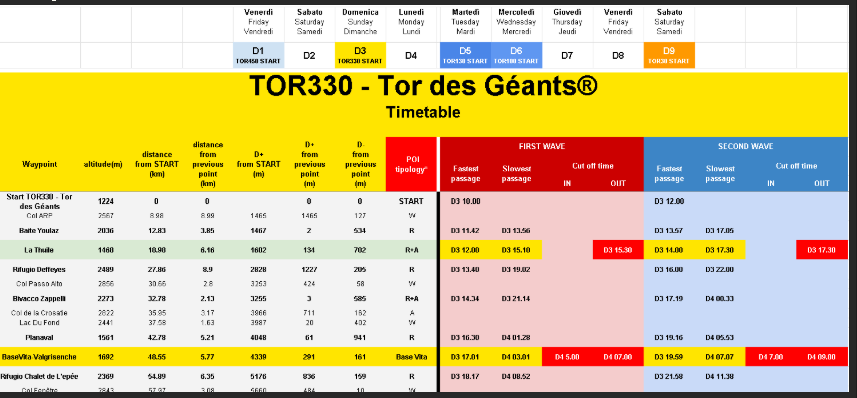


#### Stage Cutoffs
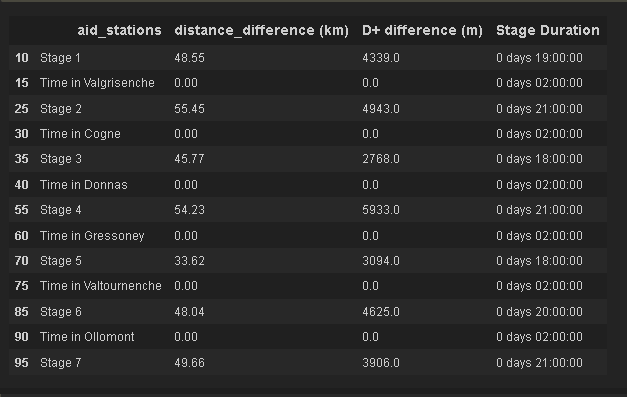

After cleaning the CSV and attaching dates instead of D1/ D2/ D3 etc, this is what the cut off talbe looks like:

#### Dates Cutoffs
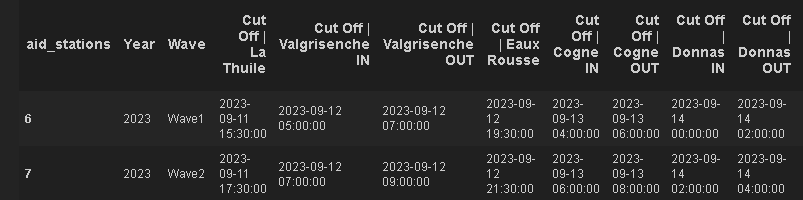

In [104]:
stages_cut_offs_df = pd.read_excel(f'{race} Data/4. TOR330 Timetable Data/{race}_stages_cut_offs_df.xlsx')
stages_cut_offs_df['stage']  = stages_cut_offs_df['stage'] + ' Time'
stages_cut_offs_df

Checkpoint  distance_difference (km)  D+ difference (m)  \
0     Valgrisenche IN                     48.55               4339   
1    Valgrisenche OUT                      0.00                  0   
2            Cogne IN                     55.45               4943   
3           Cogne OUT                      0.00                  0   
4           Donnas IN                     45.77               2768   
5          Donnas OUT                      0.00                  0   
6        Gressoney IN                     54.23               5933   
7       Gressoney OUT                      0.00                  0   
8    Valtournenche IN                     33.62               3094   
9   Valtournenche OUT                      0.00                  0   
10        Ollomont IN                     48.04               4625   
11       Ollomont OUT                      0.00                  0   
12   TORX Finish Line                     49.66               3906   

                 Wave1  Stage Duration                       stage  
0  2023-09-11 05:00:00        0.791667                Stage 1 Time  
1  2023-09-11 07:00:00        0.083333   Time in Valgrisenche Time  
2  2023-09-12 04:00:00        0.875000                Stage 2 Time  
3  2023-09-12 06:00:00        0.083333          Time in Cogne Time  
4  2023-09-13 00:00:00        0.750000                Stage 3 Time  
5  2023-09-13 02:00:00        0.083333         Time in Donnas Time  
6  2023-09-13 23:00:00        0.875000                Stage 4 Time  
7  2023-09-14 01:00:00        0.083333      Time in Gressoney Time  
8  2023-09-14 19:00:00        0.750000                Stage 5 Time  
9  2023-09-14 21:00:00        0.083333  Time in Valtournenche Time  
10 2023-09-15 17:00:00        0.833333                Stage 6 Time  
11 2023-09-15 19:00:00        0.083333       Time in Ollomont Time  
12 2023-09-16 16:00:00        0.875000                Stage 7 Time

In [105]:
cutoffs_df_pivot = pd.read_excel(f'{race} Data/4. TOR330 Timetable Data/{race}_aid_station_for_each_year_cut_offs_df.xlsx')
cutoffs_df_pivot['Year'] = cutoffs_df_pivot['Year'].astype('str')
cutoffs_df_pivot = cutoffs_df_pivot[cutoffs_df_pivot['Year'] == f'{year}']
cutoffs_df_pivot


Checkpoint  Year   Wave        Cut Off Date
1                  Start  2024  Wave1 2024-09-08 10:00:00
6              La Thuile  2024  Wave1 2024-09-08 15:30:00
11       Valgrisenche IN  2024  Wave1 2024-09-09 05:00:00
16      Valgrisenche OUT  2024  Wave1 2024-09-09 07:00:00
21           Eaux Rousse  2024  Wave1 2024-09-09 19:30:00
26              Cogne IN  2024  Wave1 2024-09-10 04:00:00
31             Cogne OUT  2024  Wave1 2024-09-10 06:00:00
36             Donnas IN  2024  Wave1 2024-09-11 00:00:00
41            Donnas OUT  2024  Wave1 2024-09-11 02:00:00
46   Rifugio della Barma  2024  Wave1 2024-09-11 13:00:00
51         Niel La Gruba  2024  Wave1 2024-09-11 19:30:00
56          Gressoney IN  2024  Wave1 2024-09-11 23:00:00
61         Gressoney OUT  2024  Wave1 2024-09-12 01:00:00
66             Champoluc  2024  Wave1 2024-09-12 13:00:00
71      Valtournenche IN  2024  Wave1 2024-09-12 19:00:00
76     Valtournenche OUT  2024  Wave1 2024-09-12 21:00:00
81                 Oyace  2024  Wave1 2024-09-13 12:00:00
86           Ollomont IN  2024  Wave1 2024-09-13 17:00:00
91          Ollomont OUT  2024  Wave1 2024-09-13 19:00:00
96                FINISH  2024  Wave1 2024-09-14 16:00:00
101                Start  2024  Wave2 2024-09-08 12:00:00
106            La Thuile  2024  Wave2 2024-09-08 17:30:00
111      Valgrisenche IN  2024  Wave2 2024-09-09 07:00:00
116     Valgrisenche OUT  2024  Wave2 2024-09-09 09:00:00
121          Eaux Rousse  2024  Wave2 2024-09-09 21:30:00
126             Cogne IN  2024  Wave2 2024-09-10 06:00:00
131            Cogne OUT  2024  Wave2 2024-09-10 08:00:00
136            Donnas IN  2024  Wave2 2024-09-11 02:00:00
141           Donnas OUT  2024  Wave2 2024-09-11 04:00:00
146  Rifugio della Barma  2024  Wave2 2024-09-11 15:00:00
151        Niel La Gruba  2024  Wave2 2024-09-11 21:30:00
156         Gressoney IN  2024  Wave2 2024-09-12 01:00:00
161        Gressoney OUT  2024  Wave2 2024-09-12 03:00:00
166            Champoluc  2024  Wave2 2024-09-12 15:00:00
171     Valtournenche IN  2024  Wave2 2024-09-12 21:00:00
176    Valtournenche OUT  2024  Wave2 2024-09-12 23:00:00
181                Oyace  2024  Wave2 2024-09-13 14:00:00
186          Ollomont IN  2024  Wave2 2024-09-13 19:00:00
191         Ollomont OUT  2024  Wave2 2024-09-13 21:00:00
196               FINISH  2024  Wave2 2024-09-14 18:00:00

### Did anyone who finished the race missed the cut off?

In [106]:
# bib1440 = melt_checkpoints_TOR33_df[melt_checkpoints_TOR33_df['Bib'] == 1440]
# fifty = melt_checkpoints_TOR33_df
# for aid_station in cutoffs_df_melt['aid_stations'].unique():
    
#     for wave in ['Wave1', 'Wave2']:
#         cut_off_for_checkpoint = cutoffs_df_melt['Date'][(cutoffs_df_melt['aid_stations'] == aid_station) &
#                                                          (cutoffs_df_melt['Wave'] == wave) &
#                                                          (cutoffs_df_melt['Year'] == year)].values[0]
        
        
#         df = fifty[(fifty['Checkpoint'] == aid_station) &
#               (fifty['Wave'] == wave) &
#               (fifty['Year'] == year)]
        
# #         print(df ['Timestamp'])
#         print('\n', '*'*20 ,'\n', aid_station, wave, df.shape )
#             # Iterate over rows under the condition
#         for idx, row in df.iterrows():
#             # iterrate over the rows of 
#             if 'IN' in aid_station or ' OUT' in aid_station:
#                 new_aid_station = aid_station.split('')
#                 print(new_aid_station)
#                 df['Missed'] = np.where( cut_off_for_checkpoint - df [''] < pd.to_timedelta('00:00:00'),
#                                              f'Missed cutoff at {aid_station}' ,
#                                              np.nan)           
#             else:
#                 row['Missed'] = np.where( cut_off_for_checkpoint - row['Timestamp'] < pd.to_timedelta('00:00:00'),
#                                              f'Missed cutoff at {aid_station}' ,
#                                              np.nan)
#         print(df.groupby(['Missed'])['Missed'].count())
        
# # fifty ['Missed'].unique()

### Looking for the Polish Fella!

When I ran TOR 2023, I distingly remember running into a Polish fella as I was leaving Gressoney. I was hiking with him from Rifugio Barma, he was in Wave 1. I remember running up to him at the lifebase, all excited "Hey, you made it!"

The reply I recieved was "WHat are you talking about? I missed the cutoff"

So I began looking for him to find out why I dont have more people who missed the cut off!

Here I am leaving Gressoney!

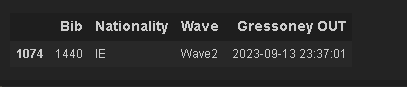

This is the cut off times
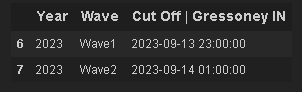

I looked for all the Poles that DNFed the race

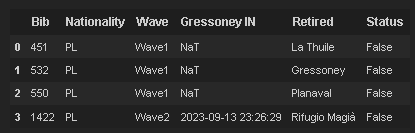

It is clear that he DNFed at 'Gressoney OUT - RITIRIO' 
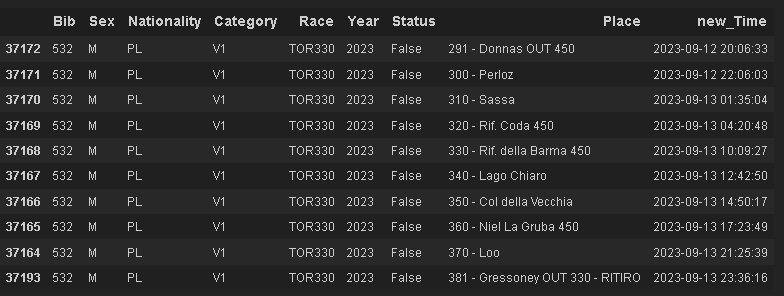
This is what is causing my heartache!


In [107]:
pivoted_TOR330_dates[['Bib','Nationality','Wave', 'Gressoney IN','Retired', 'Status']][
    (pivoted_TOR330_dates['Nationality'] == 'PL') &
    (pivoted_TOR330_dates_DNF['Status'] == False)].reset_index(drop = True)   

C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\3548030829.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pivoted_TOR330_dates[['Bib','Nationality','Wave', 'Gressoney IN','Retired', 'Status']][


Bib Nationality   Wave Gressoney IN            Retired  Status
0   421          PL  Wave1          NaT        Eaux Rousse   False
1   501          PL  Wave1          NaT              Cogne   False
2  1063          PL  Wave2          NaT          Gressoney   False
3  1118          PL  Wave2          NaT        Eaux Rousse   False
4  1143          PL  Wave2          NaT       Valgrisenche   False
5  1474          PL  Wave2          NaT  Rhemes-Notre-Dame   False

In [108]:
pivoted_TOR330_dates[[ 'Bib', 'Nationality','Wave', 'Gressoney OUT', 'Status']][
    pivoted_TOR330_dates['Bib'] == 1440]

Bib Nationality   Wave Gressoney OUT  Status
977  1440          US  Wave2           NaT   False

In [109]:
# Pivot the data so that each participant has its own column
polish532 =  TOR330[['Bib', 'Race','Year', 'Status' , 'Place', 'new_Time'
          ]][TOR330['Bib'] == 532].reset_index(drop = True)


polish532.sort_values(by= 'new_Time', ascending = True)[-10:]

Bib    Race  Year  Status                           Place  \
9  532  TOR330  2024    True           570 - Berio Damon 330   
8  532  TOR330  2024    True           580 - Ollomont IN 330   
7  532  TOR330  2024    True          581 - Ollomont OUT 330   
6  532  TOR330  2024    True       590 - Rif. Champillon 450   
5  532  TOR330  2024    True       610 - Ponteille Desot 450   
4  532  TOR330  2024    True                620 - Bosses 330   
3  532  TOR330  2024    True         630 - Rif. Frassati 450   
2  532  TOR330  2024    True  640 - Pas Entre Deux Sauts 450   
1  532  TOR330  2024    True      650 - Monte de la Saxe 450   
0  532  TOR330  2024    True                660 - FINISH|UHF   

             new_Time  
9 2024-09-11 11:39:17  
8 2024-09-11 11:59:16  
7 2024-09-11 12:07:45  
6 2024-09-11 13:51:27  
5 2024-09-11 15:22:38  
4 2024-09-11 16:48:10  
3 2024-09-11 19:28:58  
2 2024-09-11 21:29:37  
1 2024-09-11 23:21:12  
0 2024-09-12 00:22:35

#### RITIRIO

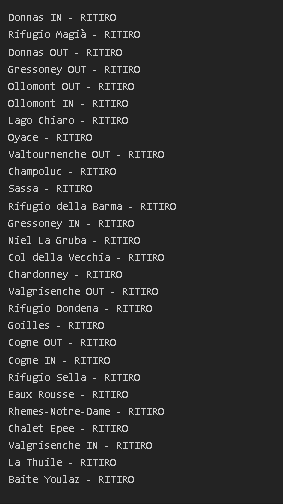



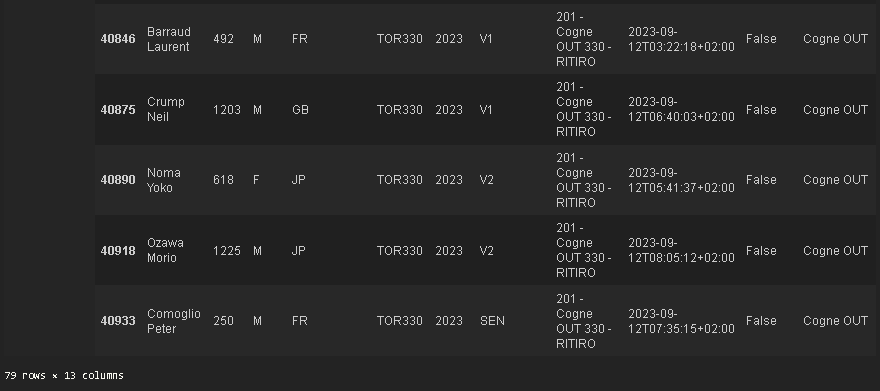

In [110]:
# Pattern to match "OUT Number - RITIRO"
pattern = r'OUT \d+ - RITIRO'

TOR330[TOR330['Place'].str.contains(pattern, na=False)].reset_index(drop = True)

Name   Bib Sex Nationality    Race  Year Category  \
0          Cagna Andrea  1547   M          IT  TOR330  2024       V1   
1       Fioroni Massimo    62   M          IT  TOR330  2024       V2   
2          Junnila Niko  1047   M          FI  TOR330  2024       V1   
3        Marabini Mirco  1495   M          IT  TOR330  2024       V2   
4         Pilzer Mattia   334   M          IT  TOR330  2024       V1   
..                  ...   ...  ..         ...     ...   ...      ...   
94  Khoo Hock Meng Wain  1299   M          SG  TOR330  2024       V2   
95     Stefan Mateschke  1139   M          DE  TOR330  2024       V2   
96            Du Jianli  1416   M          CN  TOR330  2024       V2   
97          Pled Karine  1125   F          FR  TOR330  2024       V2   
98      Vigna Gian Luca  1032   M          IT  TOR330  2024       V2   

                              Place                       Time  Status  \
0      201 - Cogne OUT 450 - RITIRO  2024-09-10T06:52:37+02:00    True   
1      201 - Cogne OUT 450 - RITIRO  2024-09-10T01:52:27+02:00   False   
2   581 - Ollomont OUT 330 - RITIRO  2024-09-13T07:03:36+02:00   False   
3   581 - Ollomont OUT 330 - RITIRO  2024-09-13T08:46:16+02:00   False   
4   581 - Ollomont OUT 330 - RITIRO  2024-09-13T15:05:09+02:00   False   
..                              ...                        ...     ...   
94     201 - Cogne OUT 450 - RITIRO  2024-09-10T07:55:31+02:00   False   
95     201 - Cogne OUT 450 - RITIRO  2024-09-10T07:58:23+02:00   False   
96     201 - Cogne OUT 450 - RITIRO  2024-09-10T08:04:08+02:00   False   
97     201 - Cogne OUT 450 - RITIRO  2024-09-10T08:04:17+02:00   False   
98     201 - Cogne OUT 450 - RITIRO  2024-09-10T08:06:11+02:00   False   

    aid_stations                RITIRIO            new_Time  
0      Cogne OUT     Cogne OUT - RITIRO 2024-09-10 06:52:37  
1      Cogne OUT     Cogne OUT - RITIRO 2024-09-10 01:52:27  
2   Ollomont OUT  Ollomont OUT - RITIRO 2024-09-13 07:03:36  
3   Ollomont OUT  Ollomont OUT - RITIRO 2024-09-13 08:46:16  
4   Ollomont OUT  Ollomont OUT - RITIRO 2024-09-13 15:05:09  
..           ...                    ...                 ...  
94     Cogne OUT     Cogne OUT - RITIRO 2024-09-10 07:55:31  
95     Cogne OUT     Cogne OUT - RITIRO 2024-09-10 07:58:23  
96     Cogne OUT     Cogne OUT - RITIRO 2024-09-10 08:04:08  
97     Cogne OUT     Cogne OUT - RITIRO 2024-09-10 08:04:17  
98     Cogne OUT     Cogne OUT - RITIRO 2024-09-10 08:06:11  

[99 rows x 13 columns]

In [111]:
for i in TOR330['RITIRIO'].unique():
    print(i)


Bosses - RITIRO
Cogne OUT - RITIRO
Rifugio della Barma - RITIRO
Rifugio Champillon - RITIRO
Ollomont OUT - RITIRO
Ollomont IN - RITIRO
Niel La Gruba - RITIRO
Valgrisenche IN - RITIRO
Oyace - RITIRO
Chardonney - RITIRO
Rifugio Magià - RITIRO
Valtournenche OUT - RITIRO
Champoluc - RITIRO
Gressoney OUT - RITIRO
Donnas IN - RITIRO
Donnas OUT - RITIRO
Pontboset - RITIRO
Rifugio Dondena - RITIRO
Cogne IN - RITIRO
Eaux Rousse - RITIRO
Rhemes-Notre-Dame - RITIRO
Valgrisenche OUT - RITIRO
La Thuile - RITIRO
Planaval - RITIRO


In [112]:
TORX_list = []
n=0
for unique_bib in melt_checkpoints_TOR330_df['Bib'].unique():

    # Filter the dataframe for the current unique_bib
    bib_df = melt_checkpoints_TOR330_df[melt_checkpoints_TOR330_df['Bib'] == unique_bib]
#     print(unique_bib, bib_df['Retired'].values[0])
    if bib_df['Retired'].isna().all():

        # Merge with the cutoffs dataframe
        bib_df = bib_df.merge(
            cutoffs_df_pivot,
            on=['Checkpoint', 'Wave', 'Year'],
            how='left')
    
        n = n+1
        print(n)
        
        bib_df['Duration'] = bib_df['Timestamp'].diff()
    

        # Iterate over the rows to process the data
        for idx, row in bib_df.iterrows():
            # Check if 'Timestamp' is missing
            if pd.isna(row['Timestamp']):
                bib_df.at[idx, 'Missed'] = 'No Timestamp'
    #             print(f"Missing timestamp for Checkpoint: {row['Checkpoint']}")
            else:
    #             print(f"Checkpoint: {row['Checkpoint']}")
                # Compute the duration (example assumes 'Timestamp' is datetime)
                if idx > 0:  # To avoid accessing out of bounds
                    bib_df.at[idx, 'Duration'] = row['Timestamp'] - bib_df.at[idx - 1, 'Timestamp']
                # Compare 'Timestamp' with the cutoff
                bib_df.at[idx, 'Missed'] = row['Timestamp'] > row['Cut Off Date']
                bib_df.at[idx, 'Missed Diff'] = np.where(row['Timestamp'] > row['Cut Off Date'],
                                                        row['Timestamp'] - row['Cut Off Date'],
                                                        np.nan)

        # Print the final processed dataframe for the current 'Bib'
    #     print(bib_df)
        TORX_list.append(bib_df)
    
    # Dealing with DNFs
    else:
         pass


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [113]:
# Combine all processed dataframes into one
TORX_df = pd.concat(TORX_list, ignore_index=True)

# Print the final combined dataframe
print(TORX_df)

       Year    Race   Bib   Wave Retired Retired_Stage         Checkpoint  \
0      2024  TOR330    10  Wave1     NaN           NaN     new_Start Date   
1      2024  TOR330    10  Wave1     NaN           NaN          La Thuile   
2      2024  TOR330    10  Wave1     NaN           NaN    Valgrisenche IN   
3      2024  TOR330    10  Wave1     NaN           NaN   Valgrisenche OUT   
4      2024  TOR330    10  Wave1     NaN           NaN        Eaux Rousse   
...     ...     ...   ...    ...     ...           ...                ...   
10655  2024  TOR330  1524  Wave2     NaN           NaN  Valtournenche OUT   
10656  2024  TOR330  1524  Wave2     NaN           NaN              Oyace   
10657  2024  TOR330  1524  Wave2     NaN           NaN        Ollomont IN   
10658  2024  TOR330  1524  Wave2     NaN           NaN       Ollomont OUT   
10659  2024  TOR330  1524  Wave2     NaN           NaN             FINISH   

                Timestamp        Cut Off Date        Duration Missed  \
0  

In [114]:
TORX_df[
    # everyone who finished
    (TORX_df['Retired'].isna()) &
    # missed the cut off but finished
    (TORX_df['Missed'] == True)]

Year    Race   Bib   Wave Retired Retired_Stage     Checkpoint  \
7712   2024  TOR330    33  Wave1     NaN           NaN  Gressoney OUT   
9538   2024  TOR330   544  Wave1     NaN           NaN   Ollomont OUT   
9777   2024  TOR330   391  Wave1     NaN           NaN    Ollomont IN   
9856   2024  TOR330  1280  Wave2     NaN           NaN          Oyace   
9932   2024  TOR330   500  Wave1     NaN           NaN  Gressoney OUT   
10236  2024  TOR330  1566  Wave2     NaN           NaN          Oyace   
10258  2024  TOR330  1262  Wave2     NaN           NaN   Ollomont OUT   
10336  2024  TOR330  1525  Wave2     NaN           NaN          Oyace   
10506  2024  TOR330   506  Wave1     NaN           NaN      Cogne OUT   
10512  2024  TOR330   506  Wave1     NaN           NaN  Gressoney OUT   
10518  2024  TOR330   506  Wave1     NaN           NaN   Ollomont OUT   
10558  2024  TOR330   359  Wave1     NaN           NaN   Ollomont OUT   
10579  2024  TOR330  1468  Wave2     NaN           NaN         FINISH   
10599  2024  TOR330  1456  Wave2     NaN           NaN         FINISH   
10619  2024  TOR330  1265  Wave2     NaN           NaN         FINISH   
10639  2024  TOR330  1242  Wave2     NaN           NaN         FINISH   
10659  2024  TOR330  1524  Wave2     NaN           NaN         FINISH   

                Timestamp        Cut Off Date        Duration Missed  \
7712  2024-09-12 01:06:37 2024-09-12 01:00:00 0 days 02:28:26   True   
9538  2024-09-13 19:07:06 2024-09-13 19:00:00 0 days 03:04:55   True   
9777  2024-09-13 17:00:23 2024-09-13 17:00:00 0 days 08:18:05   True   
9856  2024-09-13 14:00:33 2024-09-13 14:00:00 0 days 17:16:53   True   
9932  2024-09-12 01:00:18 2024-09-12 01:00:00 0 days 02:32:52   True   
10236 2024-09-13 14:01:34 2024-09-13 14:00:00 0 days 16:17:32   True   
10258 2024-09-13 21:03:24 2024-09-13 21:00:00 0 days 02:26:50   True   
10336 2024-09-13 14:11:48 2024-09-13 14:00:00 0 days 15:17:58   True   
10506 2024-09-10 06:30:30 2024-09-10 06:00:00 0 days 04:30:52   True   
10512 2024-09-12 01:01:08 2024-09-12 01:00:00 0 days 02:59:44   True   
10518 2024-09-13 19:04:16 2024-09-13 19:00:00 0 days 02:24:17   True   
10558 2024-09-13 19:08:49 2024-09-13 19:00:00 0 days 02:29:45   True   
10579 2024-09-14 18:21:09 2024-09-14 18:00:00 0 days 23:09:03   True   
10599 2024-09-14 18:53:20 2024-09-14 18:00:00             NaT   True   
10619 2024-09-14 18:57:12 2024-09-14 18:00:00 0 days 23:30:10   True   
10639 2024-09-14 18:59:52 2024-09-14 18:00:00 0 days 22:10:03   True   
10659 2024-09-14 20:14:00 2024-09-14 18:00:00 0 days 23:36:58   True   

           Missed Diff  
7712   0 days 00:06:37  
9538   0 days 00:07:06  
9777   0 days 00:00:23  
9856   0 days 00:00:33  
9932   0 days 00:00:18  
10236  0 days 00:01:34  
10258  0 days 00:03:24  
10336  0 days 00:11:48  
10506  0 days 00:30:30  
10512  0 days 00:01:08  
10518  0 days 00:04:16  
10558  0 days 00:08:49  
10579  0 days 00:21:09  
10599  0 days 00:53:20  
10619  0 days 00:57:12  
10639  0 days 00:59:52  
10659  0 days 02:14:00

In [171]:
TORX_list = []
n = 0

# Filter unique Bibs where 'Retired' is not NaN
for unique_bib in list(melt_checkpoints_TOR330_df['Bib'][~melt_checkpoints_TOR330_df['Retired'].isna()].unique()):
    # Filter the dataframe for the current unique_bib
    bib_df = melt_checkpoints_TOR330_df[melt_checkpoints_TOR330_df['Bib'] == unique_bib]
    bib_df['Duration'] = bib_df['Timestamp'].diff()
############################################################
    # Group by 'Bib' and find the last valid timestamp index
    last_valid_indices = bib_df[bib_df['Timestamp'].notna()].groupby('Bib').tail(1).index

    # Create a mask to filter out rows after the last valid timestamp for each 'Bib'
    mask = pd.Series(True, index=bib_df.index)
    for idx in last_valid_indices:
        bib = bib_df.at[idx, 'Bib']
        mask &= ~((bib_df['Bib'] == bib) & (bib_df.index > idx) & bib_df['Timestamp'].isna())

    # Apply the mask to filter the DataFrame
    bib_df = bib_df[mask]
    bib_df = bib_df.reset_index(drop = True)

# ############################################################
    
    retired_location = bib_df['Retired'].values[0]
    print(f"Processing Bib: {unique_bib}, Retired Location: {retired_location}")

    # Iterate over the rows to process the data
    for idx, row in bib_df.iterrows():
        checkpoint = row['Checkpoint']

        if retired_location not in checkpoint:
            # Extract the matching cutoff row
            single_cutoffs_df_pivot = cutoffs_df_pivot[cutoffs_df_pivot['Checkpoint'] == checkpoint]
            
            
            # Merge single row cutoffs with current row data
            merged_row = row.to_frame().T.merge(
                single_cutoffs_df_pivot,
                on=['Checkpoint', 'Wave', 'Year'],
                how='left'
            )

            # Update the original dataframe with the merged result
            for col in merged_row.columns:
                bib_df.at[idx, col] = merged_row.iloc[0][col]
    
            if pd.isna(row['Timestamp']):
                bib_df.at[idx, 'Missed'] = 'No Timestamp'
                bib_df.at[idx, 'Missed Diff'] = np.nan
            else:
                if idx > 0:  # To avoid accessing out of bounds
                    bib_df.at[idx, 'Duration'] = row['Timestamp'] - bib_df.at[idx - 1, 'Timestamp']

                    # Compare 'Timestamp' with the cutoff
                    bib_df.at[idx, 'Missed'] = row['Timestamp'] >   bib_df.at[idx, 'Cut Off Date']
                    bib_df.at[idx, 'Missed Diff'] = np.where(row['Timestamp'] > bib_df.at[idx, 'Cut Off Date'],
                                                            row['Timestamp'] - bib_df.at[idx, 'Cut Off Date'],
                                                            np.nan)
                
        elif retired_location in checkpoint:
            # Check if the checkpoint does not contain 'OUT' or 'IN'
            if 'OUT' in  checkpoint or 'IN' in checkpoint:
                print('I am working on it!!!!')

            else: 
                # Extract the matching cutoff row
                single_cutoffs_df_pivot = cutoffs_df_pivot[cutoffs_df_pivot['Checkpoint'] == checkpoint]


                # Merge single row cutoffs with current row data
                merged_row = row.to_frame().T.merge(
                    single_cutoffs_df_pivot,
                    on=['Checkpoint', 'Wave', 'Year'],
                    how='left'
                )

                # Update the original dataframe with the merged result
                for col in merged_row.columns:
                    bib_df.at[idx, col] = merged_row.iloc[0][col]


                if pd.isna(row['Timestamp']):
                    bib_df.at[idx, 'Missed'] = 'No Timestamp'
                    bib_df.at[idx, 'Missed Diff'] = np.nan
                else:
                    if idx > 0:  # To avoid accessing out of bounds
                        bib_df.at[idx, 'Duration'] = row['Timestamp'] - bib_df.at[idx - 1, 'Timestamp']

                        # Compare 'Timestamp' with the cutoff
                        bib_df.at[idx, 'Missed'] = row['Timestamp'] >   bib_df.at[idx, 'Cut Off Date']
                        bib_df.at[idx, 'Missed Diff'] = np.where(row['Timestamp'] > bib_df.at[idx, 'Cut Off Date'],
                                                                row['Timestamp'] - bib_df.at[idx, 'Cut Off Date'],
                                                                np.nan)
                
    # Append the processed DataFrame to the list
    TORX_list.append(bib_df)
    n += 1
    print(f"Processed {n} Bib(s).", unique_bib)

# Combine all results into one DataFrame
if TORX_list:
    final_df = pd.concat(TORX_list, ignore_index=True)
    print("Combined DataFrame created.")
else:
    final_df = pd.DataFrame()
    print("No DataFrames were processed.")
final_df

C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1, Retired Location: Pas Entre Deux Sauts
Processed 1 Bib(s). 1
Processing Bib: 3, Retired Location: Cogne
I am working on it!!!!
Processed 2 Bib(s). 3


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 5, Retired Location: Chardonney
Processed 3 Bib(s). 5
Processing Bib: 8, Retired Location: La Thuile
Processed 4 Bib(s). 8


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 9, Retired Location: Chardonney
Processed 5 Bib(s). 9
Processing Bib: 11, Retired Location: new_Start Date


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 6 Bib(s). 11
Processing Bib: 14, Retired Location: Champoluc
Processed 7 Bib(s). 14
Processing Bib: 16, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 8 Bib(s). 16
Processing Bib: 17, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 9 Bib(s). 17
Processing Bib: 19, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 10 Bib(s). 19
Processing Bib: 26, Retired Location: new_Start Date
Processed 11 Bib(s). 26


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 27, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 12 Bib(s). 27
Processing Bib: 35, Retired Location: Pontboset


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 13 Bib(s). 35
Processing Bib: 36, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 14 Bib(s). 36
Processing Bib: 41, Retired Location: Valgrisenche
I am working on it!!!!
Processed 15 Bib(s). 41
Processing Bib: 42, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 16 Bib(s). 42
Processing Bib: 45, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 17 Bib(s). 45
Processing Bib: 47, Retired Location: Eaux Rousse
Processed 18 Bib(s). 47
Processing Bib: 50, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 19 Bib(s). 50
Processing Bib: 51, Retired Location: Donnas
I am working on it!!!!
Processed 20 Bib(s). 51


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 62, Retired Location: Rifugio Champillon
Processed 21 Bib(s). 62
Processing Bib: 68, Retired Location: Rhemes-Notre-Dame


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 22 Bib(s). 68
Processing Bib: 69, Retired Location: Donnas
I am working on it!!!!
Processed 23 Bib(s). 69
Processing Bib: 71, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 24 Bib(s). 71
Processing Bib: 72, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 25 Bib(s). 72
Processing Bib: 77, Retired Location: Valgrisenche
I am working on it!!!!
Processed 26 Bib(s). 77
Processing Bib: 78, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 27 Bib(s). 78
Processing Bib: 80, Retired Location: Rifugio Frassati


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 28 Bib(s). 80
Processing Bib: 81, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 29 Bib(s). 81
Processing Bib: 86, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 30 Bib(s). 86
Processing Bib: 87, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 31 Bib(s). 87
Processing Bib: 88, Retired Location: Pas Entre Deux Sauts


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 32 Bib(s). 88
Processing Bib: 89, Retired Location: Valgrisenche
I am working on it!!!!
Processed 33 Bib(s). 89
Processing Bib: 91, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 34 Bib(s). 91
Processing Bib: 95, Retired Location: Sassa


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 35 Bib(s). 95
Processing Bib: 97, Retired Location: Valtournenche


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 36 Bib(s). 97
Processing Bib: 99, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 37 Bib(s). 99
Processing Bib: 108, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 38 Bib(s). 108
Processing Bib: 110, Retired Location: Rifugio Alpenzu


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 39 Bib(s). 110
Processing Bib: 116, Retired Location: Planaval
Processed 40 Bib(s). 116


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 119, Retired Location: Oyace
Processed 41 Bib(s). 119
Processing Bib: 122, Retired Location: Eaux Rousse
Processed 42 Bib(s). 122
Processing Bib: 125, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 43 Bib(s). 125
Processing Bib: 127, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 44 Bib(s). 127
Processing Bib: 129, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 45 Bib(s). 129
Processing Bib: 134, Retired Location: Eaux Rousse
Processed 46 Bib(s). 134
Processing Bib: 135, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 47 Bib(s). 135
Processing Bib: 141, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 48 Bib(s). 141
Processing Bib: 145, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 49 Bib(s). 145
Processing Bib: 147, Retired Location: Eaux Rousse
Processed 50 Bib(s). 147
Processing Bib: 150, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 51 Bib(s). 150


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 153, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 52 Bib(s). 153
Processing Bib: 155, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 53 Bib(s). 155
Processing Bib: 158, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 54 Bib(s). 158
Processing Bib: 166, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 55 Bib(s). 166
Processing Bib: 168, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 56 Bib(s). 168


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 171, Retired Location: Donnas
I am working on it!!!!
Processed 57 Bib(s). 171
Processing Bib: 173, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 58 Bib(s). 173
Processing Bib: 174, Retired Location: Cogne
I am working on it!!!!
Processed 59 Bib(s). 174
Processing Bib: 181, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 60 Bib(s). 181
Processing Bib: 182, Retired Location: Donnas
I am working on it!!!!
Processed 61 Bib(s). 182


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 184, Retired Location: Rifugio Deffeyes
Processed 62 Bib(s). 184
Processing Bib: 186, Retired Location: La Thuile
Processed 63 Bib(s). 186
Processing Bib: 187, Retired Location: Valgrisenche
I am working on it!!!!
Processed 64 Bib(s). 187


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 191, Retired Location: Champoluc
Processed 65 Bib(s). 191
Processing Bib: 192, Retired Location: Rifugio Coda


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 66 Bib(s). 192
Processing Bib: 195, Retired Location: Chardonney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 67 Bib(s). 195
Processing Bib: 199, Retired Location: Planaval
Processed 68 Bib(s). 199
Processing Bib: 200, Retired Location: Eaux Rousse
Processed 69 Bib(s). 200


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 202, Retired Location: Ollomont
I am working on it!!!!
I am working on it!!!!
Processed 70 Bib(s). 202
Processing Bib: 203, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 71 Bib(s). 203


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 205, Retired Location: Bivacco R. Clermont
Processed 72 Bib(s). 205
Processing Bib: 207, Retired Location: Eaux Rousse
Processed 73 Bib(s). 207
Processing Bib: 216, Retired Location: Chalet Epee


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 74 Bib(s). 216
Processing Bib: 217, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 75 Bib(s). 217
Processing Bib: 219, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 76 Bib(s). 219
Processing Bib: 221, Retired Location: new_Start Date
Processed 77 Bib(s). 221
Processing Bib: 224, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 78 Bib(s). 224
Processing Bib: 225, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 79 Bib(s). 225
Processing Bib: 226, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 80 Bib(s). 226
Processing Bib: 228, Retired Location: Pontboset
Processed 81 Bib(s). 228


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 231, Retired Location: Rifugio Alpenzu
Processed 82 Bib(s). 231
Processing Bib: 232, Retired Location: Bosses


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 83 Bib(s). 232
Processing Bib: 237, Retired Location: Eaux Rousse
Processed 84 Bib(s). 237


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 240, Retired Location: Oyace
Processed 85 Bib(s). 240
Processing Bib: 241, Retired Location: Planaval
Processed 86 Bib(s). 241
Processing Bib: 247, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 87 Bib(s). 247
Processing Bib: 251, Retired Location: Valgrisenche
I am working on it!!!!
Processed 88 Bib(s). 251
Processing Bib: 254, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 89 Bib(s). 254
Processing Bib: 255, Retired Location: Rhemes-Notre-Dame
Processed 90 Bib(s). 255
Processing Bib: 256, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 91 Bib(s). 256
Processing Bib: 259, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 92 Bib(s). 259


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 263, Retired Location: Ollomont
I am working on it!!!!
Processed 93 Bib(s). 263
Processing Bib: 266, Retired Location: Bosses


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 94 Bib(s). 266
Processing Bib: 269, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 95 Bib(s). 269
Processing Bib: 275, Retired Location: Bosses


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 96 Bib(s). 275
Processing Bib: 278, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 97 Bib(s). 278
Processing Bib: 285, Retired Location: Rifugio Barmasse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 98 Bib(s). 285
Processing Bib: 287, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 99 Bib(s). 287
Processing Bib: 291, Retired Location: Rhemes-Notre-Dame
Processed 100 Bib(s). 291
Processing Bib: 292, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 101 Bib(s). 292
Processing Bib: 293, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 102 Bib(s). 293
Processing Bib: 299, Retired Location: Rifugio Coda
Processed 103 Bib(s). 299


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 300, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 104 Bib(s). 300
Processing Bib: 301, Retired Location: Rifugio Coda


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 105 Bib(s). 301
Processing Bib: 307, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 106 Bib(s). 307
Processing Bib: 310, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 107 Bib(s). 310
Processing Bib: 312, Retired Location: Rifugio Dondena
Processed 108 Bib(s). 312


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 314, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 109 Bib(s). 314
Processing Bib: 316, Retired Location: Rhemes-Notre-Dame
Processed 110 Bib(s). 316


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 318, Retired Location: Donnas
I am working on it!!!!
Processed 111 Bib(s). 318
Processing Bib: 320, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 112 Bib(s). 320
Processing Bib: 322, Retired Location: Lago Chiaro


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 113 Bib(s). 322
Processing Bib: 326, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 114 Bib(s). 326
Processing Bib: 328, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 115 Bib(s). 328
Processing Bib: 330, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 116 Bib(s). 330


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 332, Retired Location: Rifugio Deffeyes
Processed 117 Bib(s). 332
Processing Bib: 334, Retired Location: Ollomont
I am working on it!!!!
I am working on it!!!!
Processed 118 Bib(s). 334
Processing Bib: 335, Retired Location: Rhemes-Notre-Dame
Processed 119 Bib(s). 335


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 337, Retired Location: Rifugio Barmasse
Processed 120 Bib(s). 337
Processing Bib: 342, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 121 Bib(s). 342
Processing Bib: 343, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 122 Bib(s). 343
Processing Bib: 348, Retired Location: Col della Vecchia


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 123 Bib(s). 348
Processing Bib: 353, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 124 Bib(s). 353
Processing Bib: 357, Retired Location: Rhemes-Notre-Dame
Processed 125 Bib(s). 357
Processing Bib: 360, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 126 Bib(s). 360
Processing Bib: 374, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 127 Bib(s). 374
Processing Bib: 375, Retired Location: Bruson Arp


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 128 Bib(s). 375
Processing Bib: 381, Retired Location: new_Start Date
Processed 129 Bib(s). 381
Processing Bib: 382, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 130 Bib(s). 382


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 387, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 131 Bib(s). 387


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 388, Retired Location: Cogne
I am working on it!!!!
Processed 132 Bib(s). 388
Processing Bib: 390, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 133 Bib(s). 390
Processing Bib: 394, Retired Location: Rifugio Dondena


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 134 Bib(s). 394
Processing Bib: 396, Retired Location: Planaval
Processed 135 Bib(s). 396
Processing Bib: 397, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 136 Bib(s). 397
Processing Bib: 400, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 137 Bib(s). 400
Processing Bib: 401, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 138 Bib(s). 401
Processing Bib: 407, Retired Location: Goilles


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 139 Bib(s). 407
Processing Bib: 410, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 140 Bib(s). 410
Processing Bib: 412, Retired Location: Valgrisenche
I am working on it!!!!
Processed 141 Bib(s). 412


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 415, Retired Location: Valgrisenche
I am working on it!!!!
Processed 142 Bib(s). 415
Processing Bib: 416, Retired Location: Rifugio Champillon
Processed 143 Bib(s). 416


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 417, Retired Location: Eaux Rousse
Processed 144 Bib(s). 417


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 418, Retired Location: Eaux Rousse
Processed 145 Bib(s). 418
Processing Bib: 420, Retired Location: Rifugio della Barma
Processed 146 Bib(s). 420
Processing Bib: 421, Retired Location: Eaux Rousse
Processed 147 Bib(s). 421
Processing Bib: 426, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 148 Bib(s). 426
Processing Bib: 427, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 149 Bib(s). 427
Processing Bib: 430, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 150 Bib(s). 430
Processing Bib: 438, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 151 Bib(s). 438
Processing Bib: 439, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 152 Bib(s). 439


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 440, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 153 Bib(s). 440
Processing Bib: 444, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 154 Bib(s). 444
Processing Bib: 445, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 155 Bib(s). 445
Processing Bib: 446, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 156 Bib(s). 446
Processing Bib: 447, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 157 Bib(s). 447
Processing Bib: 450, Retired Location: Valgrisenche
I am working on it!!!!
Processed 158 Bib(s). 450
Processing Bib: 455, Retired Location: Eaux Rousse
Processed 159 Bib(s). 455


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 456, Retired Location: Eaux Rousse
Processed 160 Bib(s). 456
Processing Bib: 457, Retired Location: Eaux Rousse
Processed 161 Bib(s). 457
Processing Bib: 458, Retired Location: La Thuile
Processed 162 Bib(s). 458
Processing Bib: 462, Retired Location: Cogne
I am working on it!!!!
Processed 163 Bib(s). 462


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 463, Retired Location: new_Start Date
Processed 164 Bib(s). 463
Processing Bib: 470, Retired Location: Valgrisenche
I am working on it!!!!
Processed 165 Bib(s). 470
Processing Bib: 472, Retired Location: Pontboset
Processed 166 Bib(s). 472
Processing Bib: 485, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 167 Bib(s). 485
Processing Bib: 486, Retired Location: Chalet Epee
Processed 168 Bib(s). 486


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 488, Retired Location: Rhemes-Notre-Dame
Processed 169 Bib(s). 488
Processing Bib: 489, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 170 Bib(s). 489
Processing Bib: 492, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 171 Bib(s). 492
Processing Bib: 496, Retired Location: Ponteille Desot
Processed 172 Bib(s). 496


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 501, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 173 Bib(s). 501
Processing Bib: 504, Retired Location: Cogne


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 174 Bib(s). 504
Processing Bib: 505, Retired Location: Oyace
Processed 175 Bib(s). 505
Processing Bib: 509, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 176 Bib(s). 509


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 510, Retired Location: Oyace
Processed 177 Bib(s). 510
Processing Bib: 514, Retired Location: Donnas
I am working on it!!!!
I am working on it!!!!
Processed 178 Bib(s). 514
Processing Bib: 515, Retired Location: Cogne


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 179 Bib(s). 515
Processing Bib: 516, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 180 Bib(s). 516
Processing Bib: 517, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 181 Bib(s). 517
Processing Bib: 525, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 182 Bib(s). 525
Processing Bib: 528, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 183 Bib(s). 528
Processing Bib: 530, Retired Location: Rifugio Coda


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 184 Bib(s). 530
Processing Bib: 535, Retired Location: La Thuile
Processed 185 Bib(s). 535
Processing Bib: 539, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 186 Bib(s). 539
Processing Bib: 542, Retired Location: Rifugio Cuney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 187 Bib(s). 542
Processing Bib: 547, Retired Location: Bosses


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 188 Bib(s). 547
Processing Bib: 549, Retired Location: Valgrisenche
I am working on it!!!!
Processed 189 Bib(s). 549
Processing Bib: 550, Retired Location: Cogne
I am working on it!!!!
Processed 190 Bib(s). 550


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 557, Retired Location: Valgrisenche
I am working on it!!!!
Processed 191 Bib(s). 557
Processing Bib: 560, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 192 Bib(s). 560


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 561, Retired Location: Rifugio Grand Tournalin
Processed 193 Bib(s). 561
Processing Bib: 563, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 194 Bib(s). 563
Processing Bib: 566, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 195 Bib(s). 566
Processing Bib: 568, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 196 Bib(s). 568
Processing Bib: 570, Retired Location: Valgrisenche
I am working on it!!!!
Processed 197 Bib(s). 570
Processing Bib: 571, Retired Location: Col della Vecchia


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 198 Bib(s). 571
Processing Bib: 572, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 199 Bib(s). 572
Processing Bib: 583, Retired Location: Valgrisenche
I am working on it!!!!
Processed 200 Bib(s). 583
Processing Bib: 584, Retired Location: Bruson Arp
Processed 201 Bib(s). 584
Processing Bib: 585, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 202 Bib(s). 585
Processing Bib: 590, Retired Location: Planaval
Processed 203 Bib(s). 590
Processing Bib: 592, Retired Location: new_Start Date
Processed 204 Bib(s). 592
Processing Bib: 595, Retired Location: Chardonney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 205 Bib(s). 595
Processing Bib: 598, Retired Location: Eaux Rousse
Processed 206 Bib(s). 598
Processing Bib: 599, Retired Location: Cogne


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 207 Bib(s). 599
Processing Bib: 601, Retired Location: Valtournenche


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 208 Bib(s). 601
Processing Bib: 602, Retired Location: Rifugio Coda
Processed 209 Bib(s). 602
Processing Bib: 605, Retired Location: Rifugio Champillon


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 210 Bib(s). 605
Processing Bib: 607, Retired Location: Sassa
Processed 211 Bib(s). 607
Processing Bib: 609, Retired Location: Cogne


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 212 Bib(s). 609
Processing Bib: 611, Retired Location: Rhemes-Notre-Dame
Processed 213 Bib(s). 611
Processing Bib: 615, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 214 Bib(s). 615
Processing Bib: 618, Retired Location: Valgrisenche
I am working on it!!!!
Processed 215 Bib(s). 618
Processing Bib: 619, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 216 Bib(s). 619
Processing Bib: 622, Retired Location: Chalet Epee
Processed 217 Bib(s). 622
Processing Bib: 625, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 218 Bib(s). 625
Processing Bib: 630, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 219 Bib(s). 630
Processing Bib: 631, Retired Location: Valgrisenche
I am working on it!!!!
Processed 220 Bib(s). 631
Processing Bib: 632, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 221 Bib(s). 632
Processing Bib: 634, Retired Location: Rifugio Alpenzu


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 222 Bib(s). 634
Processing Bib: 637, Retired Location: Eaux Rousse
Processed 223 Bib(s). 637
Processing Bib: 639, Retired Location: Valgrisenche
I am working on it!!!!
Processed 224 Bib(s). 639


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 640, Retired Location: Cogne
I am working on it!!!!
Processed 225 Bib(s). 640
Processing Bib: 641, Retired Location: Rhemes-Notre-Dame
Processed 226 Bib(s). 641
Processing Bib: 1001, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 227 Bib(s). 1001
Processing Bib: 1003, Retired Location: Eaux Rousse
Processed 228 Bib(s). 1003
Processing Bib: 1005, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 229 Bib(s). 1005
Processing Bib: 1007, Retired Location: Rhemes-Notre-Dame
Processed 230 Bib(s). 1007
Processing Bib: 1008, Retired Location: Cogne


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 231 Bib(s). 1008
Processing Bib: 1009, Retired Location: Eaux Rousse
Processed 232 Bib(s). 1009
Processing Bib: 1011, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 233 Bib(s). 1011
Processing Bib: 1019, Retired Location: Goilles
Processed 234 Bib(s). 1019
Processing Bib: 1020, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 235 Bib(s). 1020
Processing Bib: 1021, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 236 Bib(s). 1021
Processing Bib: 1022, Retired Location: Rifugio Alpenzu


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 237 Bib(s). 1022
Processing Bib: 1030, Retired Location: Rifugio Barmasse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 238 Bib(s). 1030
Processing Bib: 1031, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 239 Bib(s). 1031
Processing Bib: 1032, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 240 Bib(s). 1032
Processing Bib: 1033, Retired Location: Valgrisenche
I am working on it!!!!
Processed 241 Bib(s). 1033
Processing Bib: 1034, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 242 Bib(s). 1034
Processing Bib: 1035, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 243 Bib(s). 1035
Processing Bib: 1036, Retired Location: Eaux Rousse
Processed 244 Bib(s). 1036


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1038, Retired Location: Eaux Rousse
Processed 245 Bib(s). 1038
Processing Bib: 1039, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 246 Bib(s). 1039
Processing Bib: 1043, Retired Location: Valgrisenche
I am working on it!!!!
Processed 247 Bib(s). 1043
Processing Bib: 1045, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 248 Bib(s). 1045
Processing Bib: 1046, Retired Location: Rhemes-Notre-Dame
Processed 249 Bib(s). 1046
Processing Bib: 1047, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 250 Bib(s). 1047
Processing Bib: 1048, Retired Location: Valgrisenche
I am working on it!!!!
Processed 251 Bib(s). 1048
Processing Bib: 1050, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 252 Bib(s). 1050
Processing Bib: 1051, Retired Location: Eaux Rousse
Processed 253 Bib(s). 1051


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1053, Retired Location: Rifugio Deffeyes
Processed 254 Bib(s). 1053
Processing Bib: 1055, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 255 Bib(s). 1055
Processing Bib: 1059, Retired Location: Valgrisenche


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

I am working on it!!!!
Processed 256 Bib(s). 1059
Processing Bib: 1060, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 257 Bib(s). 1060


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1063, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 258 Bib(s). 1063
Processing Bib: 1064, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 259 Bib(s). 1064
Processing Bib: 1067, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 260 Bib(s). 1067
Processing Bib: 1070, Retired Location: Planaval
Processed 261 Bib(s). 1070
Processing Bib: 1074, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 262 Bib(s). 1074
Processing Bib: 1079, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 263 Bib(s). 1079
Processing Bib: 1082, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 264 Bib(s). 1082
Processing Bib: 1083, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 265 Bib(s). 1083
Processing Bib: 1086, Retired Location: Rifugio Alpenzu


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 266 Bib(s). 1086
Processing Bib: 1087, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 267 Bib(s). 1087
Processing Bib: 1093, Retired Location: Valgrisenche
I am working on it!!!!
Processed 268 Bib(s). 1093
Processing Bib: 1094, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 269 Bib(s). 1094
Processing Bib: 1096, Retired Location: Col della Vecchia


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 270 Bib(s). 1096
Processing Bib: 1097, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 271 Bib(s). 1097
Processing Bib: 1099, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 272 Bib(s). 1099
Processing Bib: 1100, Retired Location: Chalet Epee
Processed 273 Bib(s). 1100
Processing Bib: 1103, Retired Location: Planaval
Processed 274 Bib(s). 1103
Processing Bib: 1106, Retired Location: Perloz


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 275 Bib(s). 1106
Processing Bib: 1108, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 276 Bib(s). 1108
Processing Bib: 1109, Retired Location: Eaux Rousse
Processed 277 Bib(s). 1109
Processing Bib: 1110, Retired Location: Vareton


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 278 Bib(s). 1110
Processing Bib: 1111, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 279 Bib(s). 1111
Processing Bib: 1112, Retired Location: Cogne
I am working on it!!!!
Processed 280 Bib(s). 1112
Processing Bib: 1114, Retired Location: Chalet Epee


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 281 Bib(s). 1114
Processing Bib: 1117, Retired Location: Lago Chiaro


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 282 Bib(s). 1117
Processing Bib: 1118, Retired Location: Eaux Rousse
Processed 283 Bib(s). 1118
Processing Bib: 1120, Retired Location: Rhemes-Notre-Dame


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 284 Bib(s). 1120
Processing Bib: 1121, Retired Location: Donnas
I am working on it!!!!
Processed 285 Bib(s). 1121
Processing Bib: 1125, Retired Location: Cogne


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 286 Bib(s). 1125
Processing Bib: 1126, Retired Location: Rifugio Sella
Processed 287 Bib(s). 1126
Processing Bib: 1127, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 288 Bib(s). 1127
Processing Bib: 1128, Retired Location: Valgrisenche
I am working on it!!!!
Processed 289 Bib(s). 1128
Processing Bib: 1129, Retired Location: Eaux Rousse
Processed 290 Bib(s). 1129
Processing Bib: 1130, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 291 Bib(s). 1130
Processing Bib: 1132, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 292 Bib(s). 1132
Processing Bib: 1133, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 293 Bib(s). 1133
Processing Bib: 1135, Retired Location: Rifugio Grand Tournalin


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 294 Bib(s). 1135
Processing Bib: 1136, Retired Location: Rifugio Frassati


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 295 Bib(s). 1136
Processing Bib: 1137, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 296 Bib(s). 1137
Processing Bib: 1138, Retired Location: Rifugio Alpenzu


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 297 Bib(s). 1138
Processing Bib: 1139, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 298 Bib(s). 1139
Processing Bib: 1141, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 299 Bib(s). 1141
Processing Bib: 1142, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 300 Bib(s). 1142
Processing Bib: 1143, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 301 Bib(s). 1143
Processing Bib: 1144, Retired Location: Pontboset


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 302 Bib(s). 1144
Processing Bib: 1146, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 303 Bib(s). 1146
Processing Bib: 1148, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 304 Bib(s). 1148
Processing Bib: 1149, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 305 Bib(s). 1149
Processing Bib: 1150, Retired Location: Rhemes-Notre-Dame
Processed 306 Bib(s). 1150


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1151, Retired Location: Niel La Gruba
Processed 307 Bib(s). 1151
Processing Bib: 1152, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 308 Bib(s). 1152
Processing Bib: 1153, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 309 Bib(s). 1153
Processing Bib: 1154, Retired Location: Eaux Rousse
Processed 310 Bib(s). 1154


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1156, Retired Location: Lago Chiaro
Processed 311 Bib(s). 1156
Processing Bib: 1157, Retired Location: Valgrisenche
I am working on it!!!!
Processed 312 Bib(s). 1157
Processing Bib: 1158, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 313 Bib(s). 1158
Processing Bib: 1159, Retired Location: Rifugio Deffeyes
Processed 314 Bib(s). 1159
Processing Bib: 1160, Retired Location: La Thuile
Processed 315 Bib(s). 1160


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1165, Retired Location: Eaux Rousse
Processed 316 Bib(s). 1165
Processing Bib: 1166, Retired Location: Valgrisenche
I am working on it!!!!
Processed 317 Bib(s). 1166


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1168, Retired Location: Bruson Arp
Processed 318 Bib(s). 1168
Processing Bib: 1172, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 319 Bib(s). 1172
Processing Bib: 1173, Retired Location: Vareton


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 320 Bib(s). 1173
Processing Bib: 1175, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 321 Bib(s). 1175
Processing Bib: 1177, Retired Location: La Thuile
Processed 322 Bib(s). 1177
Processing Bib: 1178, Retired Location: Rifugio Sella
Processed 323 Bib(s). 1178
Processing Bib: 1179, Retired Location: Rifugio Deffeyes


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 324 Bib(s). 1179
Processing Bib: 1180, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 325 Bib(s). 1180
Processing Bib: 1181, Retired Location: Rhemes-Notre-Dame


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 326 Bib(s). 1181
Processing Bib: 1182, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 327 Bib(s). 1182
Processing Bib: 1184, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 328 Bib(s). 1184
Processing Bib: 1187, Retired Location: Donnas
I am working on it!!!!
Processed 329 Bib(s). 1187


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1188, Retired Location: Rifugio Deffeyes
Processed 330 Bib(s). 1188
Processing Bib: 1189, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 331 Bib(s). 1189
Processing Bib: 1191, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 332 Bib(s). 1191
Processing Bib: 1194, Retired Location: Eaux Rousse
Processed 333 Bib(s). 1194
Processing Bib: 1195, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 334 Bib(s). 1195
Processing Bib: 1196, Retired Location: Eaux Rousse
Processed 335 Bib(s). 1196


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1197, Retired Location: Eaux Rousse
Processed 336 Bib(s). 1197
Processing Bib: 1199, Retired Location: Rifugio Barmasse
Processed 337 Bib(s). 1199
Processing Bib: 1201, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 338 Bib(s). 1201
Processing Bib: 1203, Retired Location: Perloz
Processed 339 Bib(s). 1203


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1205, Retired Location: La Thuile
Processed 340 Bib(s). 1205
Processing Bib: 1206, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 341 Bib(s). 1206
Processing Bib: 1209, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 342 Bib(s). 1209
Processing Bib: 1210, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 343 Bib(s). 1210
Processing Bib: 1211, Retired Location: Chalet Epee
Processed 344 Bib(s). 1211
Processing Bib: 1212, Retired Location: Rifugio Alpenzu


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 345 Bib(s). 1212
Processing Bib: 1216, Retired Location: Planaval
Processed 346 Bib(s). 1216
Processing Bib: 1218, Retired Location: Eaux Rousse
Processed 347 Bib(s). 1218


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1220, Retired Location: Ollomont
I am working on it!!!!
Processed 348 Bib(s). 1220
Processing Bib: 1221, Retired Location: Rhemes-Notre-Dame
Processed 349 Bib(s). 1221
Processing Bib: 1223, Retired Location: Col della Vecchia


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 350 Bib(s). 1223
Processing Bib: 1224, Retired Location: Rifugio Deffeyes
Processed 351 Bib(s). 1224
Processing Bib: 1228, Retired Location: Rhemes-Notre-Dame
Processed 352 Bib(s). 1228
Processing Bib: 1230, Retired Location: La Thuile


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 353 Bib(s). 1230
Processing Bib: 1231, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 354 Bib(s). 1231
Processing Bib: 1233, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 355 Bib(s). 1233
Processing Bib: 1234, Retired Location: Eaux Rousse
Processed 356 Bib(s). 1234
Processing Bib: 1239, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 357 Bib(s). 1239
Processing Bib: 1240, Retired Location: Rifugio Coda
Processed 358 Bib(s). 1240


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1243, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 359 Bib(s). 1243
Processing Bib: 1245, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 360 Bib(s). 1245
Processing Bib: 1247, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 361 Bib(s). 1247
Processing Bib: 1249, Retired Location: Planaval
Processed 362 Bib(s). 1249


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1250, Retired Location: Eaux Rousse
Processed 363 Bib(s). 1250
Processing Bib: 1251, Retired Location: Perloz
Processed 364 Bib(s). 1251


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1252, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 365 Bib(s). 1252
Processing Bib: 1253, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 366 Bib(s). 1253
Processing Bib: 1255, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 367 Bib(s). 1255
Processing Bib: 1256, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 368 Bib(s). 1256
Processing Bib: 1257, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 369 Bib(s). 1257
Processing Bib: 1258, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 370 Bib(s). 1258
Processing Bib: 1260, Retired Location: Rhemes-Notre-Dame
Processed 371 Bib(s). 1260
Processing Bib: 1261, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 372 Bib(s). 1261
Processing Bib: 1266, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 373 Bib(s). 1266
Processing Bib: 1268, Retired Location: Valgrisenche
I am working on it!!!!
Processed 374 Bib(s). 1268
Processing Bib: 1269, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 375 Bib(s). 1269
Processing Bib: 1271, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 376 Bib(s). 1271
Processing Bib: 1275, Retired Location: Valgrisenche
I am working on it!!!!
Processed 377 Bib(s). 1275
Processing Bib: 1276, Retired Location: Rifugio Deffeyes
Processed 378 Bib(s). 1276
Processing Bib: 1277, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

I am working on it!!!!
Processed 379 Bib(s). 1277
Processing Bib: 1279, Retired Location: Rhemes-Notre-Dame
Processed 380 Bib(s). 1279
Processing Bib: 1281, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 381 Bib(s). 1281
Processing Bib: 1282, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 382 Bib(s). 1282
Processing Bib: 1283, Retired Location: Ponteille Desot


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 383 Bib(s). 1283
Processing Bib: 1285, Retired Location: Eaux Rousse
Processed 384 Bib(s). 1285
Processing Bib: 1286, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 385 Bib(s). 1286
Processing Bib: 1287, Retired Location: Eaux Rousse
Processed 386 Bib(s). 1287
Processing Bib: 1288, Retired Location: Valgrisenche
I am working on it!!!!
Processed 387 Bib(s). 1288
Processing Bib: 1289, Retired Location: Cogne


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

I am working on it!!!!
I am working on it!!!!
Processed 388 Bib(s). 1289
Processing Bib: 1290, Retired Location: Rifugio Sella
Processed 389 Bib(s). 1290
Processing Bib: 1291, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 390 Bib(s). 1291
Processing Bib: 1292, Retired Location: Eaux Rousse
Processed 391 Bib(s). 1292
Processing Bib: 1293, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 392 Bib(s). 1293
Processing Bib: 1294, Retired Location: Planaval
Processed 393 Bib(s). 1294
Processing Bib: 1295, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 394 Bib(s). 1295


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1298, Retired Location: Rifugio della Barma
Processed 395 Bib(s). 1298


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1299, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 396 Bib(s). 1299
Processing Bib: 1302, Retired Location: Oyace
Processed 397 Bib(s). 1302
Processing Bib: 1303, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 398 Bib(s). 1303


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1304, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 399 Bib(s). 1304


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1306, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 400 Bib(s). 1306


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1307, Retired Location: Valgrisenche
I am working on it!!!!
Processed 401 Bib(s). 1307
Processing Bib: 1309, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 402 Bib(s). 1309
Processing Bib: 1310, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 403 Bib(s). 1310


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1312, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 404 Bib(s). 1312
Processing Bib: 1313, Retired Location: Rifugio Frassati


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 405 Bib(s). 1313
Processing Bib: 1316, Retired Location: Rhemes-Notre-Dame
Processed 406 Bib(s). 1316
Processing Bib: 1319, Retired Location: Rhemes-Notre-Dame
Processed 407 Bib(s). 1319


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1320, Retired Location: Eaux Rousse
Processed 408 Bib(s). 1320
Processing Bib: 1321, Retired Location: Valtournenche
I am working on it!!!!
I am working on it!!!!
Processed 409 Bib(s). 1321
Processing Bib: 1324, Retired Location: Valgrisenche
I am working on it!!!!
Processed 410 Bib(s). 1324
Processing Bib: 1326, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 411 Bib(s). 1326
Processing Bib: 1327, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 412 Bib(s). 1327
Processing Bib: 1331, Retired Location: Eaux Rousse
Processed 413 Bib(s). 1331
Processing Bib: 1332, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 414 Bib(s). 1332
Processing Bib: 1333, Retired Location: Niel La Gruba
Processed 415 Bib(s). 1333


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1335, Retired Location: La Thuile
Processed 416 Bib(s). 1335
Processing Bib: 1336, Retired Location: Valgrisenche
I am working on it!!!!
I am working on it!!!!
Processed 417 Bib(s). 1336
Processing Bib: 1337, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 418 Bib(s). 1337
Processing Bib: 1338, Retired Location: Ponteille Desot


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 419 Bib(s). 1338
Processing Bib: 1339, Retired Location: Eaux Rousse
Processed 420 Bib(s). 1339
Processing Bib: 1342, Retired Location: Rhemes-Notre-Dame
Processed 421 Bib(s). 1342


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1343, Retired Location: Eaux Rousse
Processed 422 Bib(s). 1343
Processing Bib: 1346, Retired Location: Valgrisenche
I am working on it!!!!
Processed 423 Bib(s). 1346
Processing Bib: 1348, Retired Location: Niel La Gruba
Processed 424 Bib(s). 1348
Processing Bib: 1349, Retired Location: Chalet Epee
Processed 425 Bib(s). 1349
Processing Bib: 1351, Retired Location: Rifugio Coda


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 426 Bib(s). 1351
Processing Bib: 1352, Retired Location: Eaux Rousse
Processed 427 Bib(s). 1352
Processing Bib: 1353, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 428 Bib(s). 1353


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1354, Retired Location: Col della Vecchia
Processed 429 Bib(s). 1354


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1355, Retired Location: Valgrisenche
I am working on it!!!!
Processed 430 Bib(s). 1355
Processing Bib: 1356, Retired Location: Valgrisenche
I am working on it!!!!
Processed 431 Bib(s). 1356
Processing Bib: 1358, Retired Location: Oyace
Processed 432 Bib(s). 1358
Processing Bib: 1359, Retired Location: Valgrisenche
I am working on it!!!!
Processed 433 Bib(s). 1359
Processing Bib: 1360, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 434 Bib(s). 1360
Processing Bib: 1361, Retired Location: Valtournenche


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 435 Bib(s). 1361
Processing Bib: 1362, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 436 Bib(s). 1362
Processing Bib: 1363, Retired Location: Eaux Rousse
Processed 437 Bib(s). 1363
Processing Bib: 1364, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 438 Bib(s). 1364
Processing Bib: 1365, Retired Location: Rhemes-Notre-Dame
Processed 439 Bib(s). 1365
Processing Bib: 1366, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 440 Bib(s). 1366
Processing Bib: 1367, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 441 Bib(s). 1367
Processing Bib: 1369, Retired Location: Valgrisenche


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 442 Bib(s). 1369
Processing Bib: 1371, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 443 Bib(s). 1371
Processing Bib: 1372, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 444 Bib(s). 1372
Processing Bib: 1376, Retired Location: Rhemes-Notre-Dame
Processed 445 Bib(s). 1376
Processing Bib: 1377, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 446 Bib(s). 1377
Processing Bib: 1380, Retired Location: Valtournenche


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 447 Bib(s). 1380
Processing Bib: 1382, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 448 Bib(s). 1382
Processing Bib: 1383, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 449 Bib(s). 1383
Processing Bib: 1387, Retired Location: Rhemes-Notre-Dame
Processed 450 Bib(s). 1387
Processing Bib: 1388, Retired Location: Valgrisenche
I am working on it!!!!
Processed 451 Bib(s). 1388
Processing Bib: 1393, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 452 Bib(s). 1393
Processing Bib: 1394, Retired Location: La Thuile
Processed 453 Bib(s). 1394
Processing Bib: 1395, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 454 Bib(s). 1395
Processing Bib: 1396, Retired Location: Chalet Epee
Processed 455 Bib(s). 1396
Processing Bib: 1398, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 456 Bib(s). 1398
Processing Bib: 1402, Retired Location: Valgrisenche
I am working on it!!!!
Processed 457 Bib(s). 1402
Processing Bib: 1403, Retired Location: Rhemes-Notre-Dame
Processed 458 Bib(s). 1403
Processing Bib: 1404, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

I am working on it!!!!
I am working on it!!!!
Processed 459 Bib(s). 1404
Processing Bib: 1405, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 460 Bib(s). 1405
Processing Bib: 1406, Retired Location: Col della Vecchia


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 461 Bib(s). 1406
Processing Bib: 1407, Retired Location: Rhemes-Notre-Dame
Processed 462 Bib(s). 1407
Processing Bib: 1408, Retired Location: La Thuile
Processed 463 Bib(s). 1408
Processing Bib: 1410, Retired Location: Rhemes-Notre-Dame


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 464 Bib(s). 1410
Processing Bib: 1413, Retired Location: La Thuile
Processed 465 Bib(s). 1413
Processing Bib: 1414, Retired Location: Rhemes-Notre-Dame
Processed 466 Bib(s). 1414


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1415, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 467 Bib(s). 1415
Processing Bib: 1416, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 468 Bib(s). 1416
Processing Bib: 1418, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 469 Bib(s). 1418


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1419, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 470 Bib(s). 1419
Processing Bib: 1421, Retired Location: Rifugio della Barma
Processed 471 Bib(s). 1421
Processing Bib: 1422, Retired Location: Pas Entre Deux Sauts
Processed 472 Bib(s). 1422
Processing Bib: 1427, Retired Location: Valgrisenche
I am working on it!!!!
Processed 473 Bib(s). 1427


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1431, Retired Location: Gressoney
I am working on it!!!!
I am working on it!!!!
Processed 474 Bib(s). 1431
Processing Bib: 1432, Retired Location: Rifugio Barmasse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 475 Bib(s). 1432
Processing Bib: 1433, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 476 Bib(s). 1433
Processing Bib: 1436, Retired Location: Rifugio della Barma
Processed 477 Bib(s). 1436
Processing Bib: 1439, Retired Location: Chalet Epee
Processed 478 Bib(s). 1439


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1440, Retired Location: Chalet Epee
Processed 479 Bib(s). 1440
Processing Bib: 1441, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 480 Bib(s). 1441
Processing Bib: 1443, Retired Location: Niel La Gruba
Processed 481 Bib(s). 1443
Processing Bib: 1445, Retired Location: Eaux Rousse
Processed 482 Bib(s). 1445
Processing Bib: 1448, Retired Location: Valgrisenche


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

I am working on it!!!!
Processed 483 Bib(s). 1448
Processing Bib: 1449, Retired Location: Rifugio Sella
Processed 484 Bib(s). 1449
Processing Bib: 1450, Retired Location: Bruson Arp
Processed 485 Bib(s). 1450
Processing Bib: 1451, Retired Location: new_Start Date
Processed 486 Bib(s). 1451
Processing Bib: 1453, Retired Location: Valgrisenche
I am working on it!!!!
Processed 487 Bib(s). 1453
Processing Bib: 1454, Retired Location: Chalet Epee


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 488 Bib(s). 1454
Processing Bib: 1458, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 489 Bib(s). 1458
Processing Bib: 1460, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 490 Bib(s). 1460
Processing Bib: 1462, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 491 Bib(s). 1462
Processing Bib: 1463, Retired Location: Col della Vecchia
Processed 492 Bib(s). 1463
Processing Bib: 1464, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 493 Bib(s). 1464
Processing Bib: 1465, Retired Location: Rifugio Dondena
Processed 494 Bib(s). 1465


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1466, Retired Location: Niel La Gruba
Processed 495 Bib(s). 1466
Processing Bib: 1467, Retired Location: Rhemes-Notre-Dame
Processed 496 Bib(s). 1467
Processing Bib: 1471, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 497 Bib(s). 1471
Processing Bib: 1473, Retired Location: Valgrisenche
I am working on it!!!!
Processed 498 Bib(s). 1473
Processing Bib: 1474, Retired Location: Rhemes-Notre-Dame
Processed 499 Bib(s). 1474
Processing Bib: 1475, Retired Location: Rifugio Deffeyes


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 500 Bib(s). 1475
Processing Bib: 1476, Retired Location: Eaux Rousse
Processed 501 Bib(s). 1476
Processing Bib: 1478, Retired Location: Rhemes-Notre-Dame


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 502 Bib(s). 1478
Processing Bib: 1479, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 503 Bib(s). 1479
Processing Bib: 1481, Retired Location: Rhemes-Notre-Dame
Processed 504 Bib(s). 1481
Processing Bib: 1482, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 505 Bib(s). 1482
Processing Bib: 1483, Retired Location: Rhemes-Notre-Dame
Processed 506 Bib(s). 1483
Processing Bib: 1484, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 507 Bib(s). 1484
Processing Bib: 1485, Retired Location: Eaux Rousse
Processed 508 Bib(s). 1485
Processing Bib: 1489, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 509 Bib(s). 1489
Processing Bib: 1490, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 510 Bib(s). 1490
Processing Bib: 1492, Retired Location: Rhemes-Notre-Dame


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 511 Bib(s). 1492
Processing Bib: 1493, Retired Location: Planaval
Processed 512 Bib(s). 1493
Processing Bib: 1494, Retired Location: Eaux Rousse
Processed 513 Bib(s). 1494


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1495, Retired Location: Ollomont
I am working on it!!!!
I am working on it!!!!
Processed 514 Bib(s). 1495
Processing Bib: 1497, Retired Location: Rifugio della Barma


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 515 Bib(s). 1497
Processing Bib: 1498, Retired Location: Donnas


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 516 Bib(s). 1498
Processing Bib: 1499, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 517 Bib(s). 1499
Processing Bib: 1501, Retired Location: Eaux Rousse
Processed 518 Bib(s). 1501
Processing Bib: 1504, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 519 Bib(s). 1504
Processing Bib: 1506, Retired Location: Rifugio Deffeyes
Processed 520 Bib(s). 1506
Processing Bib: 1507, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 521 Bib(s). 1507
Processing Bib: 1508, Retired Location: Bruson Arp
Processed 522 Bib(s). 1508
Processing Bib: 1510, Retired Location: Rhemes-Notre-Dame


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 523 Bib(s). 1510
Processing Bib: 1512, Retired Location: Eaux Rousse
Processed 524 Bib(s). 1512
Processing Bib: 1514, Retired Location: Rifugio Deffeyes
Processed 525 Bib(s). 1514


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processing Bib: 1515, Retired Location: Ollomont
I am working on it!!!!
I am working on it!!!!
Processed 526 Bib(s). 1515
Processing Bib: 1516, Retired Location: Chalet Epee
Processed 527 Bib(s). 1516
Processing Bib: 1519, Retired Location: Cogne


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 528 Bib(s). 1519
Processing Bib: 1520, Retired Location: Loo


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 529 Bib(s). 1520
Processing Bib: 1523, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 530 Bib(s). 1523
Processing Bib: 1527, Retired Location: Valgrisenche
I am working on it!!!!
Processed 531 Bib(s). 1527
Processing Bib: 1528, Retired Location: Chalet Epee
Processed 532 Bib(s). 1528
Processing Bib: 1529, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Processed 533 Bib(s). 1529
Processing Bib: 1530, Retired Location: Col della Vecchia


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 534 Bib(s). 1530
Processing Bib: 1531, Retired Location: Rifugio Sella
Processed 535 Bib(s). 1531
Processing Bib: 1532, Retired Location: Col della Vecchia


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 536 Bib(s). 1532
Processing Bib: 1533, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 537 Bib(s). 1533
Processing Bib: 1537, Retired Location: Col della Vecchia


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 538 Bib(s). 1537
Processing Bib: 1538, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 539 Bib(s). 1538
Processing Bib: 1539, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 540 Bib(s). 1539
Processing Bib: 1540, Retired Location: Rifugio Deffeyes
Processed 541 Bib(s). 1540
Processing Bib: 1541, Retired Location: Champoluc


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 542 Bib(s). 1541
Processing Bib: 1542, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 543 Bib(s). 1542
Processing Bib: 1545, Retired Location: Eaux Rousse
Processed 544 Bib(s). 1545
Processing Bib: 1546, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 545 Bib(s). 1546
Processing Bib: 1547, Retired Location: Cogne
I am working on it!!!!
I am working on it!!!!
Processed 546 Bib(s). 1547
Processing Bib: 1548, Retired Location: Oyace


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 547 Bib(s). 1548
Processing Bib: 1549, Retired Location: Chardonney
Processed 548 Bib(s). 1549
Processing Bib: 1550, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 549 Bib(s). 1550
Processing Bib: 1551, Retired Location: Rhemes-Notre-Dame
Processed 550 Bib(s). 1551
Processing Bib: 1553, Retired Location: Lago Chiaro


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 551 Bib(s). 1553
Processing Bib: 1556, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 552 Bib(s). 1556
Processing Bib: 1559, Retired Location: Gressoney


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
I am working on it!!!!
Processed 553 Bib(s). 1559
Processing Bib: 1562, Retired Location: La Thuile


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 554 Bib(s). 1562
Processing Bib: 1563, Retired Location: Rhemes-Notre-Dame
Processed 555 Bib(s). 1563


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()
C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processing Bib: 1565, Retired Location: Ollomont
I am working on it!!!!
Processed 556 Bib(s). 1565
Processing Bib: 1567, Retired Location: Eaux Rousse


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 557 Bib(s). 1567
Processing Bib: 1568, Retired Location: Rhemes-Notre-Dame


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 558 Bib(s). 1568
Processing Bib: 1569, Retired Location: Planaval


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 559 Bib(s). 1569
Processing Bib: 1570, Retired Location: Ollomont


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


I am working on it!!!!
Processed 560 Bib(s). 1570
Processing Bib: 1573, Retired Location: Niel La Gruba


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 561 Bib(s). 1573
Processing Bib: 1575, Retired Location: Rifugio Magià


C:\Users\Karina\AppData\Local\Temp\ipykernel_14044\4153935829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bib_df['Duration'] = bib_df['Timestamp'].diff()


Processed 562 Bib(s). 1575
Combined DataFrame created.


Year    Race   Bib   Wave               Retired Retired_Stage  \
0     2024  TOR330     1  Wave1  Pas Entre Deux Sauts       Stage 7   
1     2024  TOR330     3  Wave1                 Cogne       Stage 2   
2     2024  TOR330     3  Wave1                 Cogne       Stage 2   
3     2024  TOR330     3  Wave1                 Cogne       Stage 2   
4     2024  TOR330     3  Wave1                 Cogne       Stage 2   
...    ...     ...   ...    ...                   ...           ...   
4910  2024  TOR330  1575  Wave2         Rifugio Magià       Stage 6   
4911  2024  TOR330  1575  Wave2         Rifugio Magià       Stage 6   
4912  2024  TOR330  1575  Wave2         Rifugio Magià       Stage 6   
4913  2024  TOR330  1575  Wave2         Rifugio Magià       Stage 6   
4914  2024  TOR330  1575  Wave2         Rifugio Magià       Stage 6   

             Checkpoint           Timestamp        Duration  \
0        new_Start Date 2024-09-08 10:00:00             NaT   
1        new_Start Date 2024-09-08 10:00:00             NaT   
2             La Thuile 2024-09-08 12:18:28 0 days 02:18:28   
3       Valgrisenche IN 2024-09-08 17:12:09 0 days 04:53:41   
4      Valgrisenche OUT 2024-09-08 17:13:03 0 days 00:00:54   
...                 ...                 ...             ...   
4910       Gressoney IN 2024-09-11 23:38:17 0 days 05:35:46   
4911      Gressoney OUT 2024-09-12 01:52:20 0 days 02:14:03   
4912          Champoluc 2024-09-12 09:57:27 0 days 08:05:07   
4913   Valtournenche IN 2024-09-12 18:55:05 0 days 08:57:38   
4914  Valtournenche OUT 2024-09-12 21:05:22 0 days 02:10:17   

            Cut Off Date Missed Missed Diff  
0                    NaT    NaN         NaN  
1                    NaT    NaN         NaN  
2    2024-09-08 15:30:00  False         nan  
3    2024-09-09 05:00:00  False         nan  
4    2024-09-09 07:00:00  False         nan  
...                  ...    ...         ...  
4910 2024-09-12 01:00:00  False         nan  
4911 2024-09-12 03:00:00  False         nan  
4912 2024-09-12 15:00:00  False         nan  
4913 2024-09-12 21:00:00  False         nan  
4914 2024-09-12 23:00:00  False         nan  

[4915 rows x 12 columns]

In [170]:
final_df[((final_df['Bib'] == 19) |
        (final_df['Bib'] == 3)|
        (final_df['Bib'] == 16)) &
   (final_df['Checkpoint'] != 'new_Start Date')
  ].reset_index(drop = True)

Year    Race  Bib   Wave      Retired Retired_Stage           Checkpoint  \
0   2024  TOR330    3  Wave1        Cogne       Stage 2            La Thuile   
1   2024  TOR330    3  Wave1        Cogne       Stage 2      Valgrisenche IN   
2   2024  TOR330    3  Wave1        Cogne       Stage 2     Valgrisenche OUT   
3   2024  TOR330    3  Wave1        Cogne       Stage 2          Eaux Rousse   
4   2024  TOR330    3  Wave1        Cogne       Stage 2             Cogne IN   
5   2024  TOR330   16  Wave1  Eaux Rousse       Stage 2            La Thuile   
6   2024  TOR330   16  Wave1  Eaux Rousse       Stage 2      Valgrisenche IN   
7   2024  TOR330   16  Wave1  Eaux Rousse       Stage 2     Valgrisenche OUT   
8   2024  TOR330   16  Wave1  Eaux Rousse       Stage 2          Eaux Rousse   
9   2024  TOR330   19  Wave1    Champoluc       Stage 5            La Thuile   
10  2024  TOR330   19  Wave1    Champoluc       Stage 5      Valgrisenche IN   
11  2024  TOR330   19  Wave1    Champoluc       Stage 5     Valgrisenche OUT   
12  2024  TOR330   19  Wave1    Champoluc       Stage 5          Eaux Rousse   
13  2024  TOR330   19  Wave1    Champoluc       Stage 5             Cogne IN   
14  2024  TOR330   19  Wave1    Champoluc       Stage 5            Cogne OUT   
15  2024  TOR330   19  Wave1    Champoluc       Stage 5            Donnas IN   
16  2024  TOR330   19  Wave1    Champoluc       Stage 5           Donnas OUT   
17  2024  TOR330   19  Wave1    Champoluc       Stage 5  Rifugio della Barma   
18  2024  TOR330   19  Wave1    Champoluc       Stage 5        Niel La Gruba   
19  2024  TOR330   19  Wave1    Champoluc       Stage 5         Gressoney IN   
20  2024  TOR330   19  Wave1    Champoluc       Stage 5        Gressoney OUT   
21  2024  TOR330   19  Wave1    Champoluc       Stage 5            Champoluc   

             Timestamp        Duration        Cut Off Date        Missed  \
0  2024-09-08 12:18:28 0 days 02:18:28 2024-09-08 15:30:00         False   
1  2024-09-08 17:12:09 0 days 04:53:41 2024-09-09 05:00:00         False   
2  2024-09-08 17:13:03 0 days 00:00:54 2024-09-09 07:00:00         False   
3  2024-09-08 22:36:47 0 days 05:23:44 2024-09-09 19:30:00         False   
4  2024-09-09 05:11:27 0 days 06:34:40                 NaT           NaN   
5  2024-09-08 12:27:30 0 days 02:27:30 2024-09-08 15:30:00         False   
6  2024-09-08 18:33:34 0 days 06:06:04 2024-09-09 05:00:00         False   
7  2024-09-08 18:36:56 0 days 00:03:22 2024-09-09 07:00:00         False   
8  2024-09-09 01:27:38 0 days 06:50:42 2024-09-09 19:30:00         False   
9  2024-09-08 12:25:05 0 days 02:25:05 2024-09-08 15:30:00         False   
10 2024-09-08 17:48:10 0 days 05:23:05 2024-09-09 05:00:00         False   
11                 NaT             NaT 2024-09-09 07:00:00  No Timestamp   
12 2024-09-08 23:36:43             NaT 2024-09-09 19:30:00         False   
13 2024-09-09 04:43:02 0 days 05:06:19 2024-09-10 04:00:00         False   
14 2024-09-09 05:03:19 0 days 00:20:17 2024-09-10 06:00:00         False   
15 2024-09-09 12:35:12 0 days 07:31:53 2024-09-11 00:00:00         False   
16 2024-09-09 13:06:58 0 days 00:31:46 2024-09-11 02:00:00         False   
17 2024-09-09 19:27:03 0 days 06:20:05 2024-09-11 13:00:00         False   
18 2024-09-10 00:08:55 0 days 04:41:52 2024-09-11 19:30:00         False   
19 2024-09-10 03:40:35 0 days 03:31:40 2024-09-11 23:00:00         False   
20 2024-09-10 03:55:36 0 days 00:15:01 2024-09-12 01:00:00         False   
21 2024-09-10 08:02:40 0 days 04:07:04 2024-09-12 13:00:00         False   

   Missed Diff  
0          nan  
1          nan  
2          nan  
3          nan  
4          NaN  
5          nan  
6          nan  
7          nan  
8          nan  
9          nan  
10         nan  
11         NaN  
12         nan  
13         nan  
14         nan  
15         nan  
16         nan  
17         nan  
18         nan  
19         nan  
20         nan  
21         nan

In [174]:
final_df[final_df['Missed'] ==  True]

Year    Race   Bib   Wave              Retired Retired_Stage  \
188   2024  TOR330    78  Wave1        Niel La Gruba       Stage 4   
324   2024  TOR330   108  Wave1  Rifugio della Barma       Stage 4   
356   2024  TOR330   119  Wave1                Oyace       Stage 6   
423   2024  TOR330   141  Wave1        Niel La Gruba       Stage 4   
446   2024  TOR330   150  Wave1  Rifugio della Barma       Stage 4   
447   2024  TOR330   150  Wave1  Rifugio della Barma       Stage 4   
713   2024  TOR330   225  Wave1        Rifugio Magià       Stage 6   
1314  2024  TOR330   400  Wave1  Rifugio della Barma       Stage 4   
1439  2024  TOR330   438  Wave1                Oyace       Stage 6   
1482  2024  TOR330   445  Wave1                Oyace       Stage 6   
1634  2024  TOR330   510  Wave1                Oyace       Stage 6   
1789  2024  TOR330   563  Wave1                Oyace       Stage 6   
1857  2024  TOR330   585  Wave1        Rifugio Magià       Stage 6   
1957  2024  TOR330   615  Wave1        Niel La Gruba       Stage 4   
2058  2024  TOR330  1001  Wave1            Gressoney       Stage 4   
2063  2024  TOR330  1001  Wave1            Gressoney       Stage 4   
2371  2024  TOR330  1074  Wave2                Oyace       Stage 6   
2381  2024  TOR330  1079  Wave2  Rifugio della Barma       Stage 4   
2424  2024  TOR330  1087  Wave2  Rifugio della Barma       Stage 4   
2437  2024  TOR330  1094  Wave2        Niel La Gruba       Stage 4   
2442  2024  TOR330  1094  Wave2        Niel La Gruba       Stage 4   
2458  2024  TOR330  1097  Wave2             Ollomont       Stage 6   
2463  2024  TOR330  1097  Wave2             Ollomont       Stage 6   
2640  2024  TOR330  1132  Wave2  Rifugio della Barma       Stage 4   
2733  2024  TOR330  1142  Wave2  Rifugio della Barma       Stage 4   
2776  2024  TOR330  1149  Wave2  Rifugio della Barma       Stage 4   
2935  2024  TOR330  1184  Wave2               Donnas       Stage 3   
2983  2024  TOR330  1194  Wave2          Eaux Rousse       Stage 2   
3285  2024  TOR330  1255  Wave2        Rifugio Magià       Stage 6   
3305  2024  TOR330  1256  Wave2                Oyace       Stage 6   
3349  2024  TOR330  1261  Wave2  Rifugio della Barma       Stage 4   
3542  2024  TOR330  1302  Wave2                Oyace       Stage 6   
3640  2024  TOR330  1313  Wave2     Rifugio Frassati       Stage 7   
3641  2024  TOR330  1313  Wave2     Rifugio Frassati       Stage 7   
3841  2024  TOR330  1358  Wave2                Oyace       Stage 6   
4204  2024  TOR330  1433  Wave2                Oyace       Stage 6   
4214  2024  TOR330  1436  Wave2  Rifugio della Barma       Stage 4   
4217  2024  TOR330  1439  Wave2          Chalet Epee       Stage 2   
4406  2024  TOR330  1482  Wave2                Oyace       Stage 6   
4791  2024  TOR330  1548  Wave2                Oyace       Stage 6   

               Checkpoint           Timestamp        Duration  \
188         Niel La Gruba 2024-09-11 19:31:03 0 days 09:20:03   
324   Rifugio della Barma 2024-09-11 13:03:54 0 days 16:01:24   
356                 Oyace 2024-09-13 15:26:35 0 days 18:33:46   
423         Niel La Gruba 2024-09-11 19:59:57 0 days 07:07:12   
446            Donnas OUT 2024-09-11 03:52:28 0 days 05:10:31   
447   Rifugio della Barma 2024-09-11 16:25:26 0 days 12:32:58   
713         Gressoney OUT 2024-09-12 01:02:12 0 days 05:46:27   
1314  Rifugio della Barma 2024-09-11 13:44:04 0 days 15:09:38   
1439                Oyace 2024-09-13 16:48:48 0 days 20:51:56   
1482                Oyace 2024-09-13 12:22:26 0 days 18:02:07   
1634                Oyace 2024-09-13 12:27:21 0 days 19:26:19   
1789                Oyace 2024-09-13 12:55:46             NaT   
1857        Gressoney OUT 2024-09-12 01:00:58 0 days 02:49:04   
1957        Niel La Gruba 2024-09-11 20:25:21 0 days 08:00:18   
2058            La Thuile 2024-09-08 16:13:06 0 days 04:13:06   
2063            Cogne OUT 2024-09-10 06:12:23 0 days 05:30:31   
2371                Oyace 2024

In [121]:
final_df['Bib'].unique()

array([ 1,  3,  5,  8,  9, 11, 14, 16, 17, 19], dtype=int64)

In [118]:
cutoffs_df_pivot

Checkpoint  Year   Wave        Cut Off Date
1                  Start  2024  Wave1 2024-09-08 10:00:00
6              La Thuile  2024  Wave1 2024-09-08 15:30:00
11       Valgrisenche IN  2024  Wave1 2024-09-09 05:00:00
16      Valgrisenche OUT  2024  Wave1 2024-09-09 07:00:00
21           Eaux Rousse  2024  Wave1 2024-09-09 19:30:00
26              Cogne IN  2024  Wave1 2024-09-10 04:00:00
31             Cogne OUT  2024  Wave1 2024-09-10 06:00:00
36             Donnas IN  2024  Wave1 2024-09-11 00:00:00
41            Donnas OUT  2024  Wave1 2024-09-11 02:00:00
46   Rifugio della Barma  2024  Wave1 2024-09-11 13:00:00
51         Niel La Gruba  2024  Wave1 2024-09-11 19:30:00
56          Gressoney IN  2024  Wave1 2024-09-11 23:00:00
61         Gressoney OUT  2024  Wave1 2024-09-12 01:00:00
66             Champoluc  2024  Wave1 2024-09-12 13:00:00
71      Valtournenche IN  2024  Wave1 2024-09-12 19:00:00
76     Valtournenche OUT  2024  Wave1 2024-09-12 21:00:00
81                 Oyace  2024  Wave1 2024-09-13 12:00:00
86           Ollomont IN  2024  Wave1 2024-09-13 17:00:00
91          Ollomont OUT  2024  Wave1 2024-09-13 19:00:00
96                FINISH  2024  Wave1 2024-09-14 16:00:00
101                Start  2024  Wave2 2024-09-08 12:00:00
106            La Thuile  2024  Wave2 2024-09-08 17:30:00
111      Valgrisenche IN  2024  Wave2 2024-09-09 07:00:00
116     Valgrisenche OUT  2024  Wave2 2024-09-09 09:00:00
121          Eaux Rousse  2024  Wave2 2024-09-09 21:30:00
126             Cogne IN  2024  Wave2 2024-09-10 06:00:00
131            Cogne OUT  2024  Wave2 2024-09-10 08:00:00
136            Donnas IN  2024  Wave2 2024-09-11 02:00:00
141           Donnas OUT  2024  Wave2 2024-09-11 04:00:00
146  Rifugio della Barma  2024  Wave2 2024-09-11 15:00:00
151        Niel La Gruba  2024  Wave2 2024-09-11 21:30:00
156         Gressoney IN  2024  Wave2 2024-09-12 01:00:00
161        Gressoney OUT  2024  Wave2 2024-09-12 03:00:00
166            Champoluc  2024  Wave2 2024-09-12 15:00:00
171     Valtournenche IN  2024  Wave2 2024-09-12 21:00:00
176    Valtournenche OUT  2024  Wave2 2024-09-12 23:00:00
181                Oyace  2024  Wave2 2024-09-13 14:00:00
186          Ollomont IN  2024  Wave2 2024-09-13 19:00:00
191         Ollomont OUT  2024  Wave2 2024-09-13 21:00:00
196               FINISH  2024  Wave2 2024-09-14 18:00:00